In [1]:
from os import makedirs, path
import numpy as np
import pandas as pd
from tqdm import tqdm
from gilg_utils.general import load_yaml
from gilg_utils.models import LinearRegressor
import glob
import matplotlib.pyplot as plt

In [2]:
nn_df = pd.read_parquet('../Data/Processed/Predictions/./Diff/PytorchNeuralNetworkRegressor.parquet')
lr_df = pd.read_parquet('../Data/Processed/Predictions/./Diff/LinearRegressor.parquet')

In [137]:
display(nn_df[('Predictions','Prediction')].sum())
display(lr_df[('Predictions','Prediction')].sum())

np.float32(-568.4231)

np.float64(-0.7936253526812203)

In [3]:
display(nn_df[('Predictions','Prediction')].sum())
display(lr_df[('Predictions','Prediction')].sum())

np.float32(-624.5954)

np.float64(-0.7936253526812203)

In [148]:
display(nn_df.groupby([('Key','symbol_id')])[[('Predictions','Prediction')]].describe())
display(lr_df.groupby([('Key','symbol_id')])[[('Predictions','Prediction')]].describe())

Category         Predictions                                           \
Column            Prediction                                            
                       count      mean       std        min       25%   
(Key, symbol_id)                                                        
0                   153912.0 -0.001600  0.133979  -2.310172 -0.060343   
1                   151976.0 -0.000785  0.142150  -3.185824 -0.063183   
2                   161656.0 -0.001143  0.161314  -9.529897 -0.071367   
3                   162624.0  0.000664  0.154684  -3.323644 -0.069174   
4                   151008.0  0.000861  0.184115  -3.548293 -0.076005   
5                   159720.0 -0.002034  0.160924 -16.897943 -0.066194   
6                    59104.0  0.001164  0.189633  -7.777021 -0.074773   

Category                                        
Column                                          
                       50%       75%       max  
(Key, symbol_id)                                
0                -0.000557  0.058415  4.833970  
1                 0.000052  0.062356  4.098372  
2                -0.000926  0.069873  3.290539  
3                 0.000152  0.070496  5.627388  
4                -0.000508  0.075253  3.538836  
5                -0.000497  0.063540  4.837147  
6                 0.000025  0.075131  6.075162

Category         Predictions                                               \
Column            Prediction                                                
                       count          mean       std        min       25%   
(Key, symbol_id)                                                            
0                   153912.0  1.025256e-05  0.144913  -2.701687 -0.066284   
1                   151976.0  1.028744e-06  0.152592  -3.390615 -0.070045   
2                   161656.0 -2.789321e-05  0.180316  -4.546451 -0.083542   
3                   162624.0  1.771807e-05  0.171523  -4.988470 -0.082114   
4                   151008.0  4.406888e-08  0.210062  -3.835785 -0.092761   
5                   159720.0  6.014215e-06  0.175036  -3.724079 -0.076243   
6                    59104.0 -3.159662e-05  0.224607 -11.615001 -0.097698   

Category                                        
Column                                          
                       50%       75%       max  
(Key, symbol_id)                                
0                 0.000340  0.067728  5.176109  
1                 0.000157  0.070849  3.563297  
2                 0.000360  0.085155  3.730951  
3                -0.000232  0.082631  5.826966  
4                -0.000991  0.090969  2.799785  
5                 0.000462  0.077128  3.480375  
6                -0.001219  0.097071  7.814465

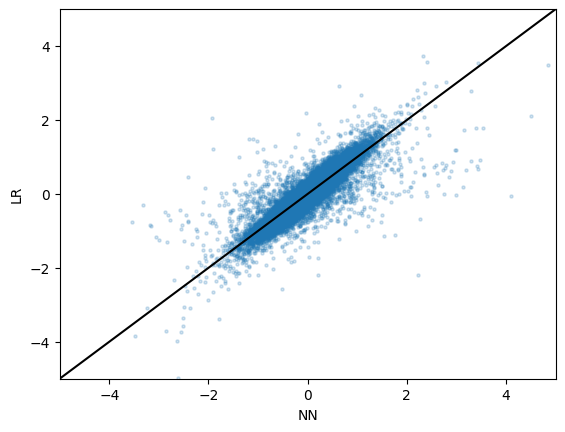

In [122]:
plt.scatter(nn_df[('Predictions','Prediction')],lr_df[('Predictions','Prediction')],alpha=0.2,s=5)
plt.plot([-5,5],[-5,5],c='k')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('NN')
plt.ylabel('LR')
plt.show()

In [22]:
nn_fw_df = pd.read_parquet('../Data/Processed/Predictions/./Diff/PytorchNeuralNetworkRegressor_forward.parquet')
lr_fw_df = pd.read_parquet('../Data/Processed/Predictions/./Diff/LinearRegressor_forward.parquet')

In [12]:
# old
display(nn_df.iloc[10000:,:])
display(nn_fw_df.iloc[10000:,:])

Category     Key                   Predictions      Meta              \
Column   date_id time_id symbol_id  Prediction    weight responder_0   
10000       1370     320         0   -0.047826  2.981886    0.038546   
10001       1370     321         0   -0.018319  2.981886    0.107512   
10002       1370     322         0   -0.029227  2.981886    0.103057   
10003       1370     323         0   -0.006078  2.981886    0.131030   
10004       1370     324         0   -0.081102  2.981886   -0.105347   
...          ...     ...       ...         ...       ...         ...   
999995      1422      51         6    0.019710  1.102116   -0.190667   
999996      1422      52         6   -0.130910  1.102116    0.303798   
999997      1422      53         6    0.049625  1.102116    0.052946   
999998      1422      54         6   -0.017010  1.102116   -0.216610   
999999      1422      55         6   -0.094177  1.102116   -0.678905   

Category                                                              \
Column   responder_1 responder_2 responder_3 responder_4 responder_5   
10000       0.308060    0.160867    0.407761    0.089809    0.253670   
10001       0.227904    0.137755    0.432489    0.102096    0.192953   
10002       0.191729    0.160413    0.125352    0.024079    0.511546   
10003       0.267141    0.867222    0.040549    0.067309    0.293172   
10004       0.192982    0.245290   -0.077822    0.032276    0.158081   
...              ...         ...         ...         ...         ...   
999995      0.162697    0.951411   -0.398762    0.993221    0.333513   
999996      0.347075    0.197204   -0.384815    1.274228   -0.046949   
999997      0.086818   -0.147361   -0.390851    1.223262    0.060790   
999998     -0.204651   -0.291473   -0.490865    1.117075   -0.115505   
999999      0.014997   -0.507057   -0.798514    1.137924   -0.500248   

Category                                    Label  
Column   responder_7 responder_8 Fold responder_6  
10000      -0.020036    0.203236    0   -0.001776  
10001      -0.012045    0.200254    0   -0.199113  
10002      -0.060796    0.654672    0   -0.254055  
10003      -0.065234    0.000042    0   -0.212462  
10004      -0.053695    0.139795    0    0.018609  
...              ...         ...  ...         ...  
999995      1.622660    0.238539    1    0.196140  
999996      1.239564   -0.167697    1   -0.348792  
999997      1.508146    0.241781    1    0.172391  
999998      1.187694   -0.016610    1    0.006887  
999999      0.962100   -0.913305    1    0.054989  

[990000 rows x 15 columns]

Category     Key                   Predictions      Meta              \
Column   date_id time_id symbol_id  Prediction    weight responder_0   
10000       1370     320         0  -19.871715  2.981886    0.038546   
10001       1370     321         0  -19.890033  2.981886    0.107512   
10002       1370     322         0  -19.919261  2.981886    0.103057   
10003       1370     323         0  -19.925339  2.981886    0.131030   
10004       1370     324         0  -20.006441  2.981886   -0.105347   
...          ...     ...       ...         ...       ...         ...   
999995      1422      51         6   -0.748694  1.102116   -0.190667   
999996      1422      52         6   -0.879604  1.102116    0.303798   
999997      1422      53         6   -0.829980  1.102116    0.052946   
999998      1422      54         6   -0.846990  1.102116   -0.216610   
999999      1422      55         6   -0.941167  1.102116   -0.678905   

Category                                                              \
Column   responder_1 responder_2 responder_3 responder_4 responder_5   
10000       0.308060    0.160867    0.407761    0.089809    0.253670   
10001       0.227904    0.137755    0.432489    0.102096    0.192953   
10002       0.191729    0.160413    0.125352    0.024079    0.511546   
10003       0.267141    0.867222    0.040549    0.067309    0.293172   
10004       0.192982    0.245290   -0.077822    0.032276    0.158081   
...              ...         ...         ...         ...         ...   
999995      0.162697    0.951411   -0.398762    0.993221    0.333513   
999996      0.347075    0.197204   -0.384815    1.274228   -0.046949   
999997      0.086818   -0.147361   -0.390851    1.223262    0.060790   
999998     -0.204651   -0.291473   -0.490865    1.117075   -0.115505   
999999      0.014997   -0.507057   -0.798514    1.137924   -0.500248   

Category                                    Label  
Column   responder_7 responder_8 Fold responder_6  
10000      -0.020036    0.203236    0    0.630365  
10001      -0.012045    0.200254    0    0.431252  
10002      -0.060796    0.654672    0    0.177197  
10003      -0.065234    0.000042    0   -0.035264  
10004      -0.053695    0.139795    0   -0.016655  
...              ...         ...  ...         ...  
999995      1.622660    0.238539    1   -0.328527  
999996      1.239564   -0.167697    1   -0.677319  
999997      1.508146    0.241781    1   -0.504928  
999998      1.187694   -0.016610    1   -0.498041  
999999      0.962100   -0.913305    1   -0.443052  

[990000 rows x 15 columns]

In [19]:
# new
display(lr_df.iloc[10000:,:])
display(lr_fw_df.iloc[10000:,:])

Category     Key                   Predictions      Meta              \
Column   date_id time_id symbol_id  Prediction    weight responder_0   
10000       1370     320         0   -0.076289  2.981886    0.038546   
10001       1370     321         0   -0.008059  2.981886    0.107512   
10002       1370     322         0    0.012202  2.981886    0.103057   
10003       1370     323         0   -0.010564  2.981886    0.131030   
10004       1370     324         0   -0.011476  2.981886   -0.105347   
...          ...     ...       ...         ...       ...         ...   
999995      1422      51         6    0.093418  1.102116   -0.190667   
999996      1422      52         6   -0.201875  1.102116    0.303798   
999997      1422      53         6    0.103614  1.102116    0.052946   
999998      1422      54         6   -0.012958  1.102116   -0.216610   
999999      1422      55         6   -0.088566  1.102116   -0.678905   

Category                                                              \
Column   responder_1 responder_2 responder_3 responder_4 responder_5   
10000       0.308060    0.160867    0.407761    0.089809    0.253670   
10001       0.227904    0.137755    0.432489    0.102096    0.192953   
10002       0.191729    0.160413    0.125352    0.024079    0.511546   
10003       0.267141    0.867222    0.040549    0.067309    0.293172   
10004       0.192982    0.245290   -0.077822    0.032276    0.158081   
...              ...         ...         ...         ...         ...   
999995      0.162697    0.951411   -0.398762    0.993221    0.333513   
999996      0.347075    0.197204   -0.384815    1.274228   -0.046949   
999997      0.086818   -0.147361   -0.390851    1.223262    0.060790   
999998     -0.204651   -0.291473   -0.490865    1.117075   -0.115505   
999999      0.014997   -0.507057   -0.798514    1.137924   -0.500248   

Category                                    Label  
Column   responder_7 responder_8 Fold responder_6  
10000      -0.020036    0.203236    0   -0.001776  
10001      -0.012045    0.200254    0   -0.199113  
10002      -0.060796    0.654672    0   -0.254055  
10003      -0.065234    0.000042    0   -0.212462  
10004      -0.053695    0.139795    0    0.018609  
...              ...         ...  ...         ...  
999995      1.622660    0.238539    1    0.196140  
999996      1.239564   -0.167697    1   -0.348792  
999997      1.508146    0.241781    1    0.172391  
999998      1.187694   -0.016610    1    0.006887  
999999      0.962100   -0.913305    1    0.054989  

[990000 rows x 15 columns]

Category     Key                   Predictions      Meta              \
Column   date_id time_id symbol_id  Prediction    weight responder_0   
10000       1370     320         0   -0.205030  2.981886    0.038546   
10001       1370     321         0   -0.213089  2.981886    0.107512   
10002       1370     322         0   -0.200887  2.981886    0.103057   
10003       1370     323         0   -0.211451  2.981886    0.131030   
10004       1370     324         0   -0.222927  2.981886   -0.105347   
...          ...     ...       ...         ...       ...         ...   
999995      1422      51         6    0.472776  1.102116   -0.190667   
999996      1422      52         6    0.270901  1.102116    0.303798   
999997      1422      53         6    0.374516  1.102116    0.052946   
999998      1422      54         6    0.361558  1.102116   -0.216610   
999999      1422      55         6    0.272992  1.102116   -0.678905   

Category                                                              \
Column   responder_1 responder_2 responder_3 responder_4 responder_5   
10000       0.308060    0.160867    0.407761    0.089809    0.253670   
10001       0.227904    0.137755    0.432489    0.102096    0.192953   
10002       0.191729    0.160413    0.125352    0.024079    0.511546   
10003       0.267141    0.867222    0.040549    0.067309    0.293172   
10004       0.192982    0.245290   -0.077822    0.032276    0.158081   
...              ...         ...         ...         ...         ...   
999995      0.162697    0.951411   -0.398762    0.993221    0.333513   
999996      0.347075    0.197204   -0.384815    1.274228   -0.046949   
999997      0.086818   -0.147361   -0.390851    1.223262    0.060790   
999998     -0.204651   -0.291473   -0.490865    1.117075   -0.115505   
999999      0.014997   -0.507057   -0.798514    1.137924   -0.500248   

Category                                    Label  
Column   responder_7 responder_8 Fold responder_6  
10000      -0.020036    0.203236    0    0.630365  
10001      -0.012045    0.200254    0    0.431252  
10002      -0.060796    0.654672    0    0.177197  
10003      -0.065234    0.000042    0   -0.035264  
10004      -0.053695    0.139795    0   -0.016655  
...              ...         ...  ...         ...  
999995      1.622660    0.238539    1   -0.328527  
999996      1.239564   -0.167697    1   -0.677319  
999997      1.508146    0.241781    1   -0.504928  
999998      1.187694   -0.016610    1   -0.498041  
999999      0.962100   -0.913305    1   -0.443052  

[990000 rows x 15 columns]

In [134]:
# old
display(lr_df.iloc[10000:,:])
display(lr_fw_df.iloc[10000:,:])

Category     Key                   Predictions      Meta              \
Column   date_id time_id symbol_id  Prediction    weight responder_0   
10000       1370     320         0   -0.076289  2.981886    0.038546   
10001       1370     321         0   -0.008059  2.981886    0.107512   
10002       1370     322         0    0.012202  2.981886    0.103057   
10003       1370     323         0   -0.010564  2.981886    0.131030   
10004       1370     324         0   -0.011476  2.981886   -0.105347   
...          ...     ...       ...         ...       ...         ...   
999995      1422      51         6    0.093418  1.102116   -0.190667   
999996      1422      52         6   -0.201875  1.102116    0.303798   
999997      1422      53         6    0.103614  1.102116    0.052946   
999998      1422      54         6   -0.012958  1.102116   -0.216610   
999999      1422      55         6   -0.088566  1.102116   -0.678905   

Category                                                              \
Column   responder_1 responder_2 responder_3 responder_4 responder_5   
10000       0.308060    0.160867    0.407761    0.089809    0.253670   
10001       0.227904    0.137755    0.432489    0.102096    0.192953   
10002       0.191729    0.160413    0.125352    0.024079    0.511546   
10003       0.267141    0.867222    0.040549    0.067309    0.293172   
10004       0.192982    0.245290   -0.077822    0.032276    0.158081   
...              ...         ...         ...         ...         ...   
999995      0.162697    0.951411   -0.398762    0.993221    0.333513   
999996      0.347075    0.197204   -0.384815    1.274228   -0.046949   
999997      0.086818   -0.147361   -0.390851    1.223262    0.060790   
999998     -0.204651   -0.291473   -0.490865    1.117075   -0.115505   
999999      0.014997   -0.507057   -0.798514    1.137924   -0.500248   

Category                                    Label  
Column   responder_7 responder_8 Fold responder_6  
10000      -0.020036    0.203236    0   -0.001776  
10001      -0.012045    0.200254    0   -0.199113  
10002      -0.060796    0.654672    0   -0.254055  
10003      -0.065234    0.000042    0   -0.212462  
10004      -0.053695    0.139795    0    0.018609  
...              ...         ...  ...         ...  
999995      1.622660    0.238539    1    0.196140  
999996      1.239564   -0.167697    1   -0.348792  
999997      1.508146    0.241781    1    0.172391  
999998      1.187694   -0.016610    1    0.006887  
999999      0.962100   -0.913305    1    0.054989  

[990000 rows x 15 columns]

Category     Key                   Predictions      Meta              \
Column   date_id time_id symbol_id  Prediction    weight responder_0   
10000       1370     320         0   -0.205030  2.981886    0.038546   
10001       1370     321         0   -0.213089  2.981886    0.107512   
10002       1370     322         0   -0.200887  2.981886    0.103057   
10003       1370     323         0   -0.211451  2.981886    0.131030   
10004       1370     324         0   -0.222927  2.981886   -0.105347   
...          ...     ...       ...         ...       ...         ...   
999995      1422      51         6    0.472776  1.102116   -0.190667   
999996      1422      52         6    0.270901  1.102116    0.303798   
999997      1422      53         6    0.374516  1.102116    0.052946   
999998      1422      54         6    0.361558  1.102116   -0.216610   
999999      1422      55         6    0.272992  1.102116   -0.678905   

Category                                                              \
Column   responder_1 responder_2 responder_3 responder_4 responder_5   
10000       0.308060    0.160867    0.407761    0.089809    0.253670   
10001       0.227904    0.137755    0.432489    0.102096    0.192953   
10002       0.191729    0.160413    0.125352    0.024079    0.511546   
10003       0.267141    0.867222    0.040549    0.067309    0.293172   
10004       0.192982    0.245290   -0.077822    0.032276    0.158081   
...              ...         ...         ...         ...         ...   
999995      0.162697    0.951411   -0.398762    0.993221    0.333513   
999996      0.347075    0.197204   -0.384815    1.274228   -0.046949   
999997      0.086818   -0.147361   -0.390851    1.223262    0.060790   
999998     -0.204651   -0.291473   -0.490865    1.117075   -0.115505   
999999      0.014997   -0.507057   -0.798514    1.137924   -0.500248   

Category                                    Label  
Column   responder_7 responder_8 Fold responder_6  
10000      -0.020036    0.203236    0    0.630365  
10001      -0.012045    0.200254    0    0.431252  
10002      -0.060796    0.654672    0    0.177197  
10003      -0.065234    0.000042    0   -0.035264  
10004      -0.053695    0.139795    0   -0.016655  
...              ...         ...  ...         ...  
999995      1.622660    0.238539    1   -0.328527  
999996      1.239564   -0.167697    1   -0.677319  
999997      1.508146    0.241781    1   -0.504928  
999998      1.187694   -0.016610    1   -0.498041  
999999      0.962100   -0.913305    1   -0.443052  

[990000 rows x 15 columns]

In [13]:
0.472776 - 0.270901

0.20187499999999997

In [16]:
0.093418 - (-0.201874)

0.295292

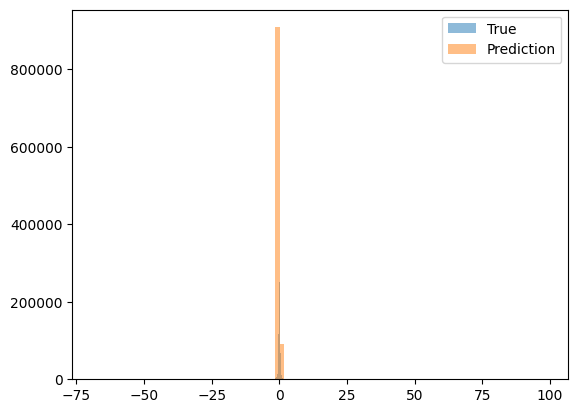

In [110]:
plt.hist(df[('Label','responder_6')].diff().values,bins=100,alpha=0.5,label='True')
plt.hist(df[('Predictions','Prediction')].diff().values,bins=100,alpha=0.5,label='Prediction')
plt.legend()
plt.show()

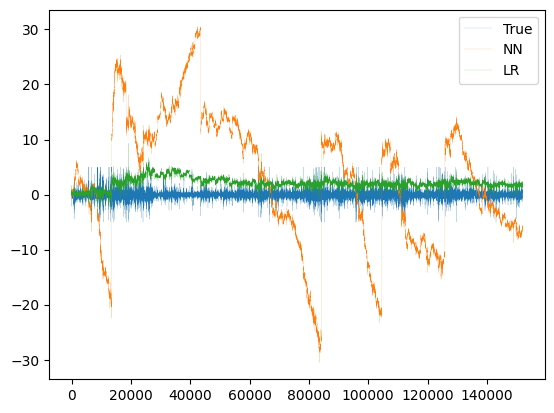

In [24]:
# new
symbol_id = 1
plt.plot(nn_fw_df[nn_fw_df[('Key','symbol_id')]==symbol_id][('Label','responder_6')].values,linewidth=0.1,label='True')
plt.plot(nn_fw_df[nn_fw_df[('Key','symbol_id')]==symbol_id][('Predictions','Prediction')].values,linewidth=0.1,label='NN')
plt.plot(lr_fw_df[lr_fw_df[('Key','symbol_id')]==symbol_id][('Predictions','Prediction')].values,linewidth=0.1,label='LR')
plt.legend()
# plt.xlim([0,1000])
plt.show()

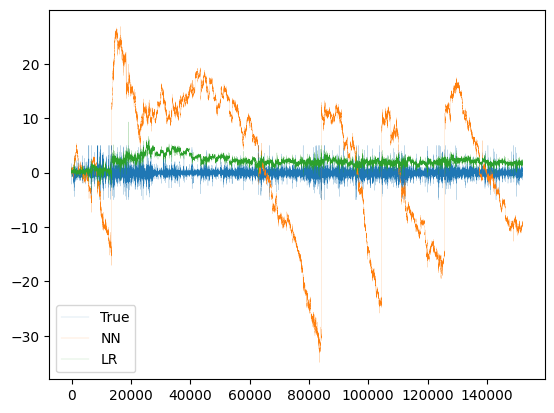

In [146]:
# old
symbol_id = 1
plt.plot(nn_fw_df[nn_fw_df[('Key','symbol_id')]==symbol_id][('Label','responder_6')].values,linewidth=0.1,label='True')
plt.plot(nn_fw_df[nn_fw_df[('Key','symbol_id')]==symbol_id][('Predictions','Prediction')].values,linewidth=0.1,label='NN')
plt.plot(lr_fw_df[lr_fw_df[('Key','symbol_id')]==symbol_id][('Predictions','Prediction')].values,linewidth=0.1,label='LR')
plt.legend()
plt.show()

In [63]:
display(df)

Category     Key                   Predictions      Meta              \
Column   date_id time_id symbol_id  Prediction    weight responder_0   
0           1360       0         0    0.739555  1.865621    0.502829   
1           1360       1         0    1.175728  1.865621   -0.123637   
2           1360       2         0   -2.482963  1.865621    0.060635   
3           1360       3         0   -0.792707  1.865621   -0.170006   
4           1360       4         0   -1.415544  1.865621   -0.366284   
...          ...     ...       ...         ...       ...         ...   
944763      1363     963         6   -2.344500  0.939108    0.354994   
944764      1363     964         6   -0.444206  0.939108    0.600616   
944765      1363     965         6   -0.016502  0.939108    0.963447   
944766      1363     966         6    1.107660  0.939108    1.733904   
944767      1363     967         6   -0.086629  0.939108    1.300121   

Category                                                              \
Column   responder_1 responder_2 responder_3 responder_4 responder_5   
0           0.115287   -0.313245    0.651638   -1.308276   -1.620408   
1          -0.054755   -0.532701    0.033621   -1.389988   -2.405854   
2           0.037472    0.823404   -0.061211   -1.309350   -1.074672   
3          -0.061955   -0.129195   -0.053827   -0.817082   -1.301216   
4          -0.198968   -0.478070   -0.216298   -1.636171   -1.313344   
...              ...         ...         ...         ...         ...   
944763     -0.168116   -1.843131    0.154929    0.105586   -0.318545   
944764     -0.207499   -1.499812    0.299772    0.204817    0.046886   
944765      0.132329    0.165561    0.450400    0.179058    0.136018   
944766      0.103154    0.281173    0.297094    0.123243    0.056246   
944767      0.227536    0.359299    0.340892    0.209701    0.092841   

Category                                    Label  
Column   responder_7 responder_8 Fold responder_6  
0          -1.049378   -2.496996    0    0.374767  
1          -1.042605   -2.776198    0    0.203317  
2          -2.153235   -2.437422    0   -0.115298  
3          -1.029803   -1.226197    0    0.046019  
4          -1.437648   -1.037172    0   -0.073015  
...              ...         ...  ...         ...  
944763      0.159570    0.315997    0    0.325599  
944764      0.254605    0.562170    0    0.529788  
944765      0.121498    0.424209    0    0.195797  
944766      0.035829    0.059895    0    0.054120  
944767      0.038120    0.030245    0    0.026186  

[27104 rows x 15 columns]

In [57]:
x = np.random.rand(1000000)-0.5

In [58]:
x_cumulative = []
t = 0
for v in x:
    t += v
    x_cumulative.append(t)
x_cumulative = np.array(x_cumulative)
x_cumulative = x_cumulative - np.mean(x_cumulative)
x_shifted = x_cumulative - 10

In [59]:
x_shifted_corrected = []
t = x_shifted[0]
for v in x:
    t += v
    t *= 0.9999
    x_shifted_corrected.append(t)
x_shifted_corrected = np.array(x_shifted_corrected)

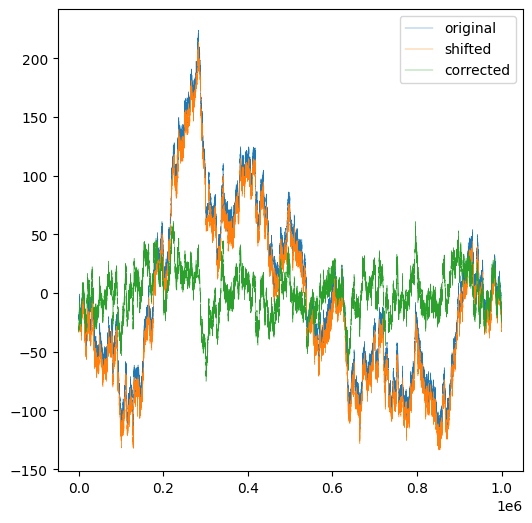

In [60]:
plt.figure(figsize=(6,6))
plt.plot(x_cumulative,label='original',linewidth=0.3)
plt.plot(x_shifted,label='shifted',linewidth=0.3)
plt.plot(x_shifted_corrected,label='corrected',linewidth=0.3)
plt.legend()
plt.show()

In [2]:
# Load input
input_df = pd.read_parquet('../Data/Processed/Diff_test.parquet')

# Test models on each fold
model = LinearRegressor()
model_path = path.join('../Models/Diff/LinearRegressor','LinearRegressor')
model.load(model_path)
pred = model.predict(input_df)
input_df[('Predictions', 'Prediction')] = pred
# input_df = input_df[['Key','Predictions','Meta','Label']]

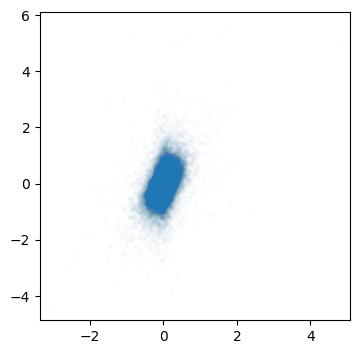

In [5]:
plt.figure(figsize=(4,4))
plt.scatter(input_df[('Predictions','Prediction')],input_df[('Label','responder_6')],alpha=0.01,s=5)
plt.show()

In [8]:
# plt.figure(figsize=(6,6))
# plt.scatter(input_df[('Data','responder_6_lag_1')],input_df[('Label','responder_6')],alpha=0.01,s=5)
# plt.show()

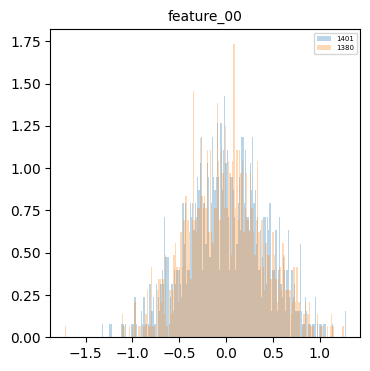

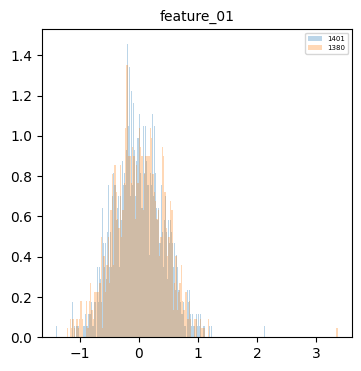

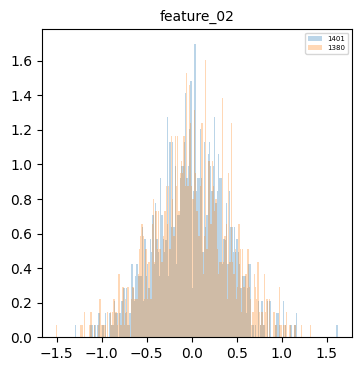

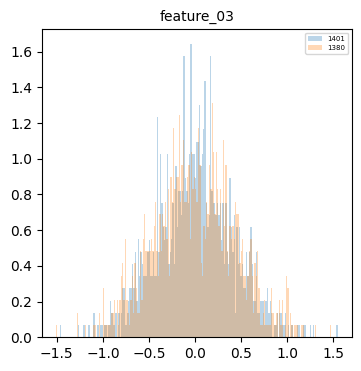

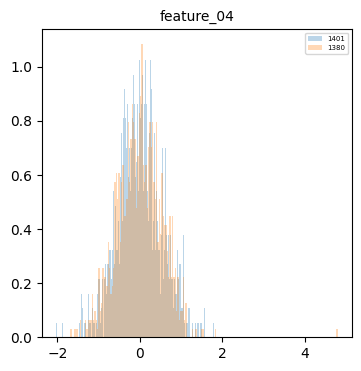

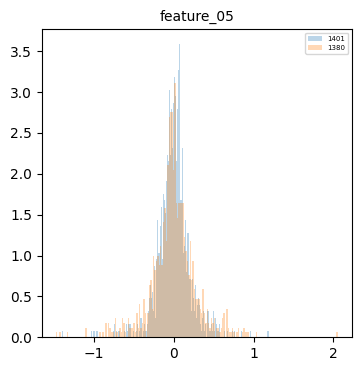

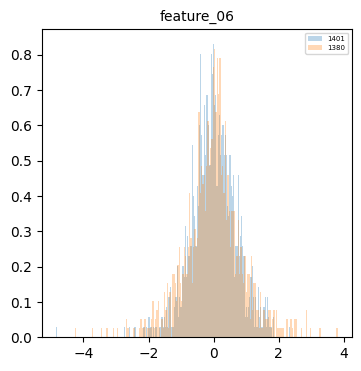

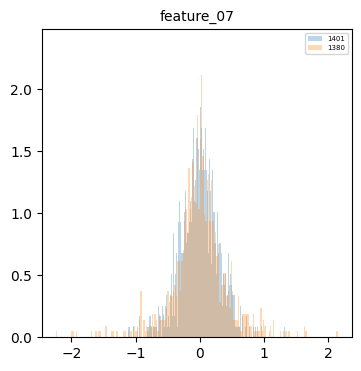

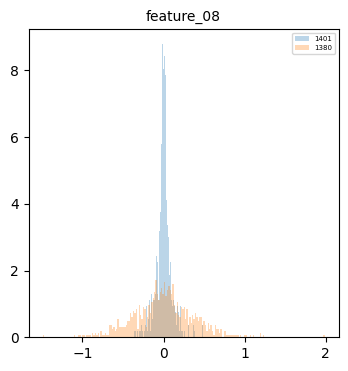

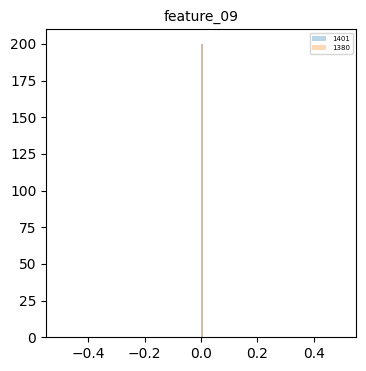

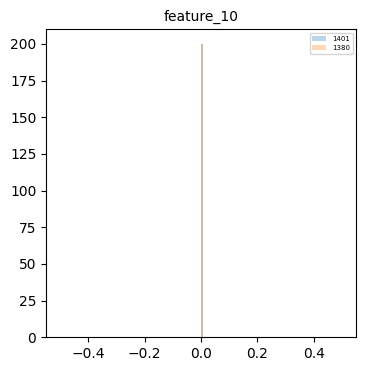

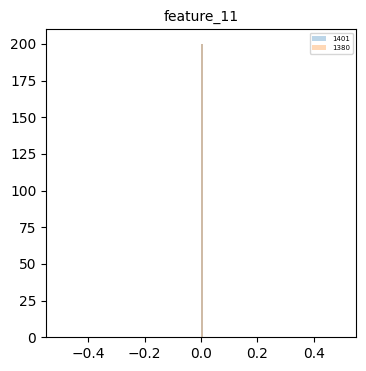

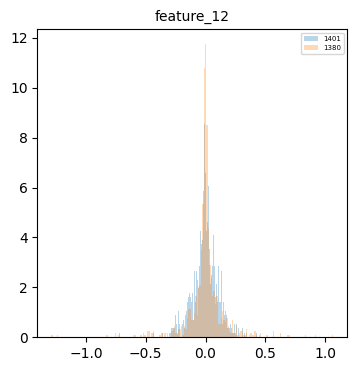

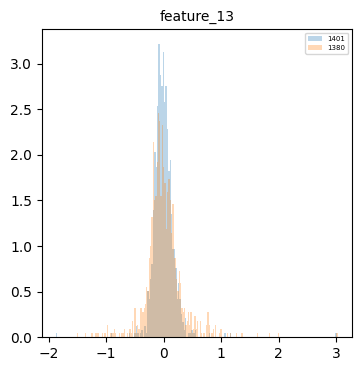

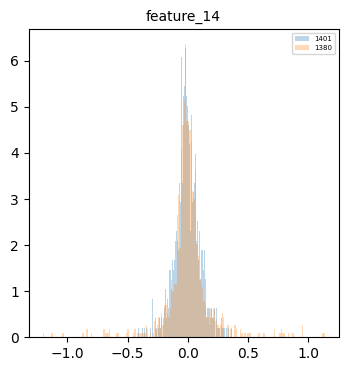

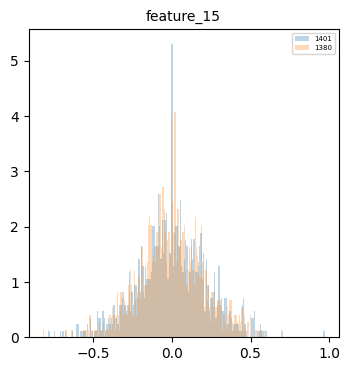

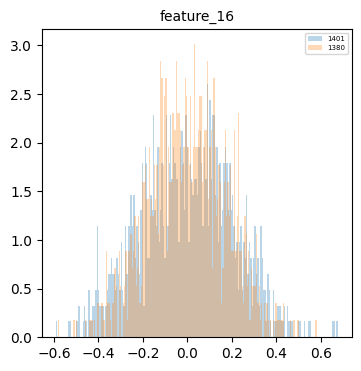

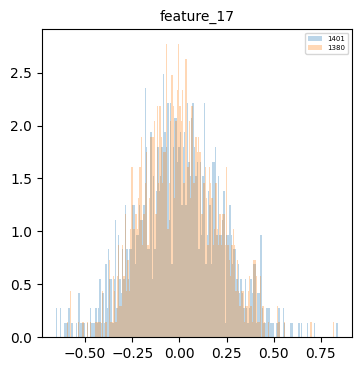

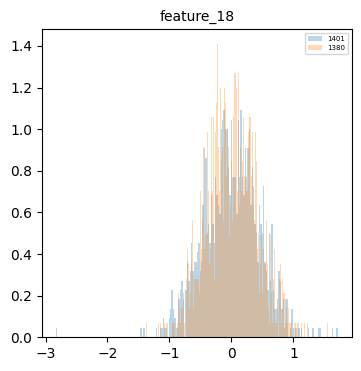

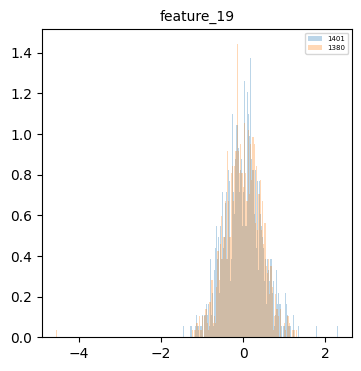

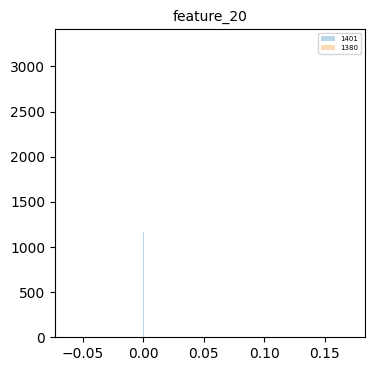

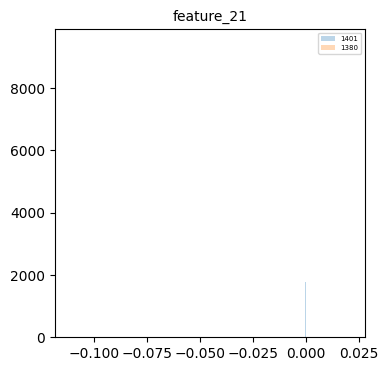

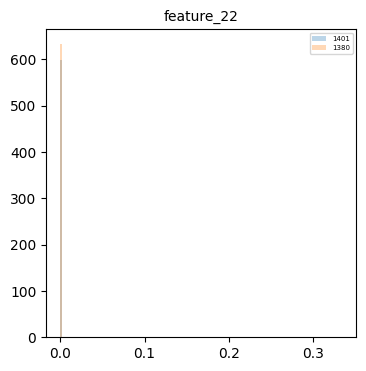

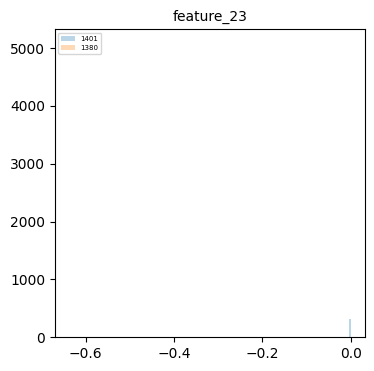

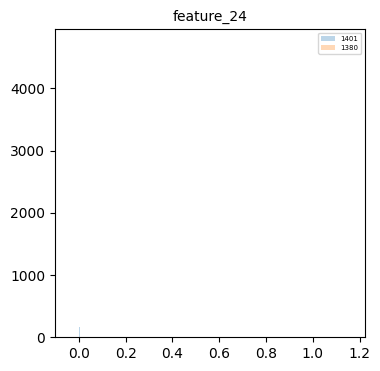

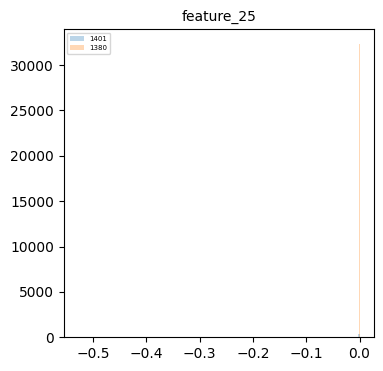

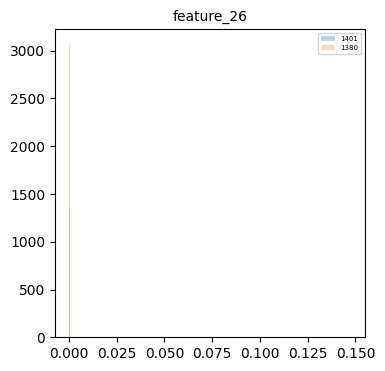

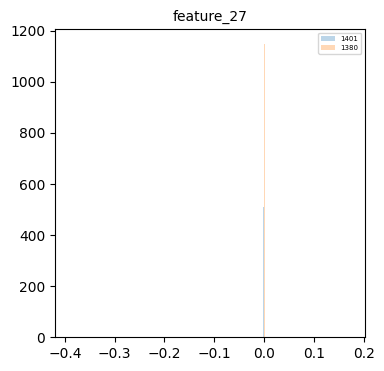

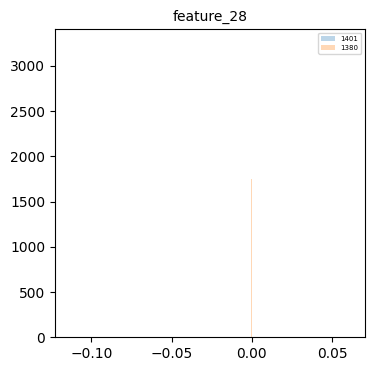

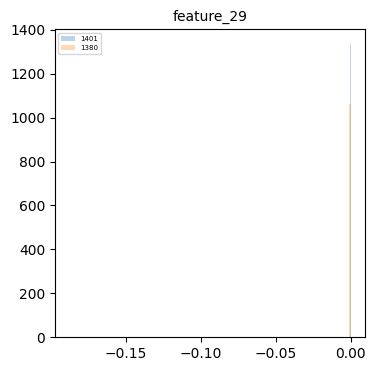

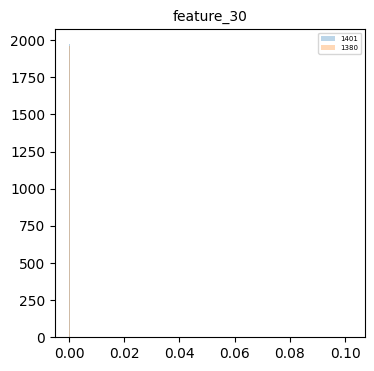

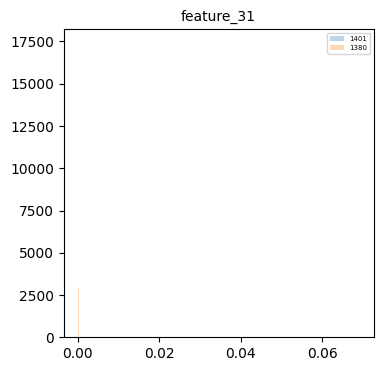

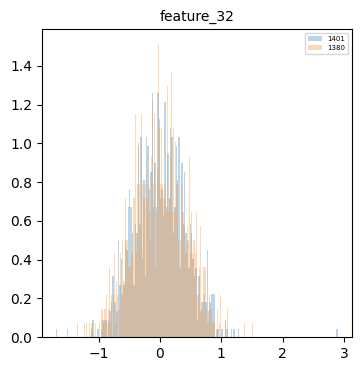

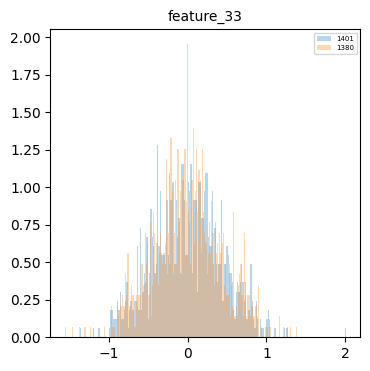

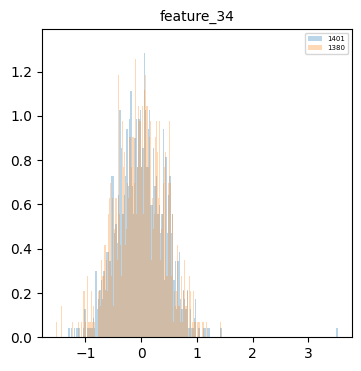

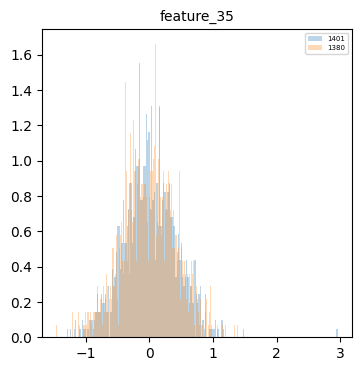

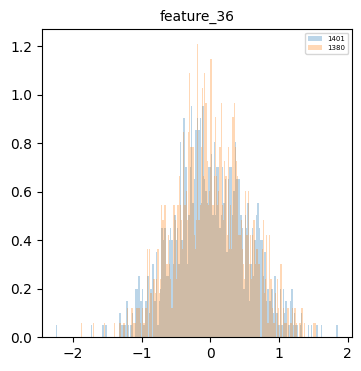

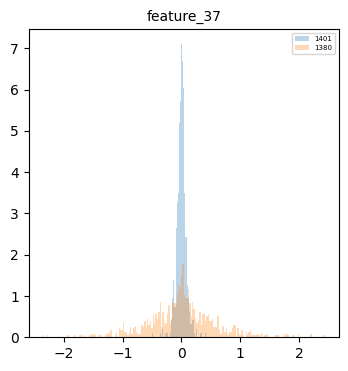

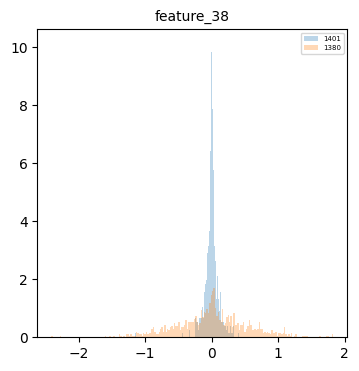

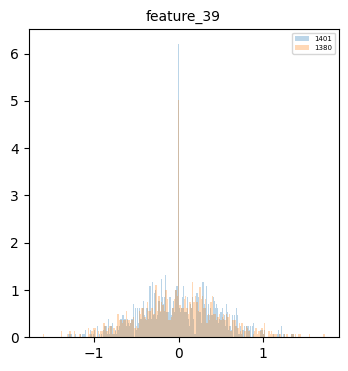

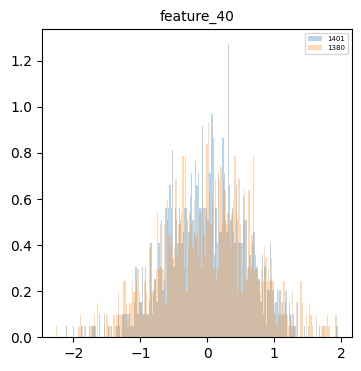

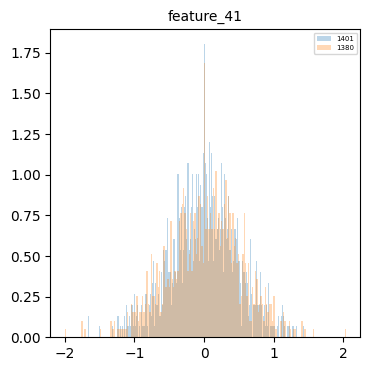

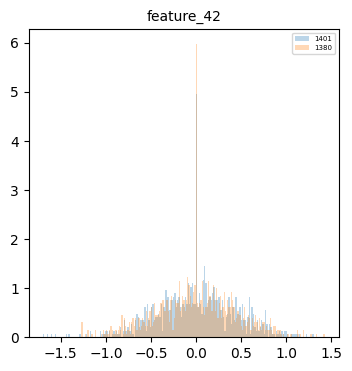

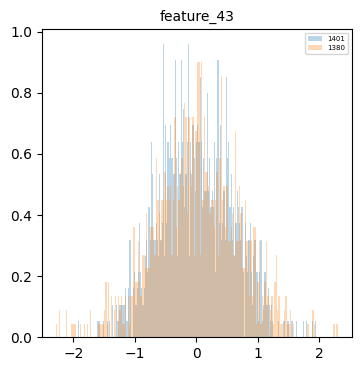

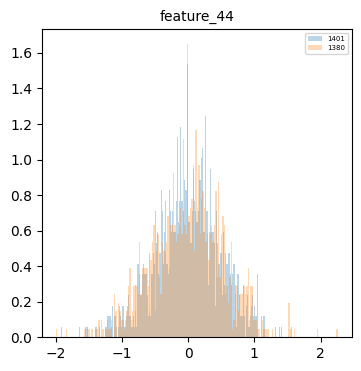

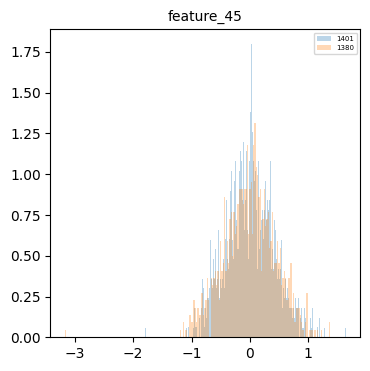

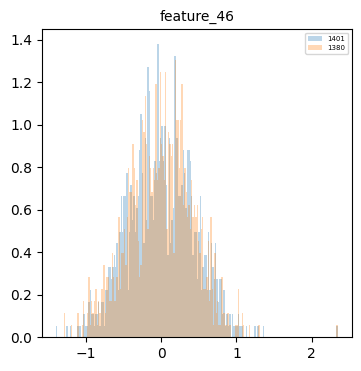

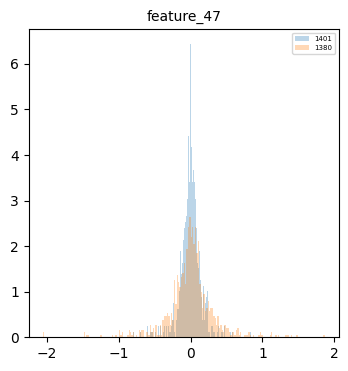

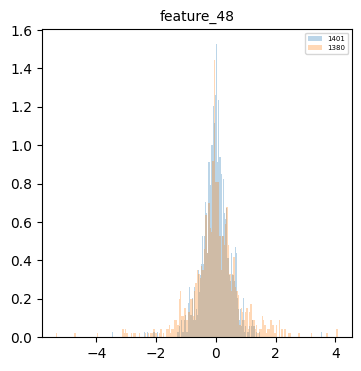

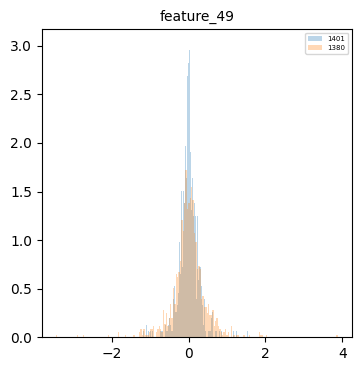

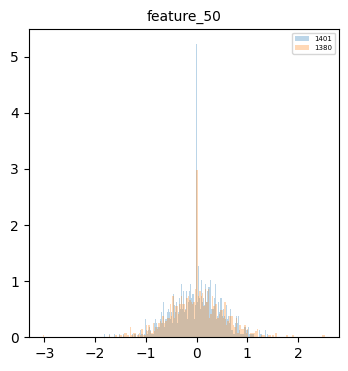

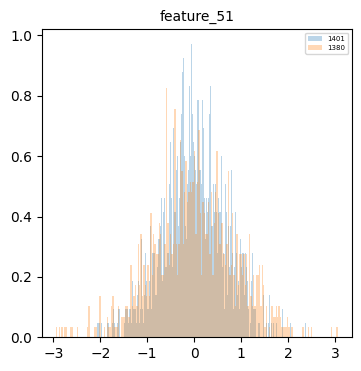

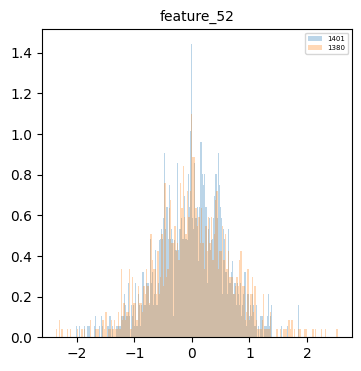

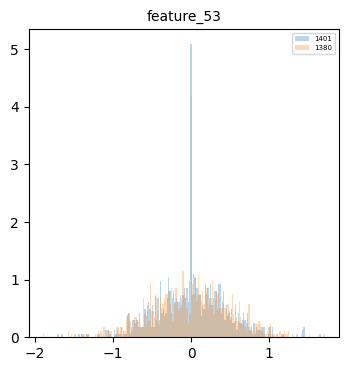

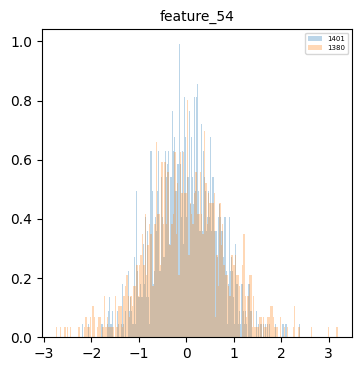

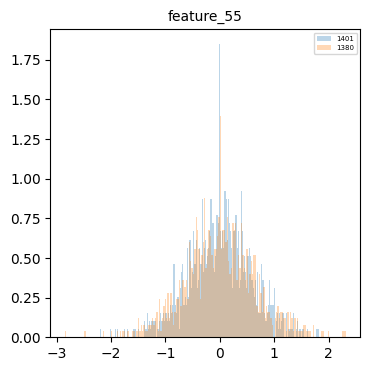

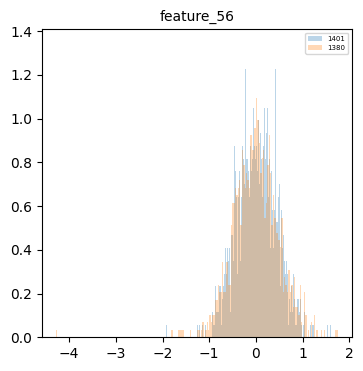

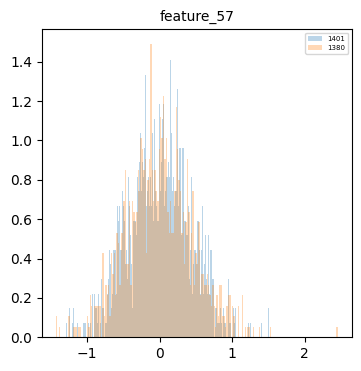

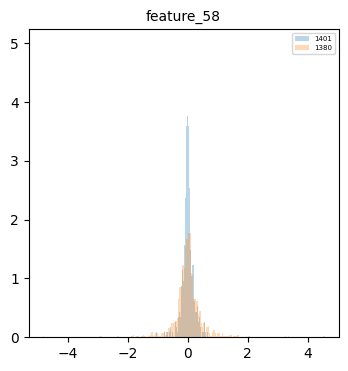

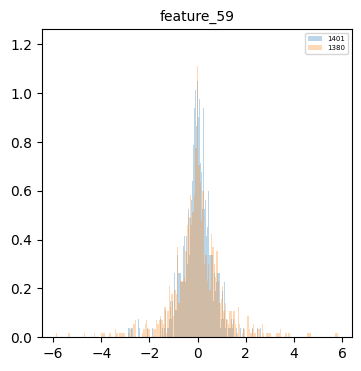

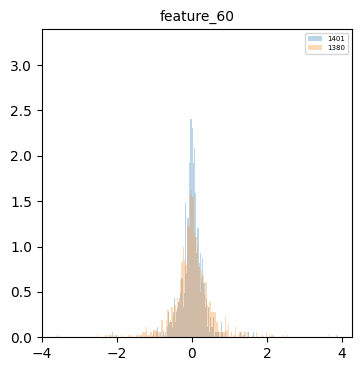

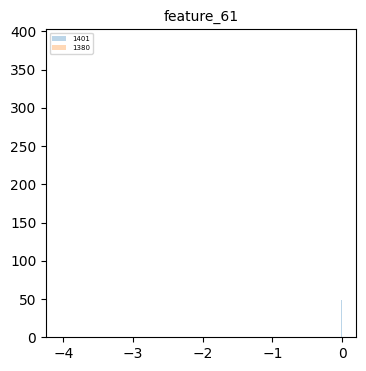

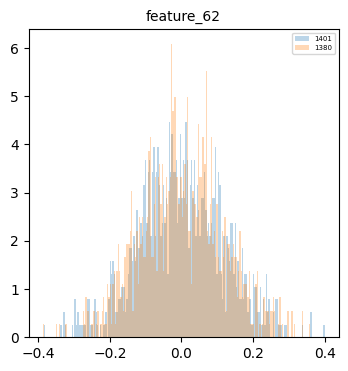

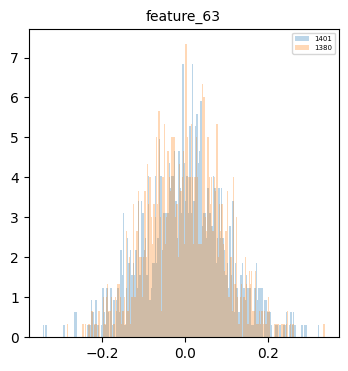

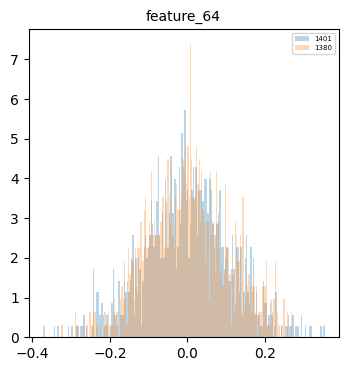

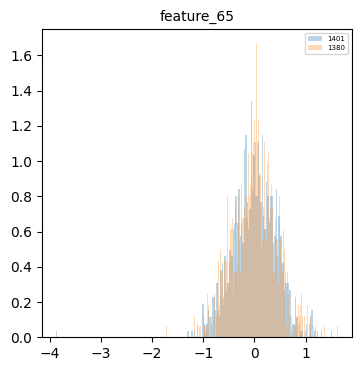

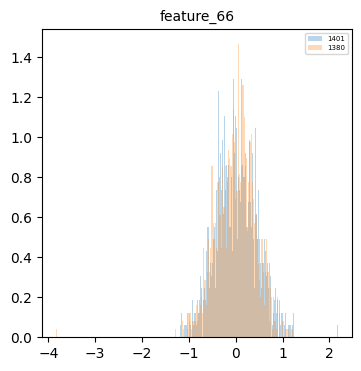

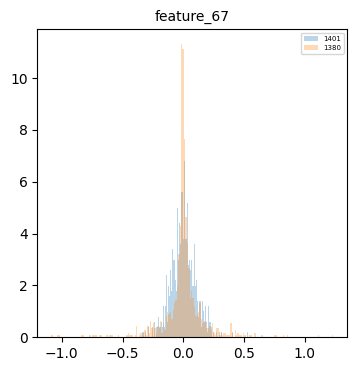

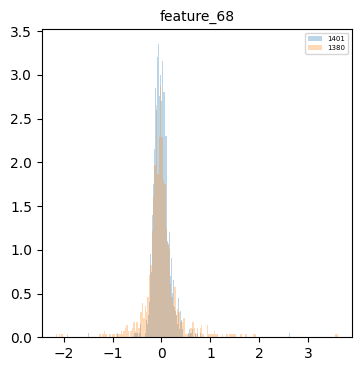

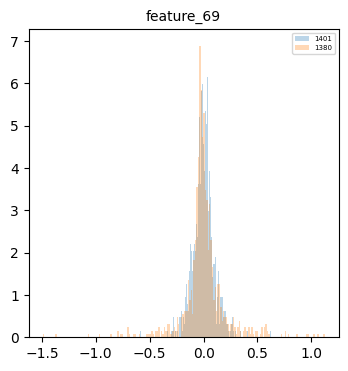

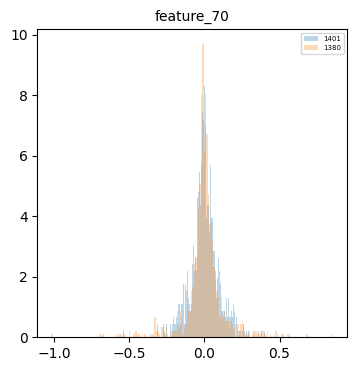

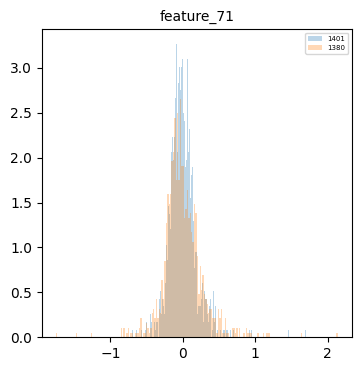

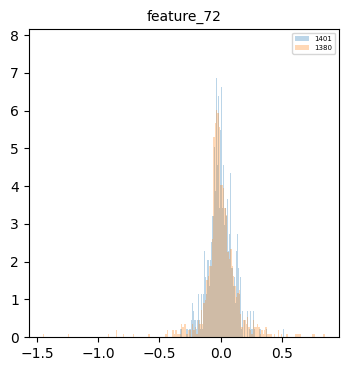

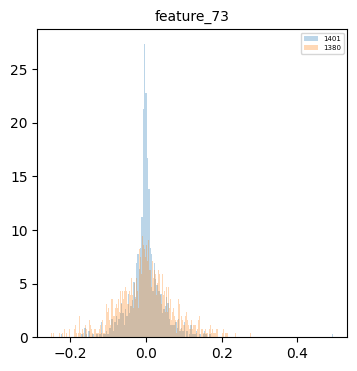

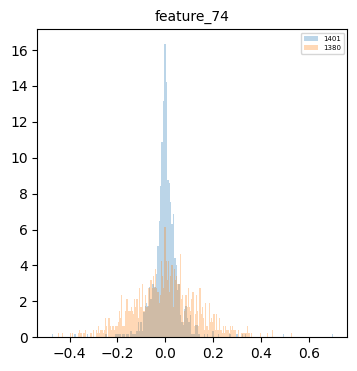

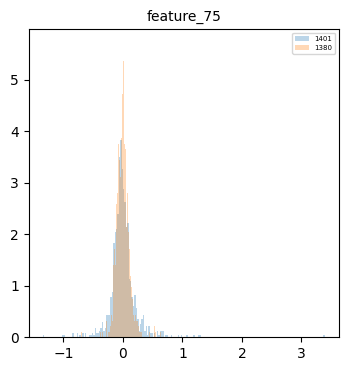

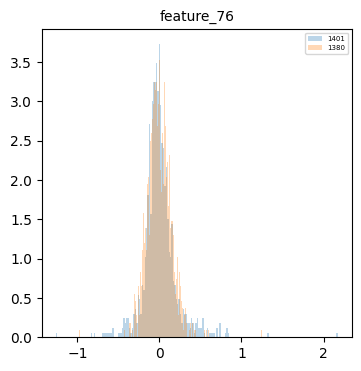

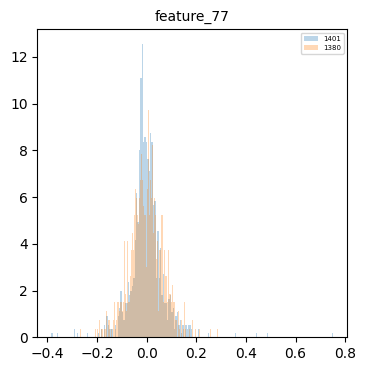

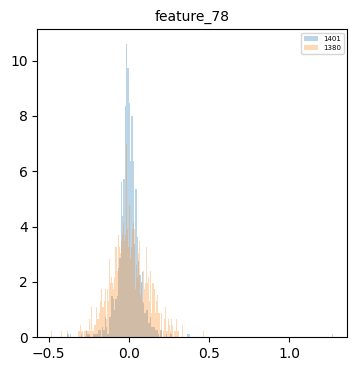

In [9]:
df_1401 = input_df[input_df[('Key','date_id')]==1401]
df_1380 = input_df[input_df[('Key','date_id')]==1380]
for c in input_df['Data'].columns:
    plt.figure(figsize=(4,4))
    plt.hist(df_1401[('Data',c)],bins=200,alpha=0.3,label='1401',density=True)
    plt.hist(df_1380[('Data',c)],bins=200,alpha=0.3,label='1380',density=True)
    plt.title(c,fontsize=10)
    plt.legend(fontsize=5)
    plt.show()

In [10]:
display(df_1401)

Category     Key                        Meta       Data                        \
Column   date_id time_id symbol_id    weight feature_00 feature_01 feature_02   
32912       1401       0         0  3.240982  -1.097069   2.138829  -0.123131   
32913       1401       1         0  3.240982   0.145854   0.085151  -0.687187   
32914       1401       2         0  3.240982   0.016000  -0.434848  -0.271696   
32915       1401       3         0  3.240982   0.036709   1.104165   0.393425   
32916       1401       4         0  3.240982  -0.195802  -1.407188  -0.575659   
...          ...     ...       ...       ...        ...        ...        ...   
33875       1401     963         0  3.240982   0.263550  -0.179589   0.257329   
33876       1401     964         0  3.240982   0.475951   0.394356  -0.605268   
33877       1401     965         0  3.240982  -0.230597  -0.015392   1.018492   
33878       1401     966         0  3.240982  -0.261776  -0.223862  -0.850731   
33879       1401     967         0  3.240982   0.186528  -0.221003   0.256663   

Category                                   ...        Meta              \
Column   feature_03 feature_04 feature_05  ... responder_1 responder_2   
32912     -1.101855  -1.139670  -0.285578  ...    0.131018    1.377198   
32913     -0.410076  -0.291933   0.336587  ...    0.113441    1.334653   
32914      0.082723   0.666764   0.008912  ...   -0.256662   -0.021154   
32915     -0.020565  -0.174595   0.016520  ...   -0.412860   -0.073712   
32916      0.551809  -0.300705  -0.269744  ...   -0.365107    0.113053   
...             ...        ...        ...  ...         ...         ...   
33875     -0.000070  -0.137819   0.072148  ...    0.558331    1.016229   
33876     -0.083601  -0.802376  -0.064664  ...    0.535358   -0.095796   
33877      0.035145   0.258672  -0.056577  ...    0.414684    0.164198   
33878      0.604255   0.855478   0.074980  ...    0.453563    0.453056   
33879     -0.663376  -0.052175  -0.000577  ...    0.270734   -0.957314   

Category                                           Label        Meta  \
Column   responder_3 responder_4 responder_5 responder_6 responder_7   
32912      -3.642791   -1.953756   -5.000000   -1.254215   -0.255414   
32913      -4.195070   -2.049555   -4.883701    0.813660    0.046510   
32914      -4.247784   -1.987689   -4.534081    0.290086    0.340799   
32915      -3.824558   -1.471878   -5.000000   -1.202658   -0.026871   
32916      -3.765840   -1.203323   -3.185602    0.810130    0.191975   
...              ...         ...         ...         ...         ...   
33875      -4.027347   -2.669636   -5.000000    0.000883    0.094129   
33876      -5.000000   -1.279708   -5.000000   -0.854979   -0.179581   
33877      -4.055832   -2.529189   -5.000000    0.152443   -0.115205   
33878      -3.561728   -1.878688   -5.000000    0.260726   -0.063022   
33879      -5.000000   -2.198835   -5.000000    0.067113   -0.034589   

Category                  Predictions  
Column   responder_8 Fold  Prediction  
32912      -0.079116    1    0.535516  
32913       0.313227    1    0.262999  
32914       1.094648    1    0.021314  
32915       0.640091    1   -0.358175  
32916       1.074972    1    0.090849  
...              ...  ...         ...  
33875       0.519557    1   -0.157342  
33876      -0.932523    1   -0.641473  
33877      -0.694865    1    0.290292  
33878      -0.411298    1    0.117592  
33879      -0.324435    1    0.032620  

[968 rows x 94 columns]

In [11]:
display(df_1401)

Category     Key                        Meta       Data                        \
Column   date_id time_id symbol_id    weight feature_00 feature_01 feature_02   
32912       1401       0         0  3.240982  -1.097069   2.138829  -0.123131   
32913       1401       1         0  3.240982   0.145854   0.085151  -0.687187   
32914       1401       2         0  3.240982   0.016000  -0.434848  -0.271696   
32915       1401       3         0  3.240982   0.036709   1.104165   0.393425   
32916       1401       4         0  3.240982  -0.195802  -1.407188  -0.575659   
...          ...     ...       ...       ...        ...        ...        ...   
33875       1401     963         0  3.240982   0.263550  -0.179589   0.257329   
33876       1401     964         0  3.240982   0.475951   0.394356  -0.605268   
33877       1401     965         0  3.240982  -0.230597  -0.015392   1.018492   
33878       1401     966         0  3.240982  -0.261776  -0.223862  -0.850731   
33879       1401     967         0  3.240982   0.186528  -0.221003   0.256663   

Category                                   ...        Meta              \
Column   feature_03 feature_04 feature_05  ... responder_1 responder_2   
32912     -1.101855  -1.139670  -0.285578  ...    0.131018    1.377198   
32913     -0.410076  -0.291933   0.336587  ...    0.113441    1.334653   
32914      0.082723   0.666764   0.008912  ...   -0.256662   -0.021154   
32915     -0.020565  -0.174595   0.016520  ...   -0.412860   -0.073712   
32916      0.551809  -0.300705  -0.269744  ...   -0.365107    0.113053   
...             ...        ...        ...  ...         ...         ...   
33875     -0.000070  -0.137819   0.072148  ...    0.558331    1.016229   
33876     -0.083601  -0.802376  -0.064664  ...    0.535358   -0.095796   
33877      0.035145   0.258672  -0.056577  ...    0.414684    0.164198   
33878      0.604255   0.855478   0.074980  ...    0.453563    0.453056   
33879     -0.663376  -0.052175  -0.000577  ...    0.270734   -0.957314   

Category                                           Label        Meta  \
Column   responder_3 responder_4 responder_5 responder_6 responder_7   
32912      -3.642791   -1.953756   -5.000000   -1.254215   -0.255414   
32913      -4.195070   -2.049555   -4.883701    0.813660    0.046510   
32914      -4.247784   -1.987689   -4.534081    0.290086    0.340799   
32915      -3.824558   -1.471878   -5.000000   -1.202658   -0.026871   
32916      -3.765840   -1.203323   -3.185602    0.810130    0.191975   
...              ...         ...         ...         ...         ...   
33875      -4.027347   -2.669636   -5.000000    0.000883    0.094129   
33876      -5.000000   -1.279708   -5.000000   -0.854979   -0.179581   
33877      -4.055832   -2.529189   -5.000000    0.152443   -0.115205   
33878      -3.561728   -1.878688   -5.000000    0.260726   -0.063022   
33879      -5.000000   -2.198835   -5.000000    0.067113   -0.034589   

Category                  Predictions  
Column   responder_8 Fold  Prediction  
32912      -0.079116    1    0.535516  
32913       0.313227    1    0.262999  
32914       1.094648    1    0.021314  
32915       0.640091    1   -0.358175  
32916       1.074972    1    0.090849  
...              ...  ...         ...  
33875       0.519557    1   -0.157342  
33876      -0.932523    1   -0.641473  
33877      -0.694865    1    0.290292  
33878      -0.411298    1    0.117592  
33879      -0.324435    1    0.032620  

[968 rows x 94 columns]

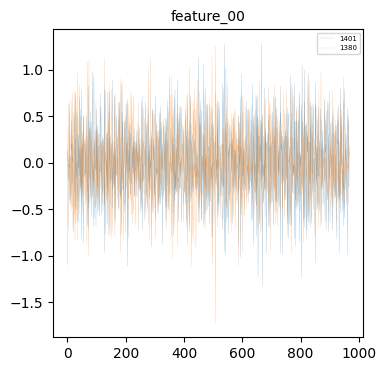

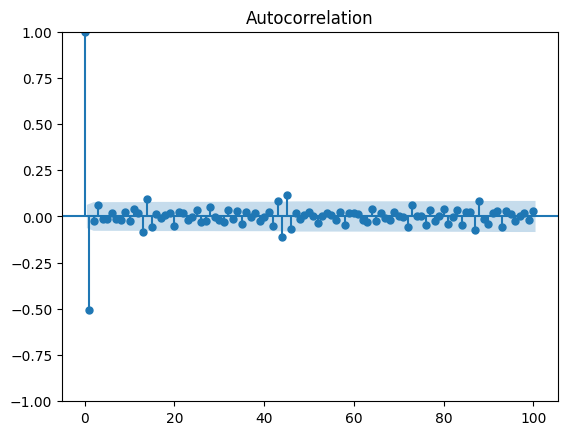

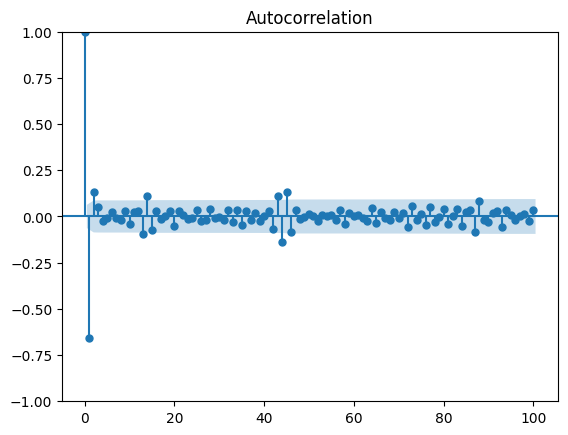

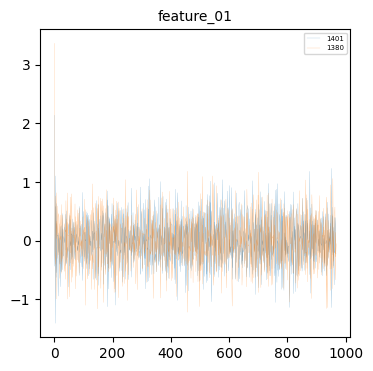

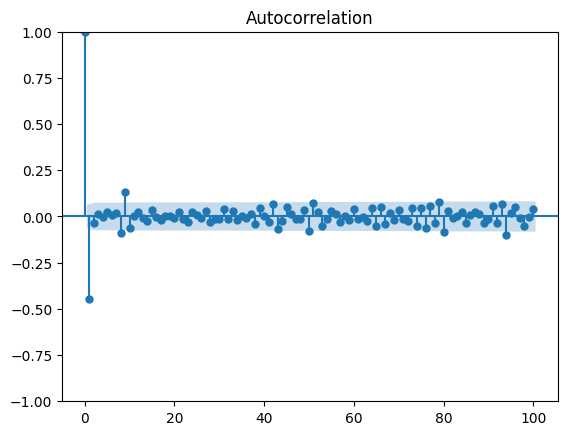

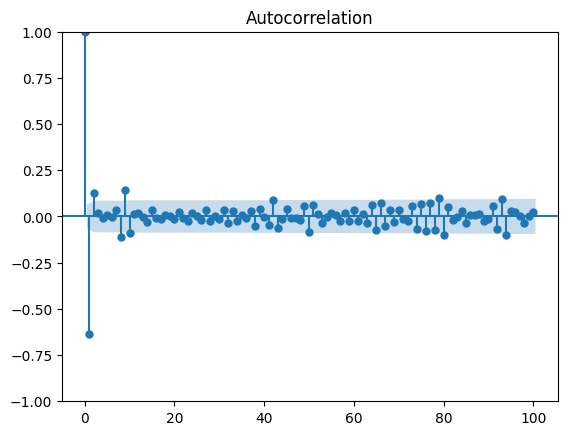

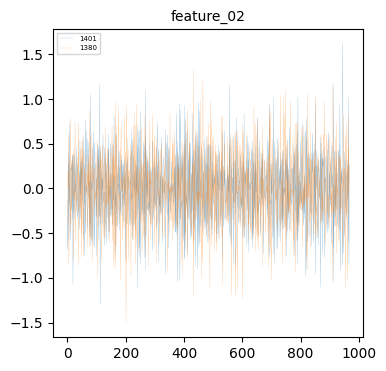

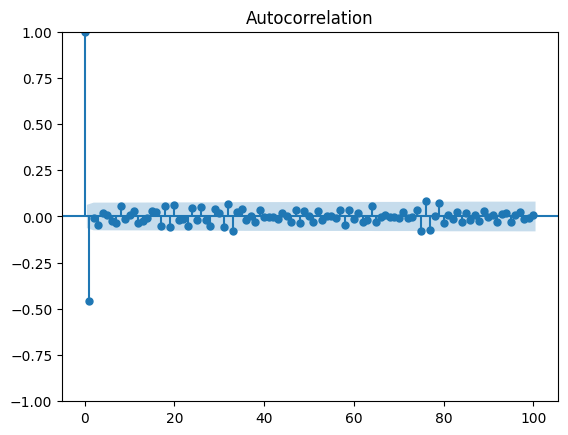

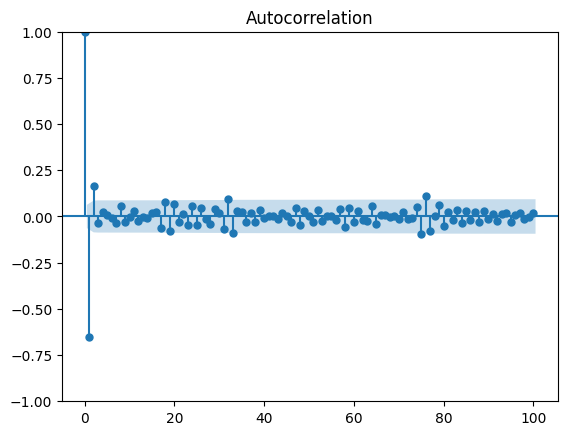

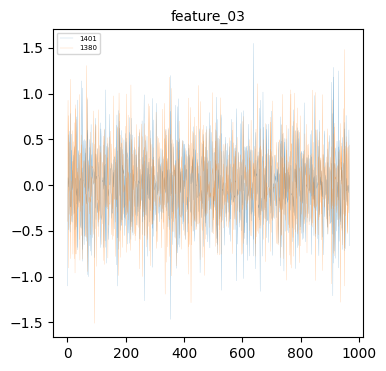

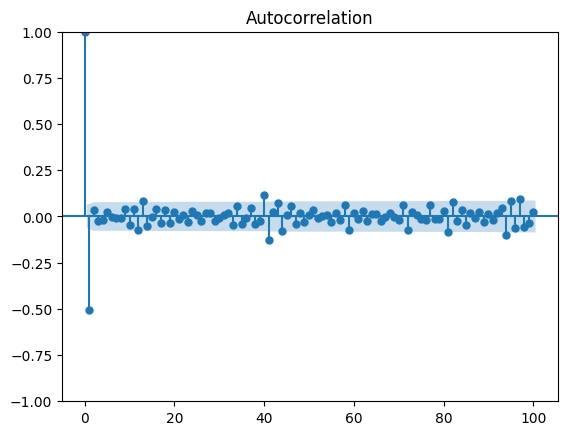

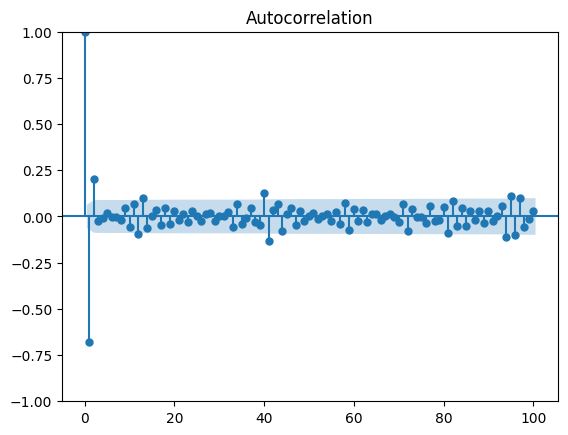

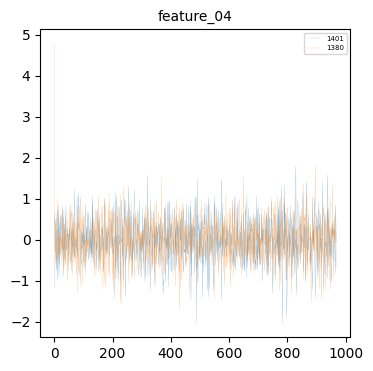

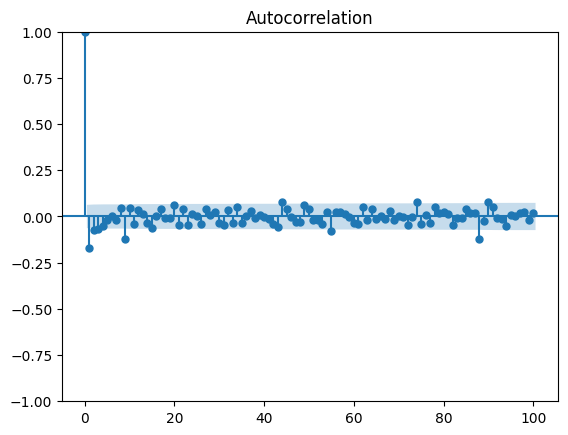

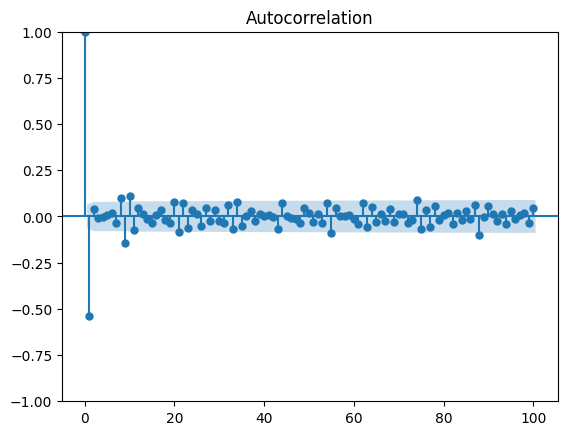

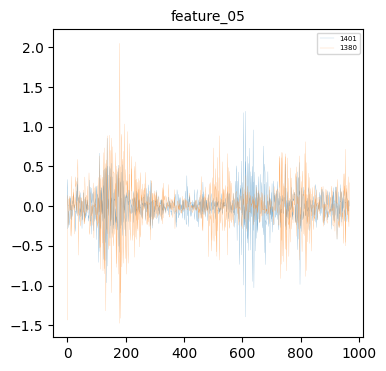

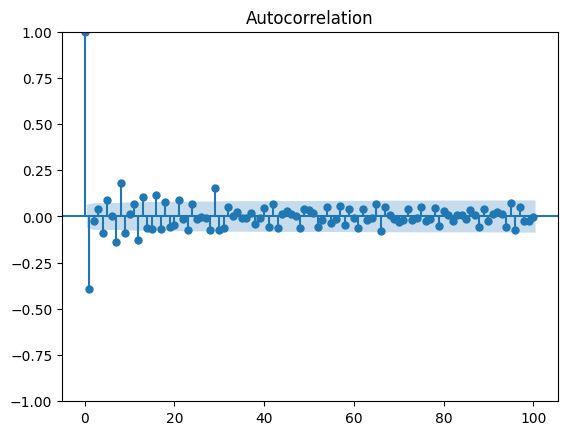

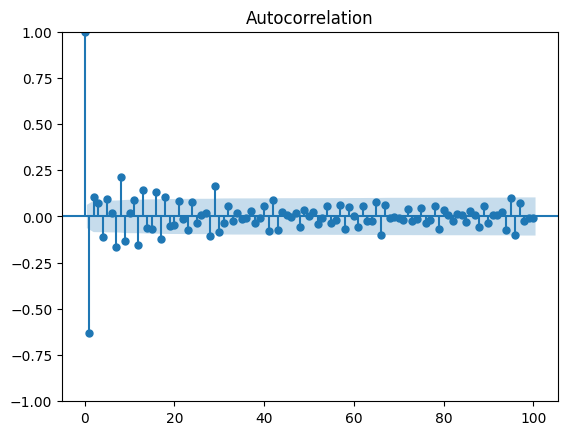

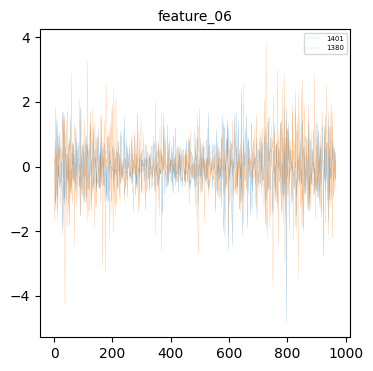

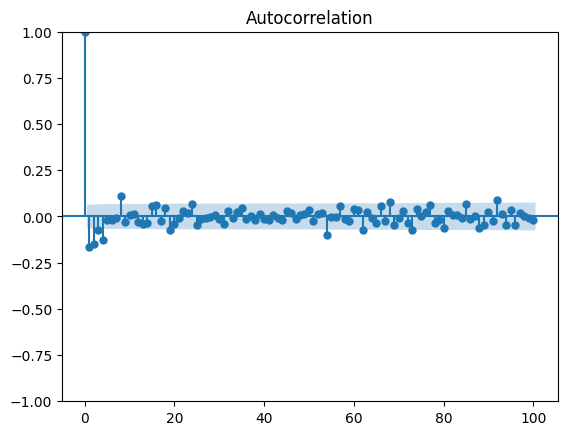

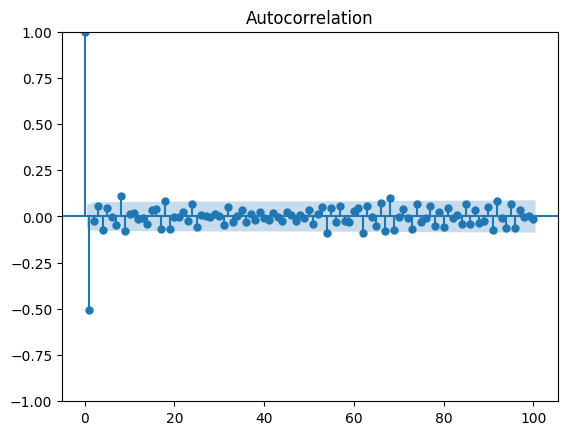

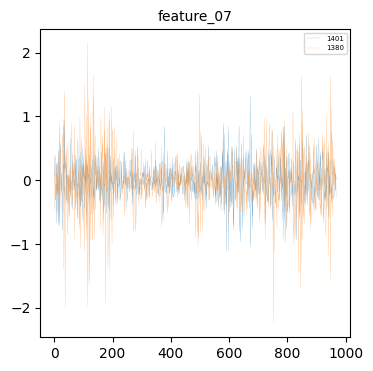

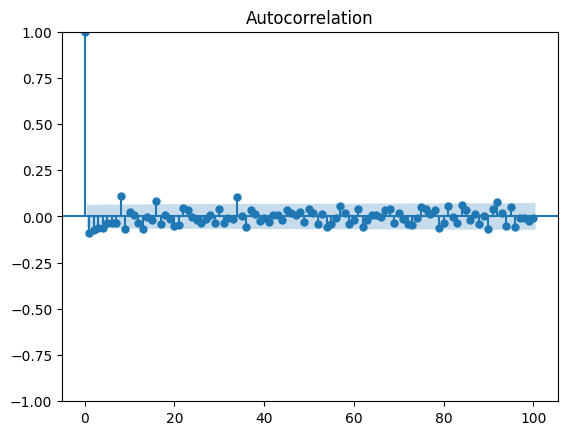

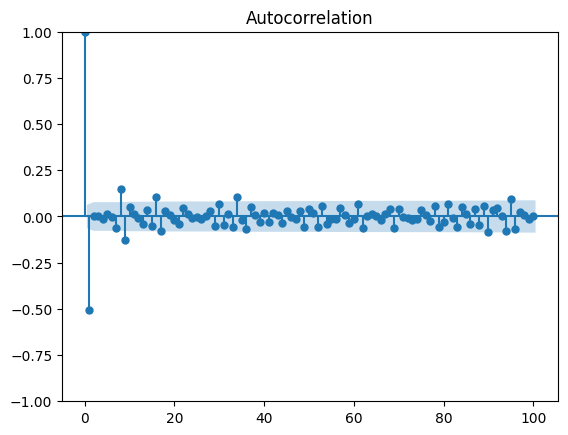

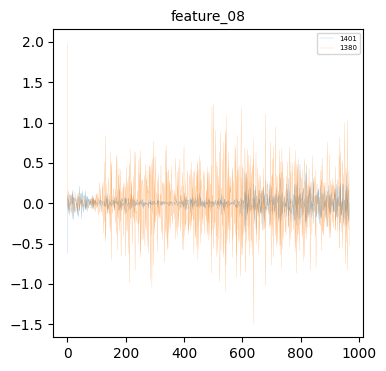

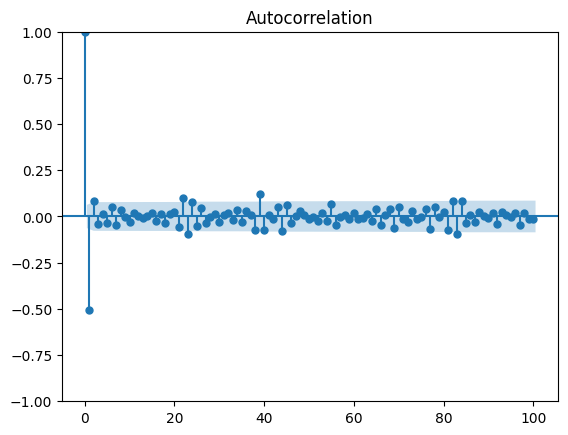

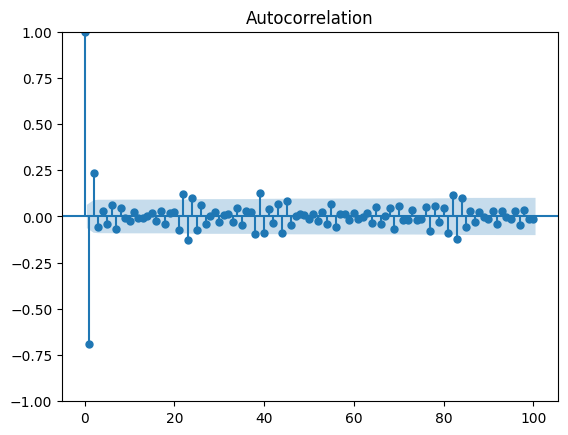

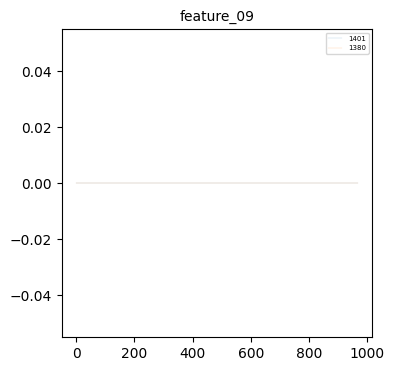

/home/brady/anaconda3/envs/jane_env/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:702: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


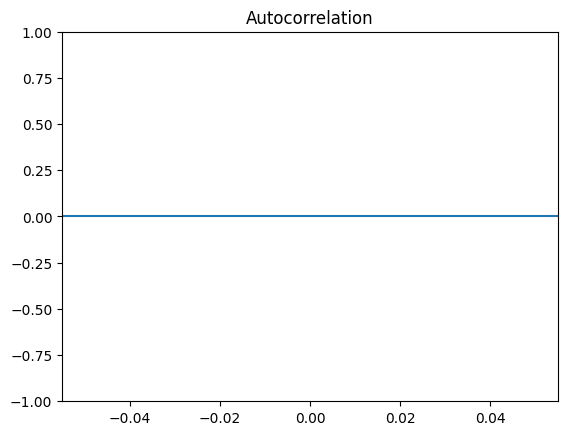

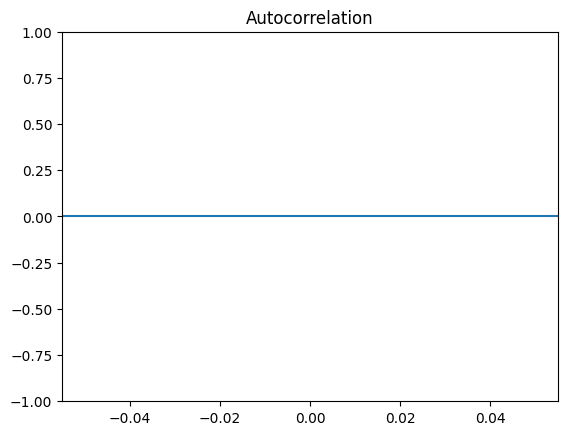

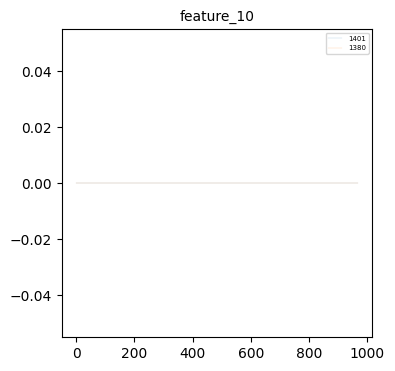

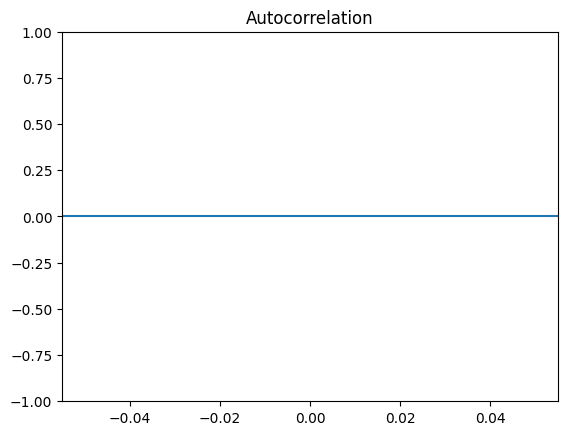

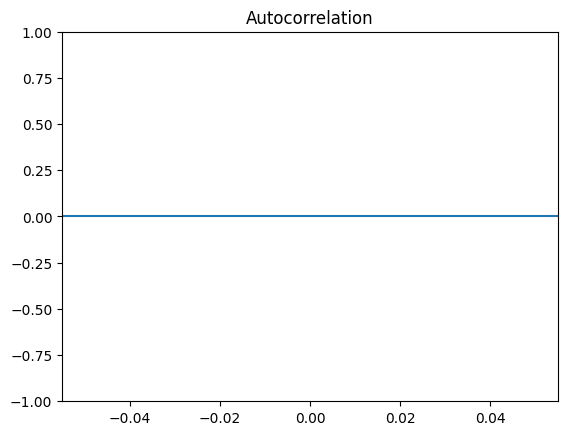

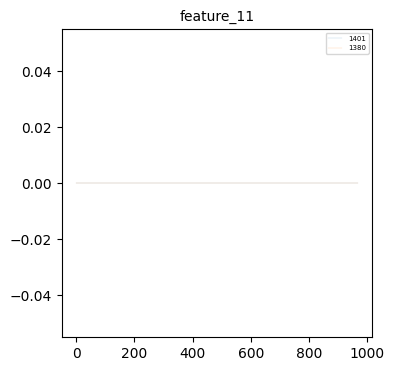

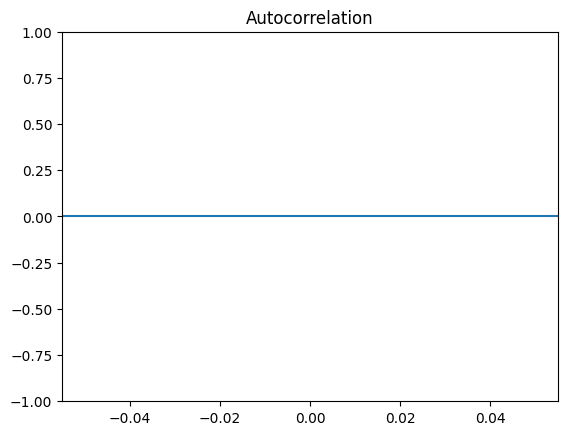

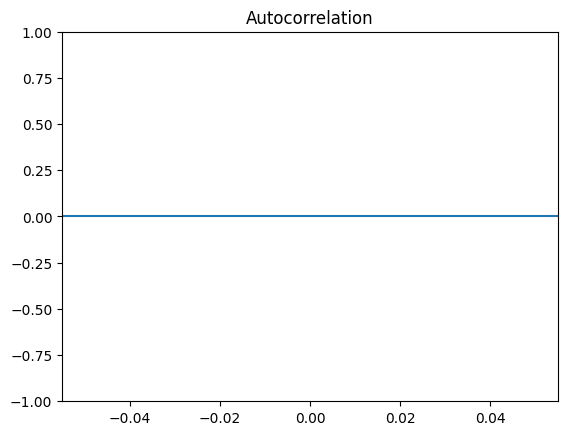

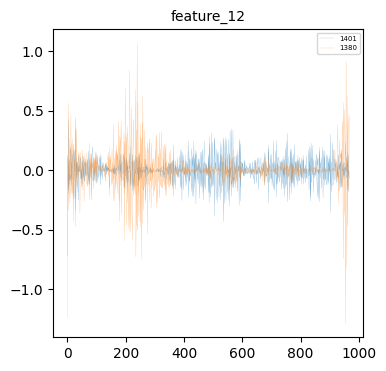

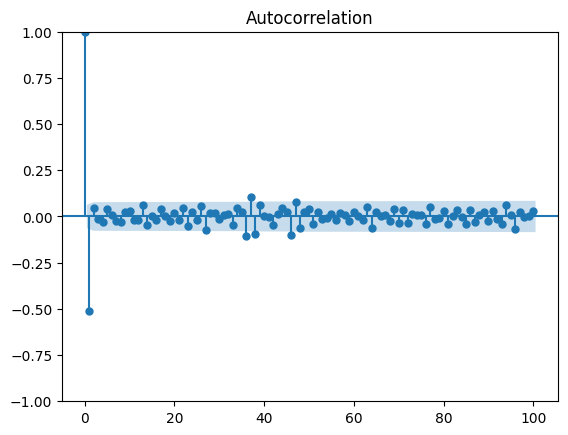

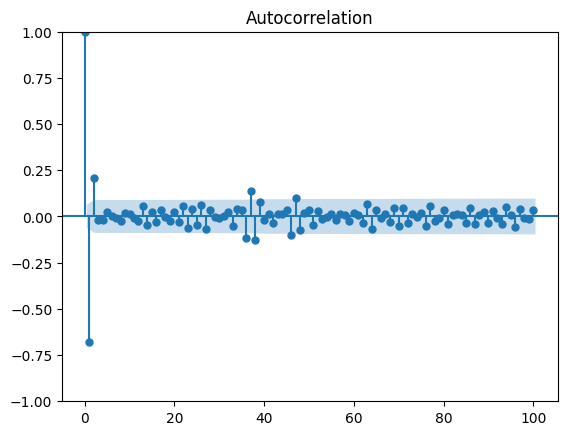

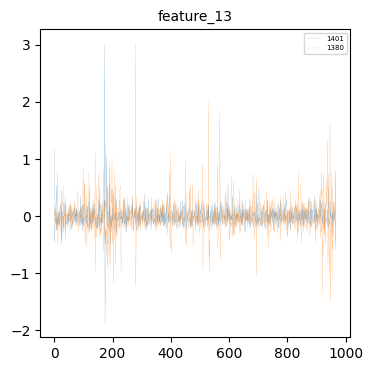

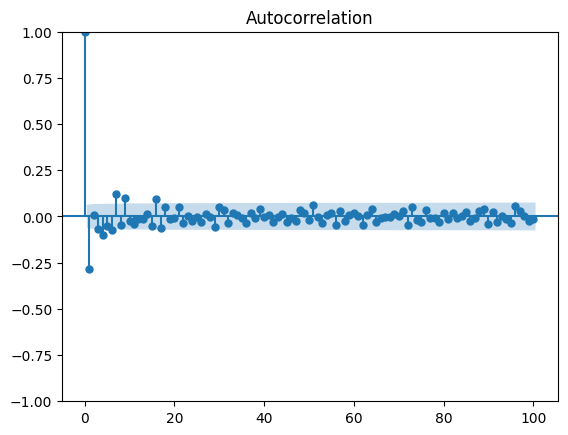

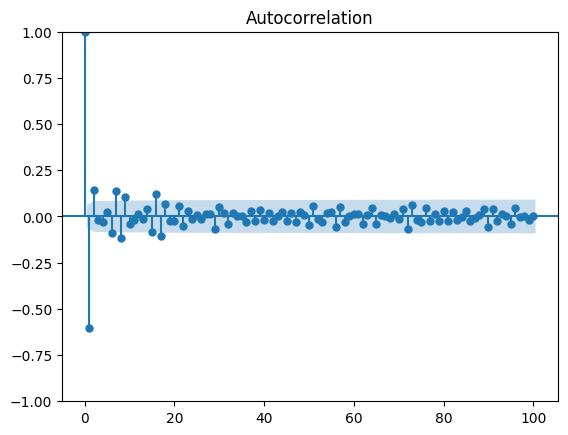

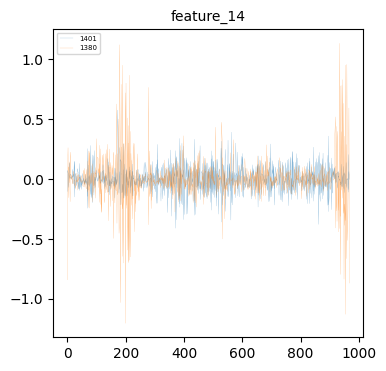

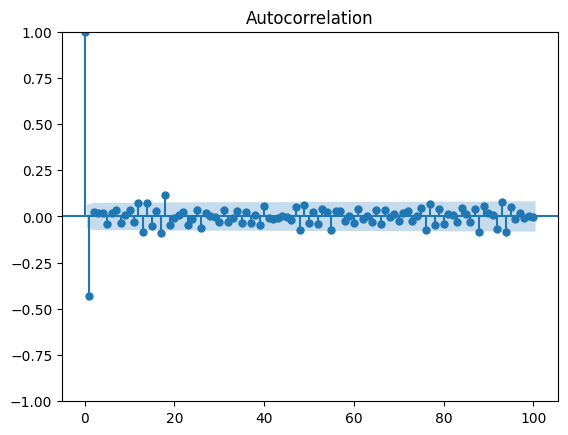

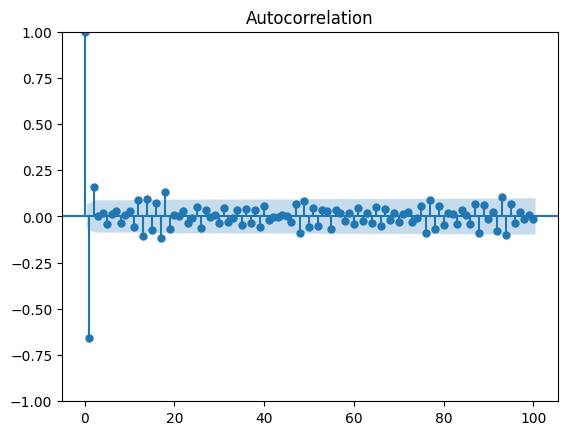

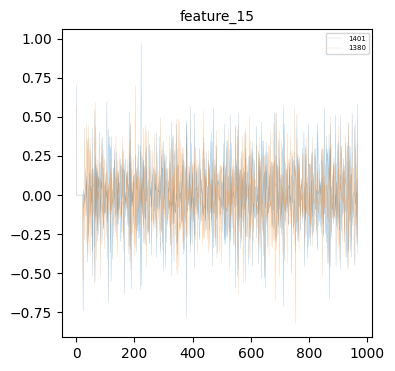

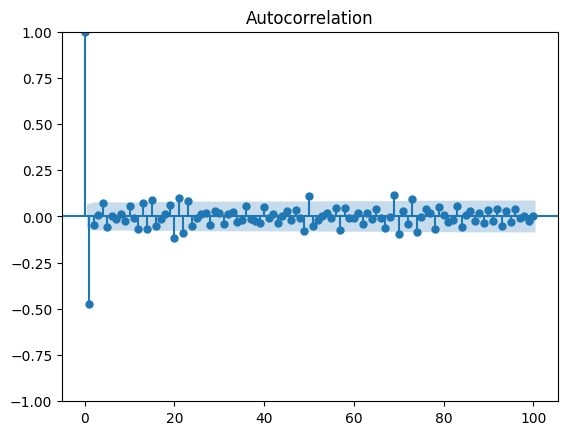

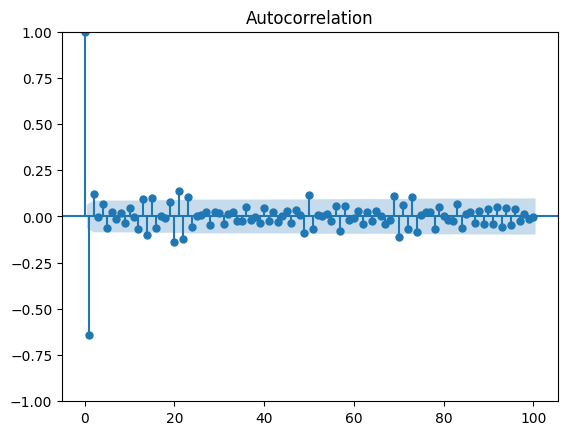

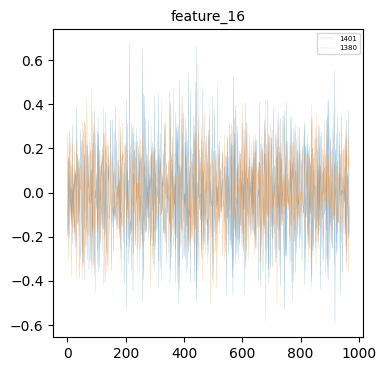

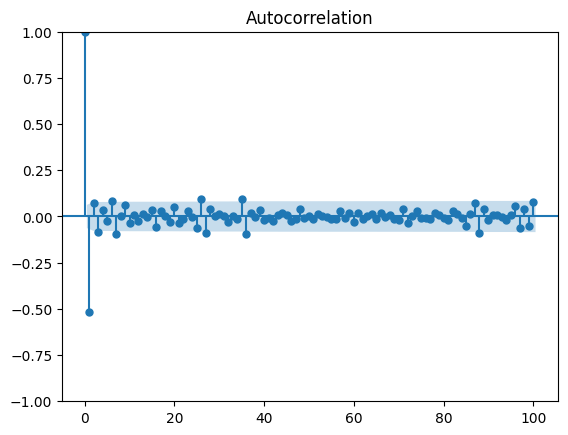

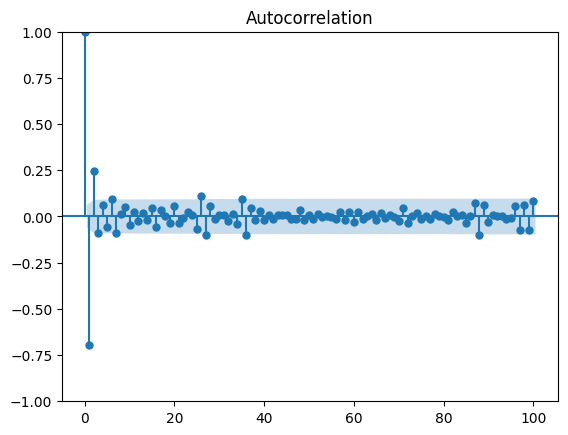

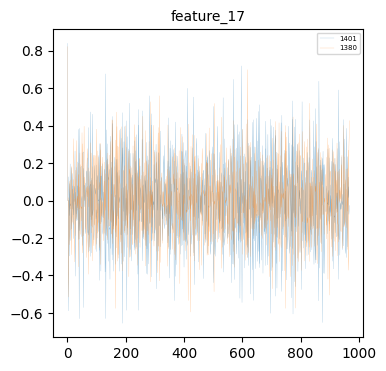

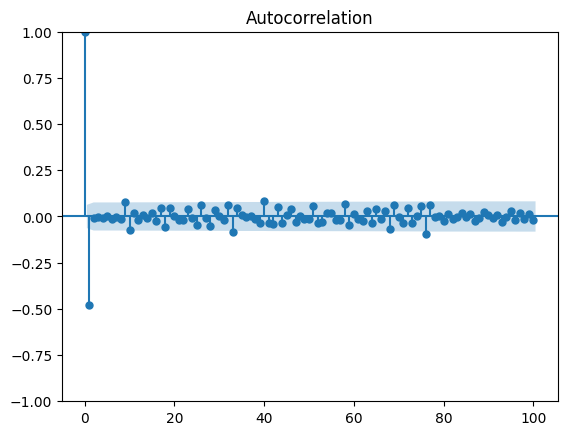

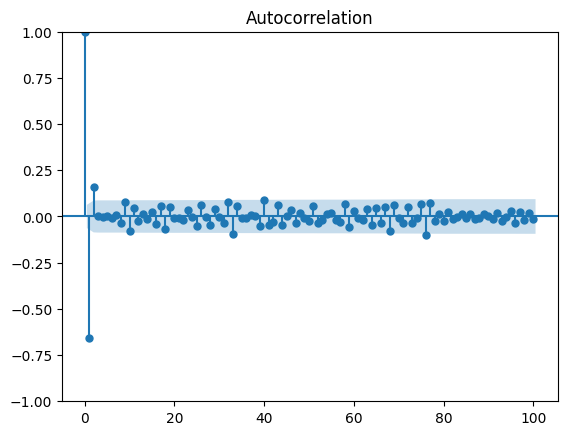

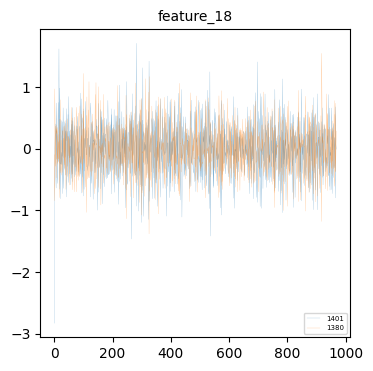

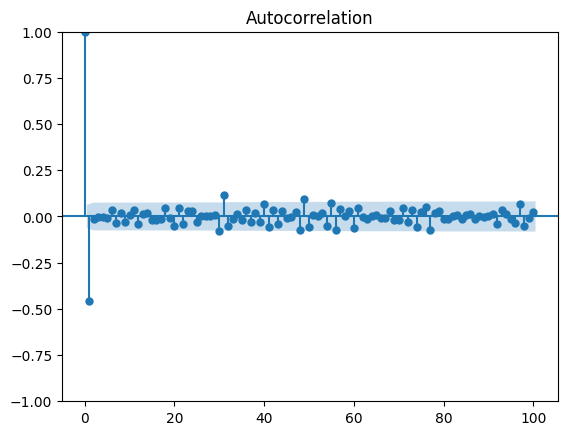

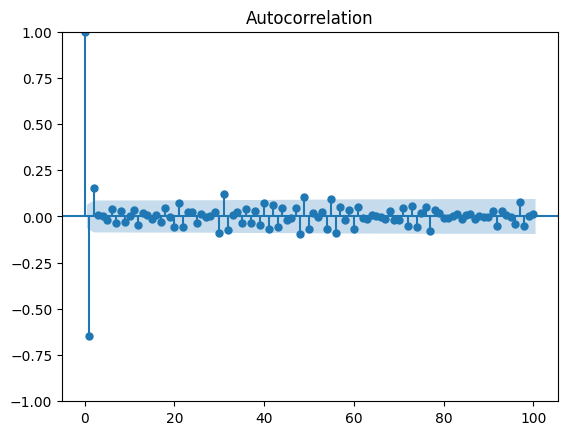

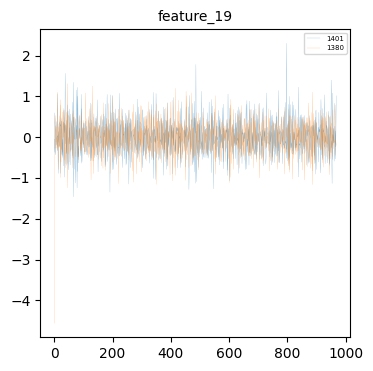

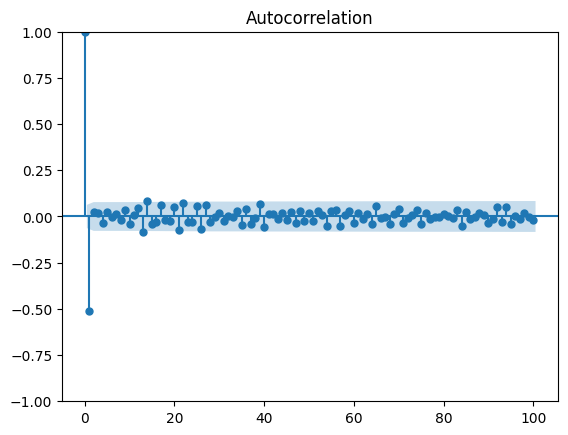

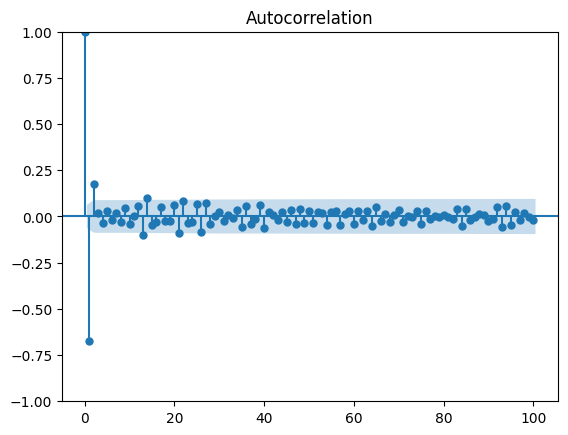

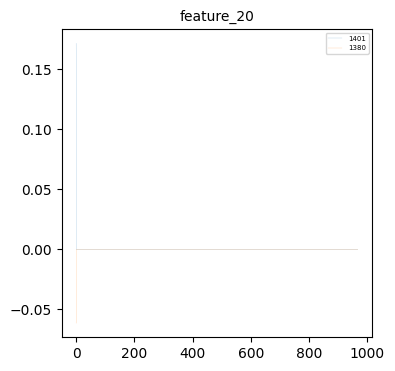

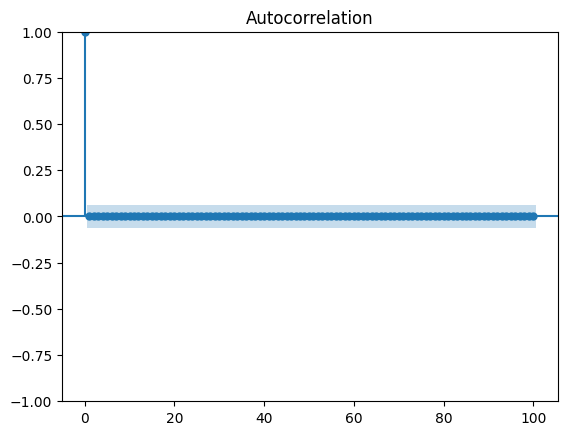

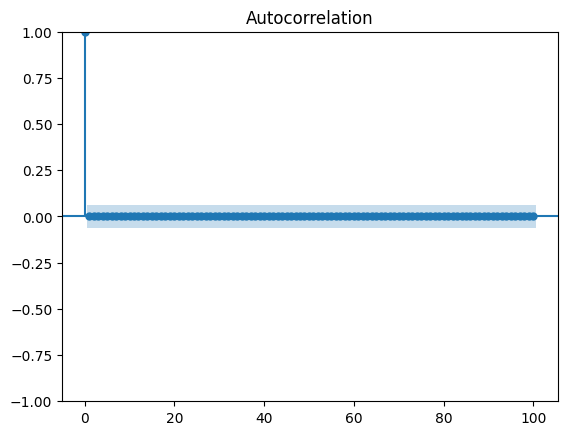

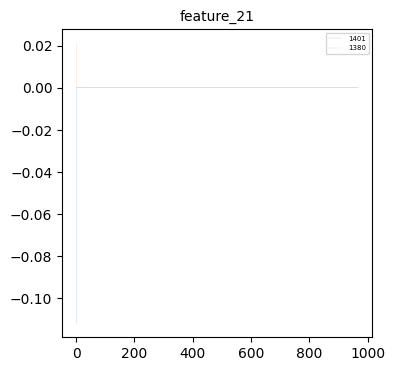

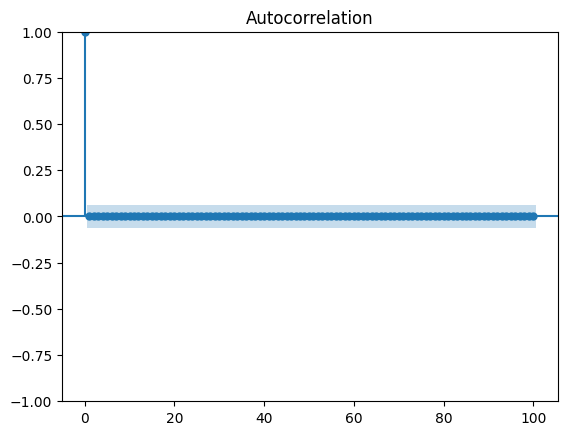

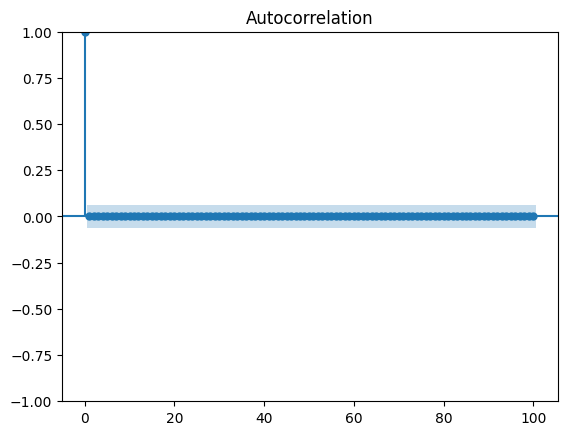

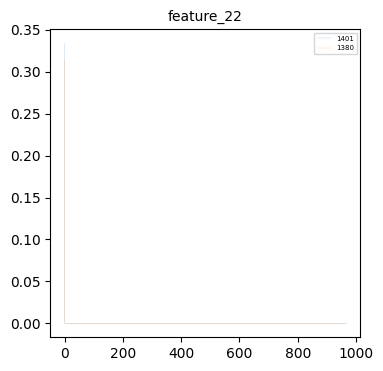

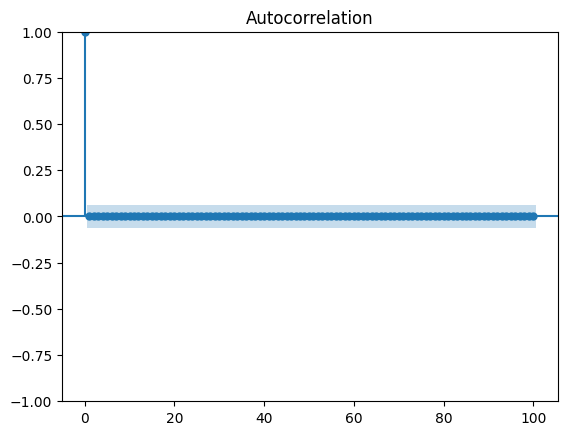

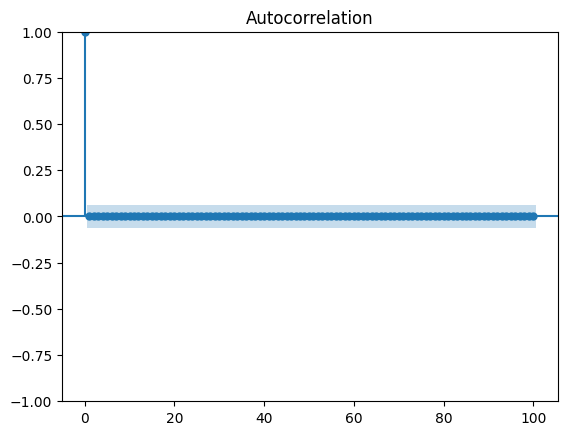

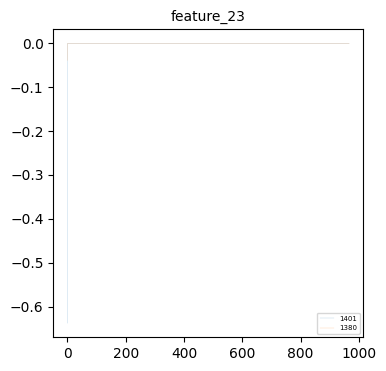

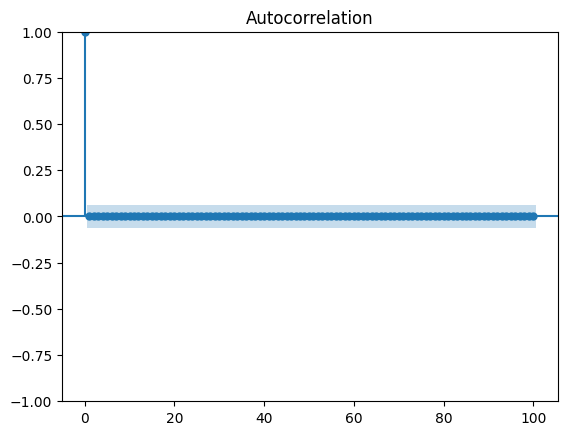

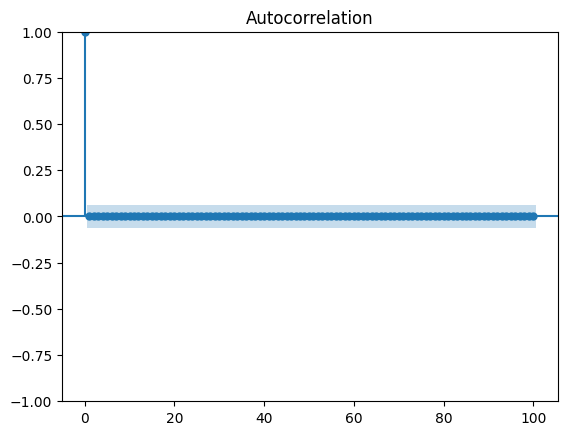

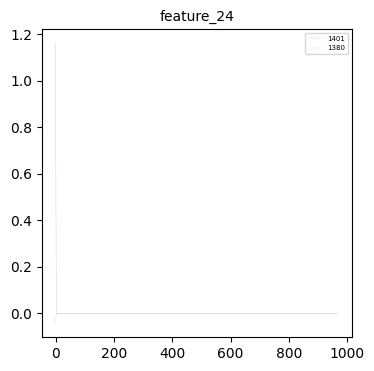

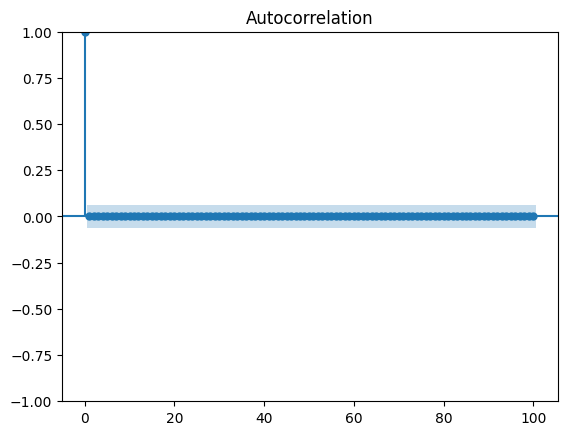

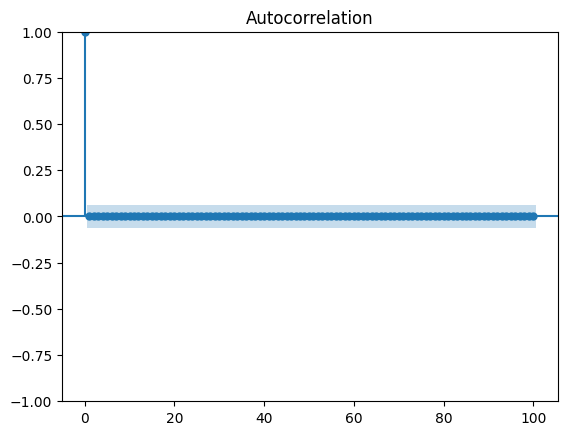

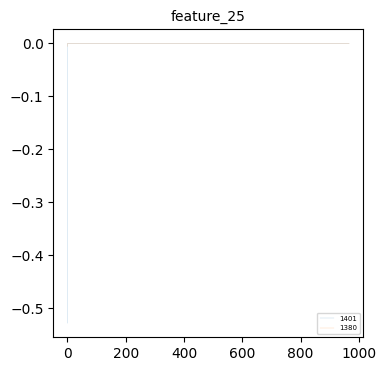

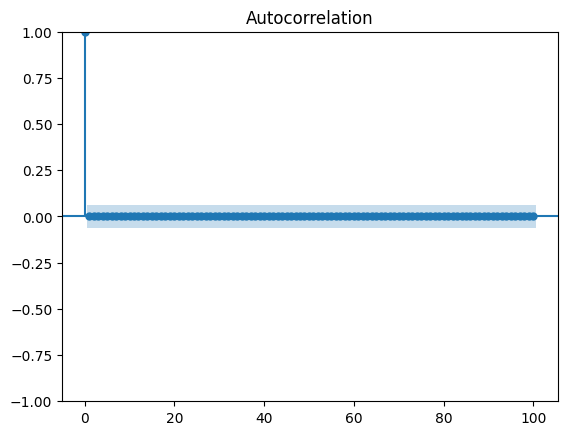

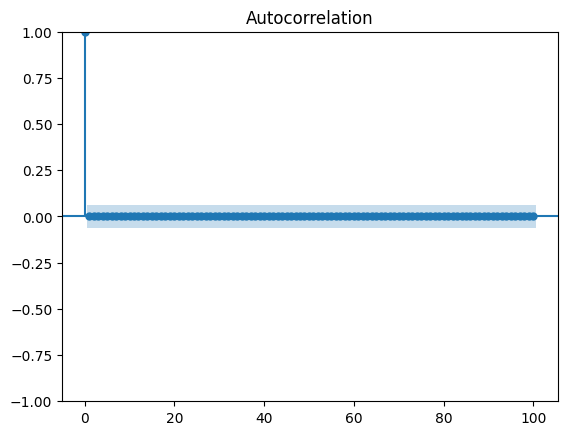

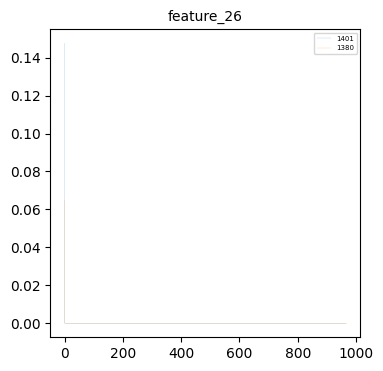

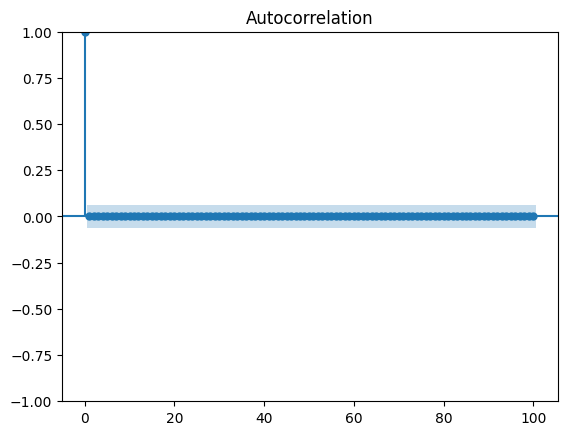

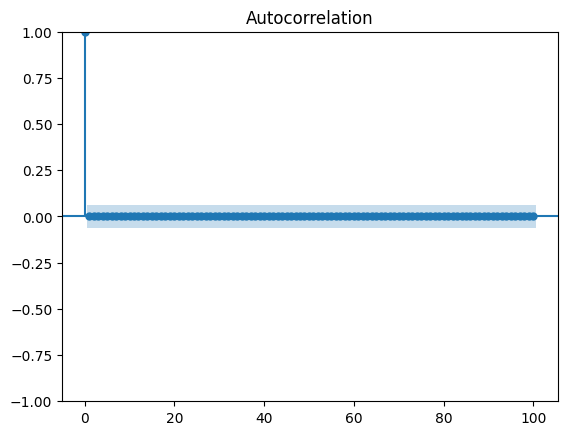

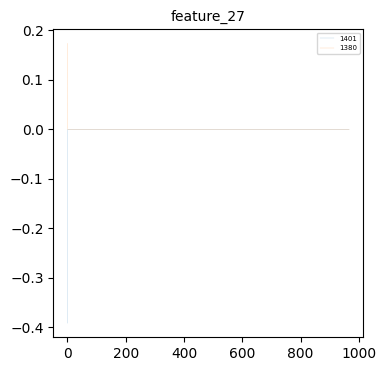

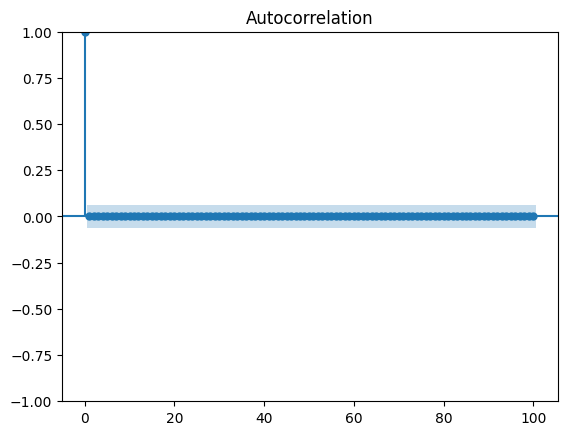

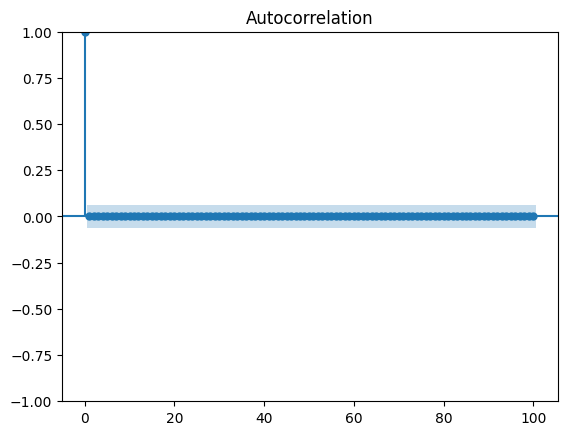

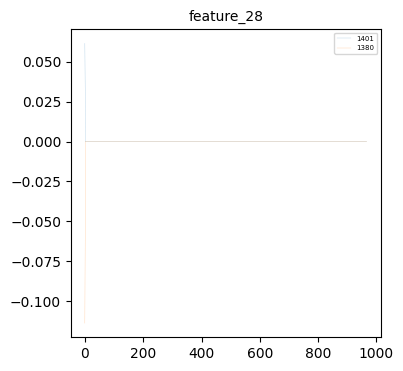

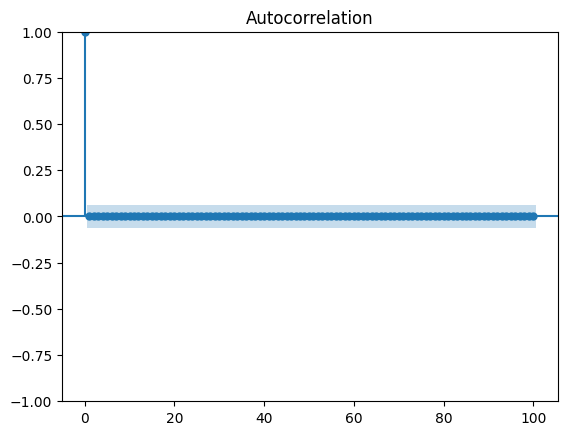

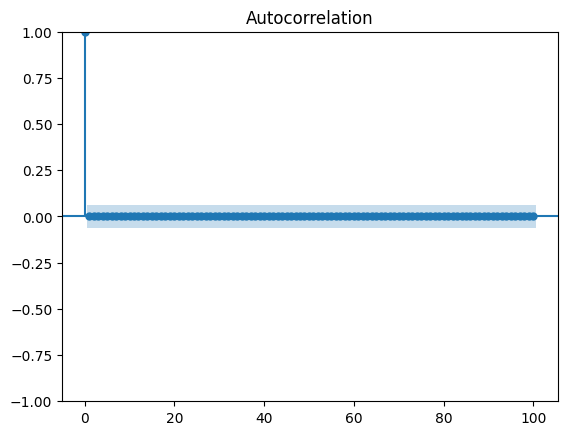

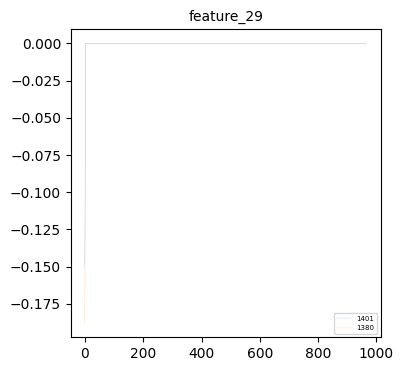

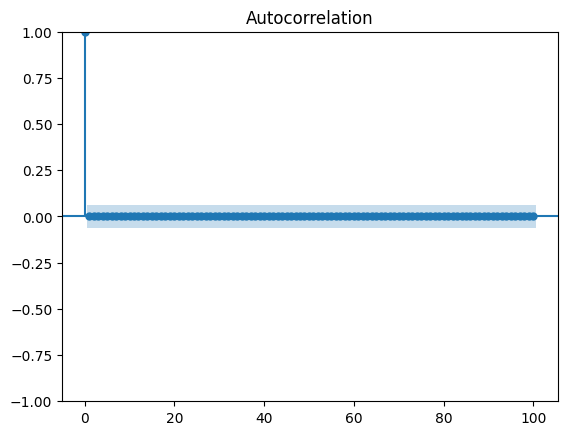

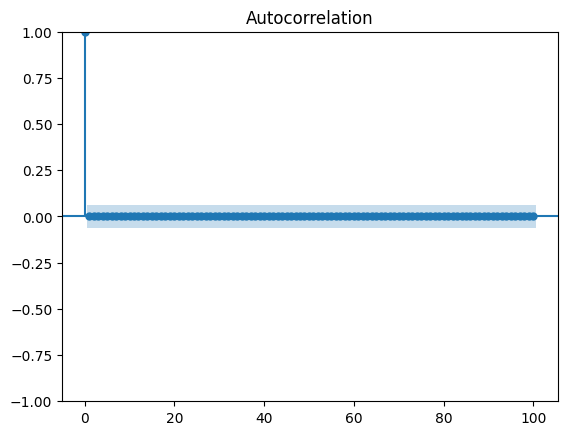

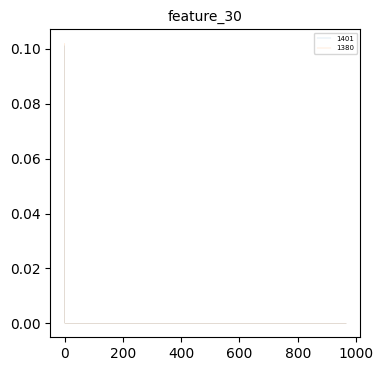

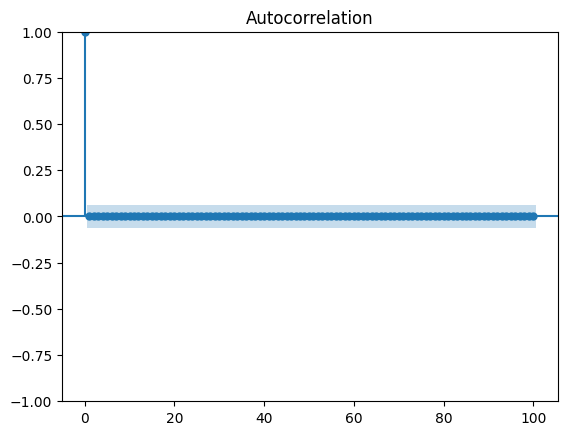

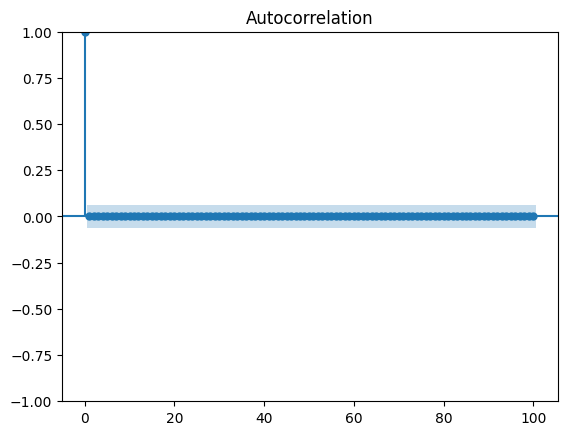

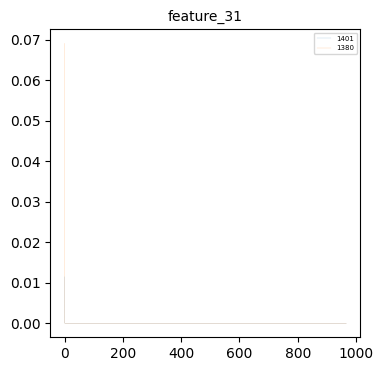

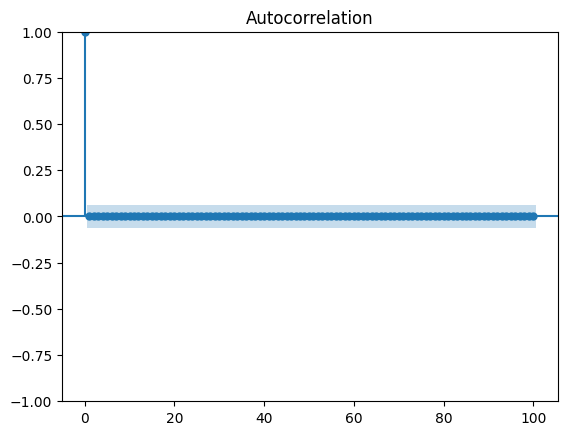

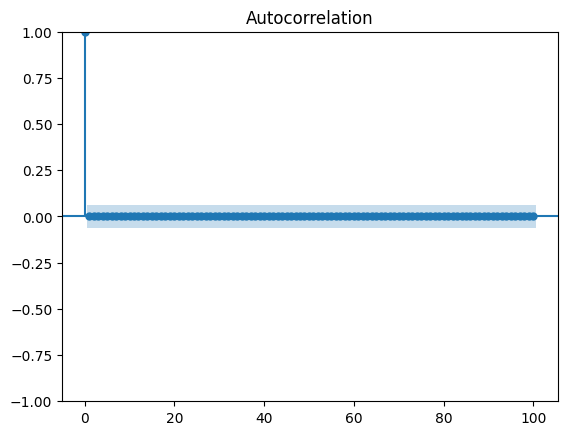

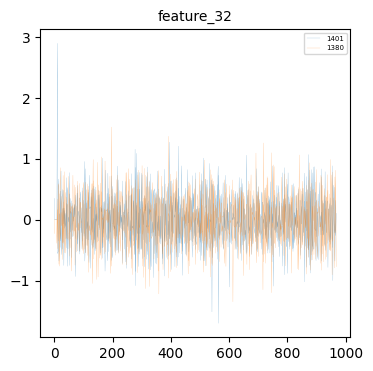

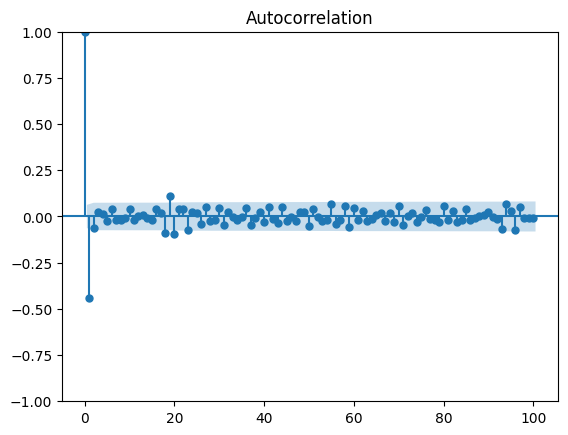

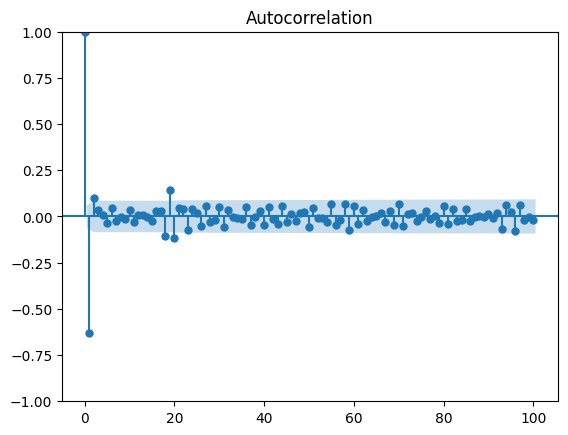

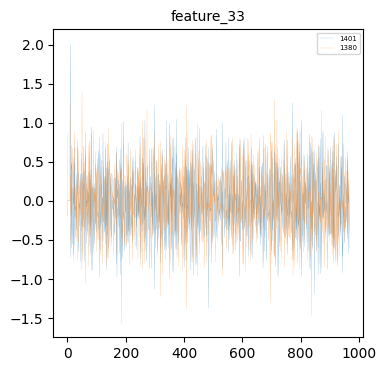

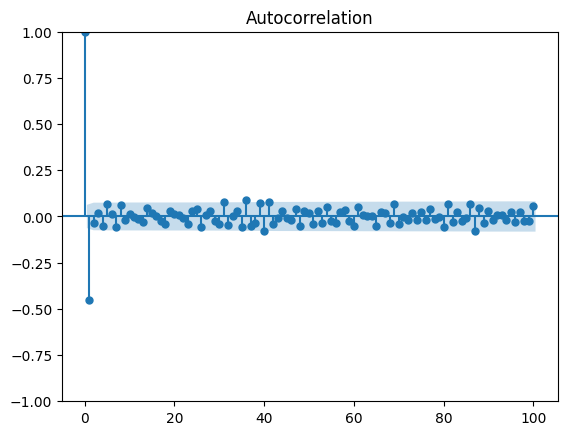

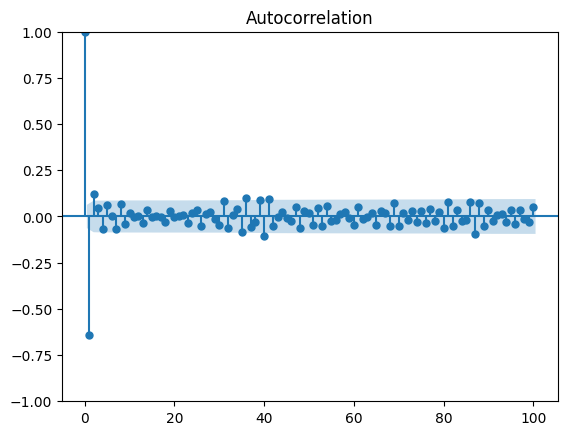

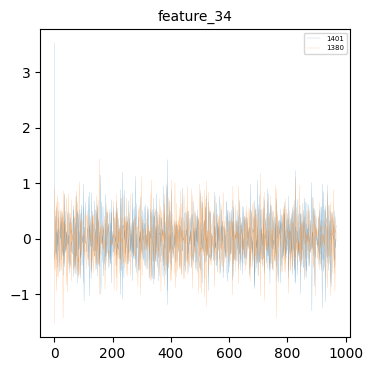

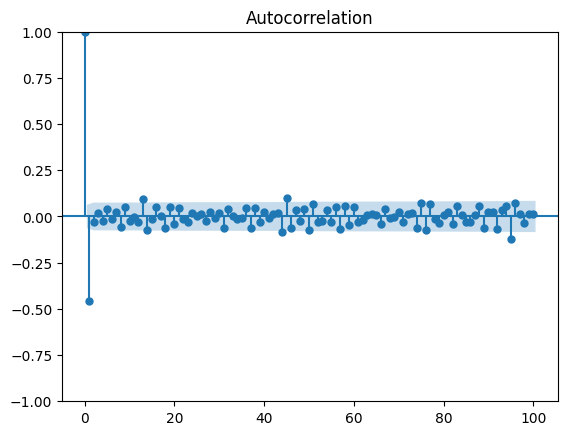

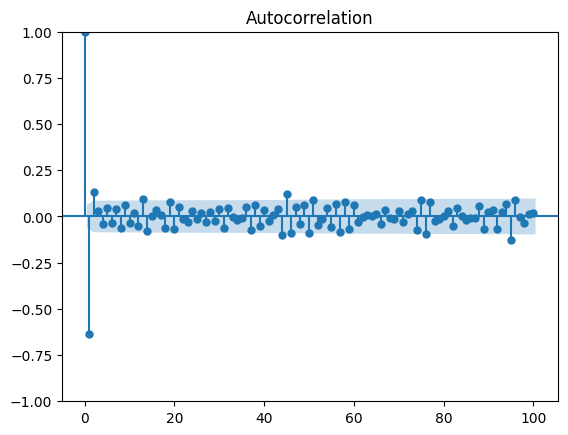

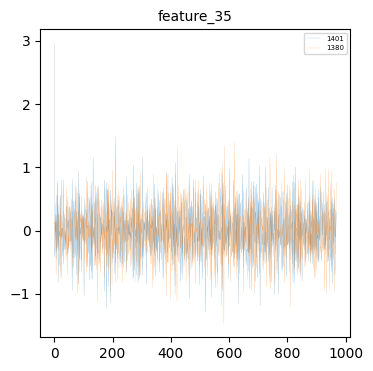

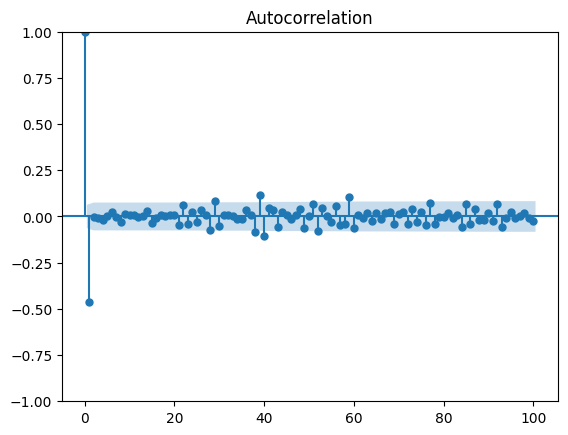

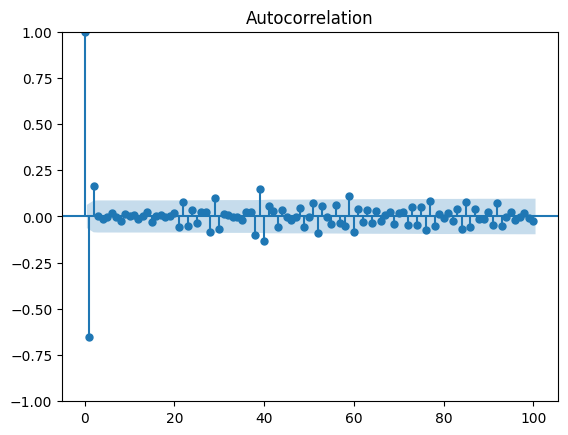

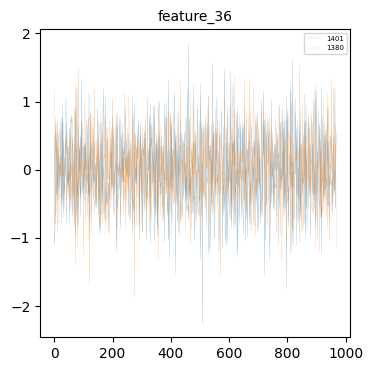

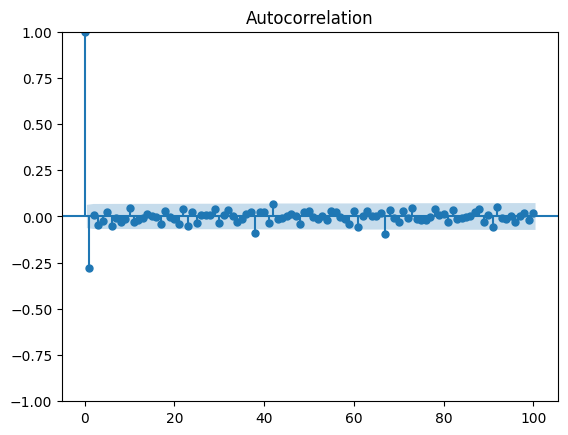

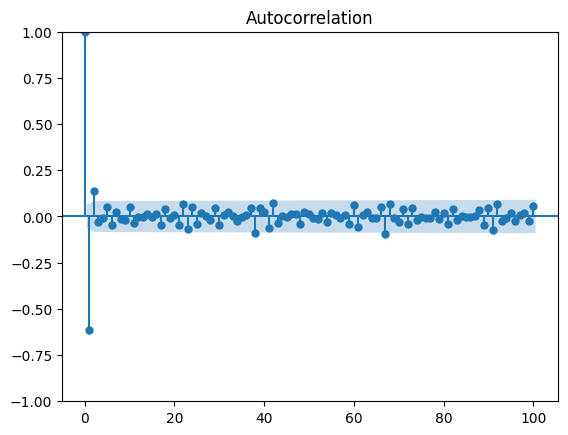

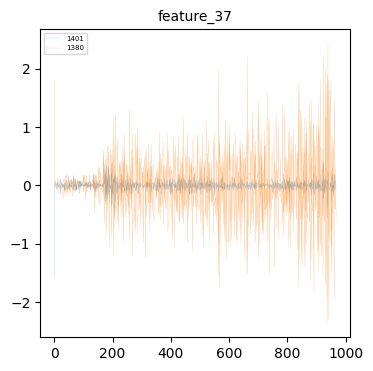

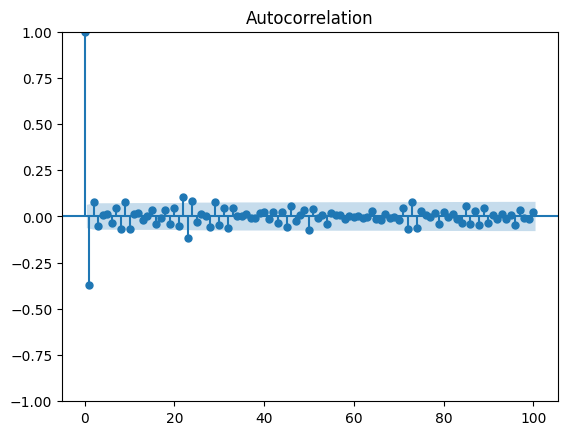

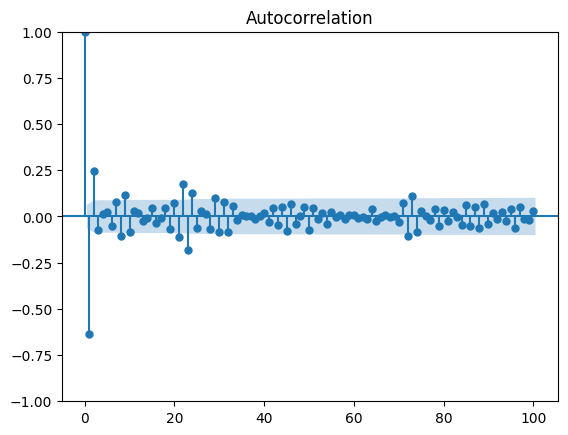

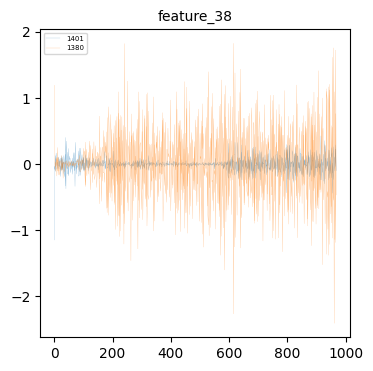

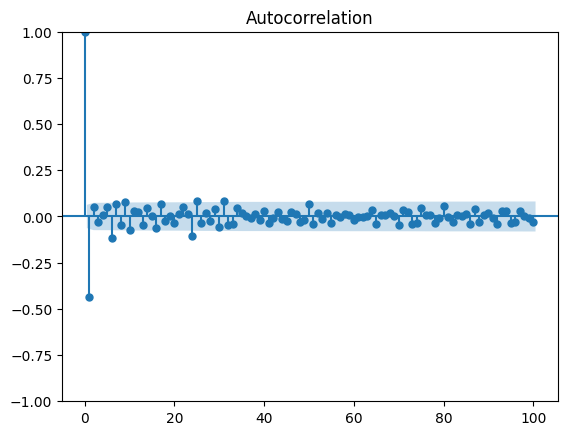

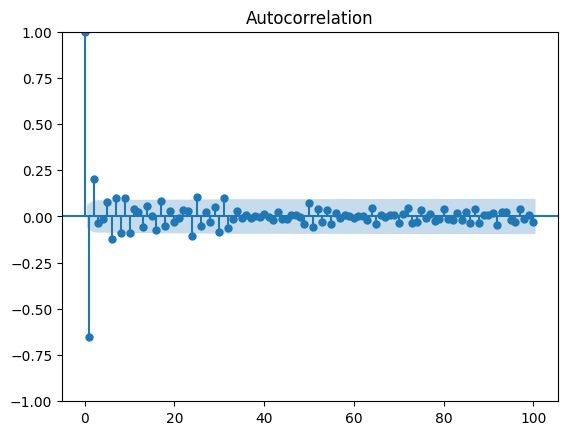

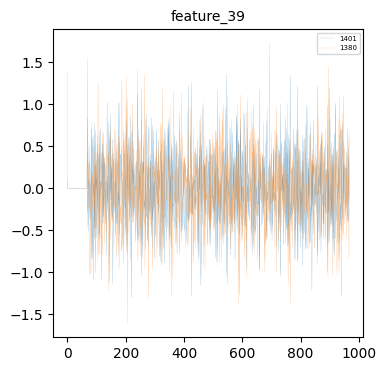

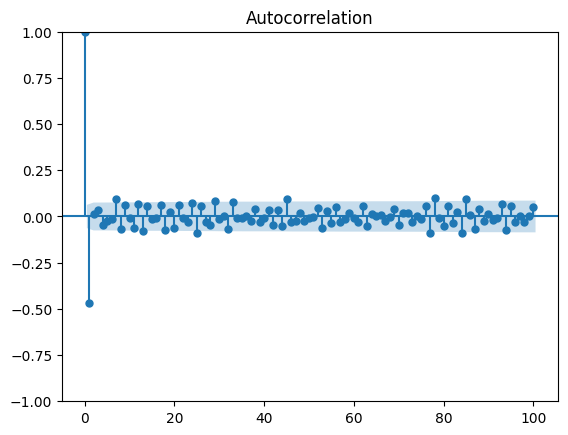

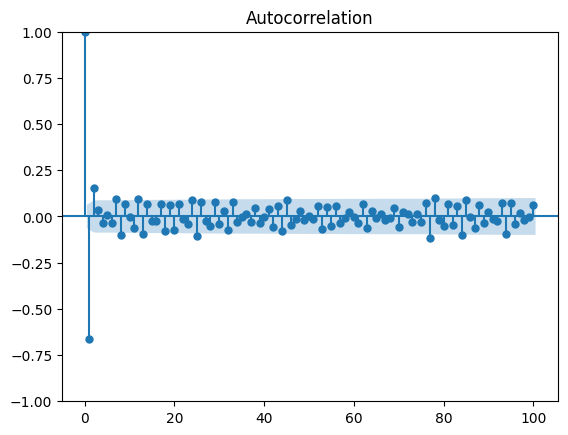

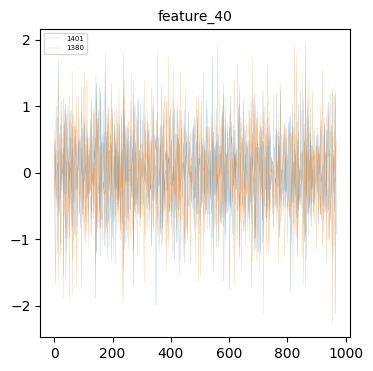

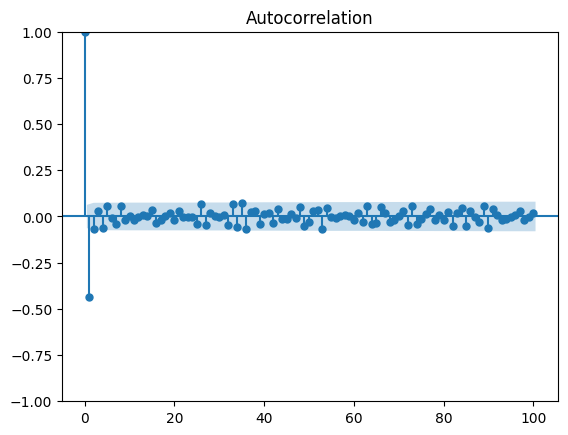

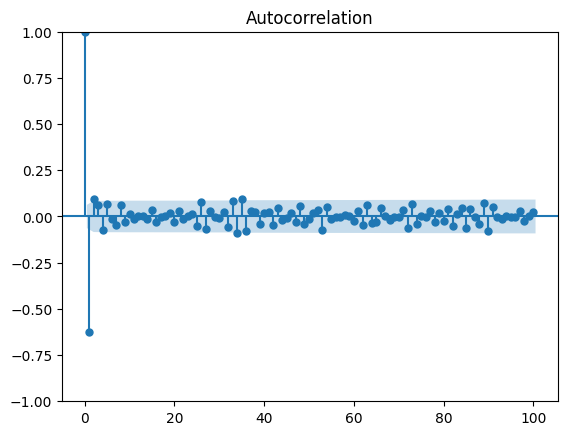

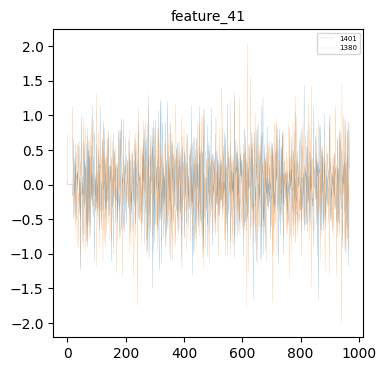

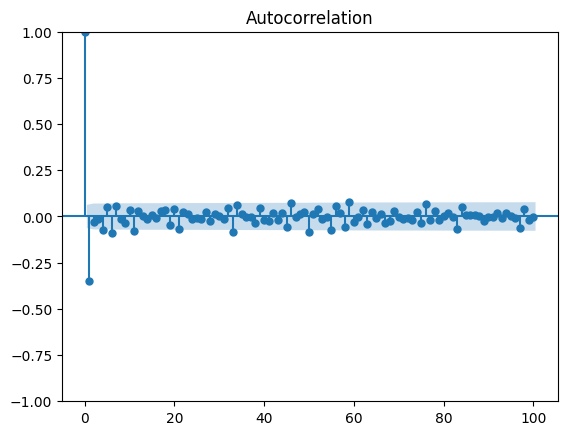

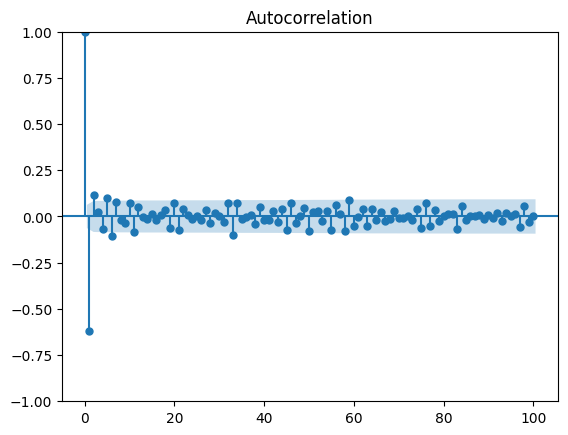

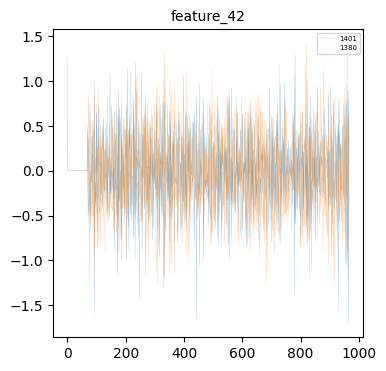

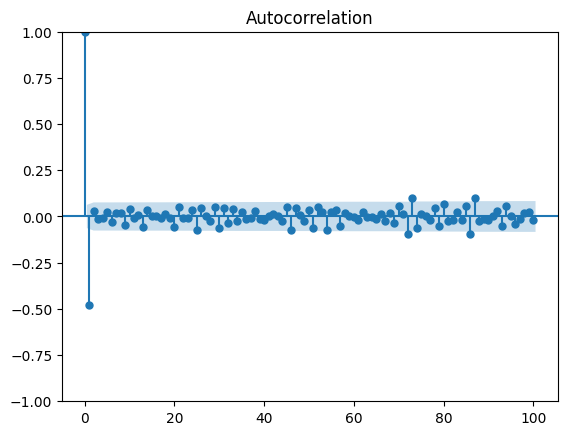

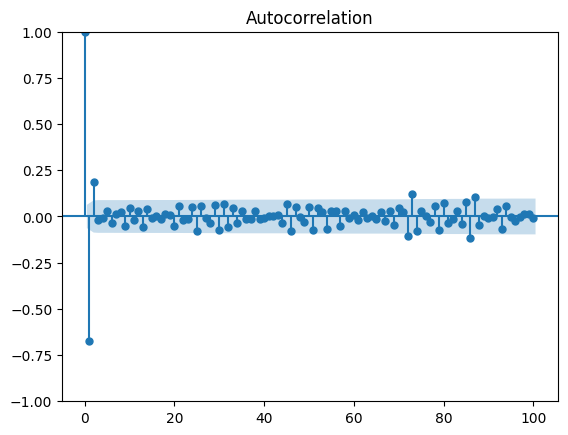

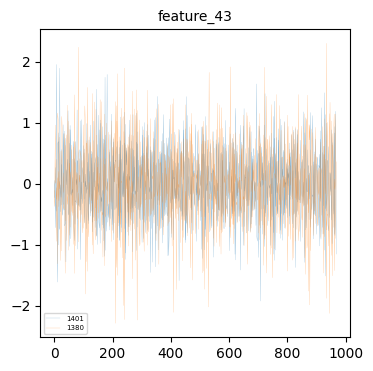

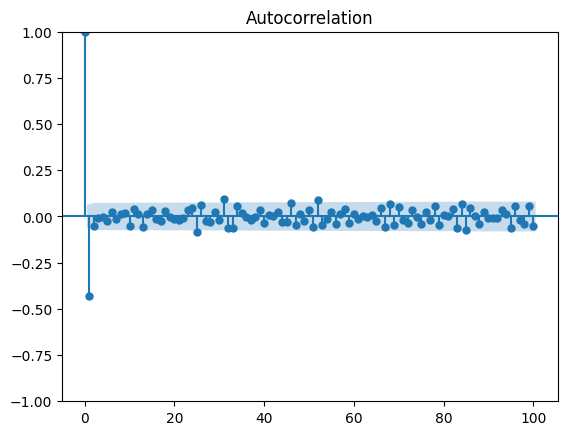

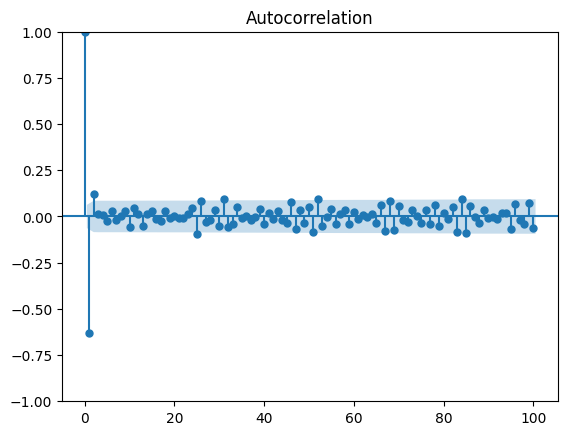

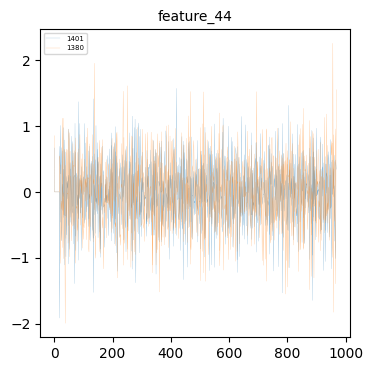

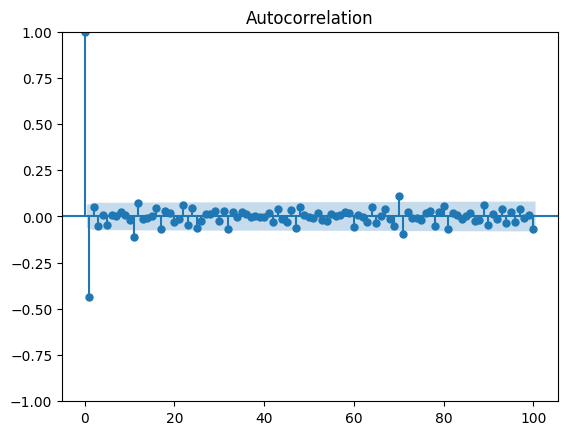

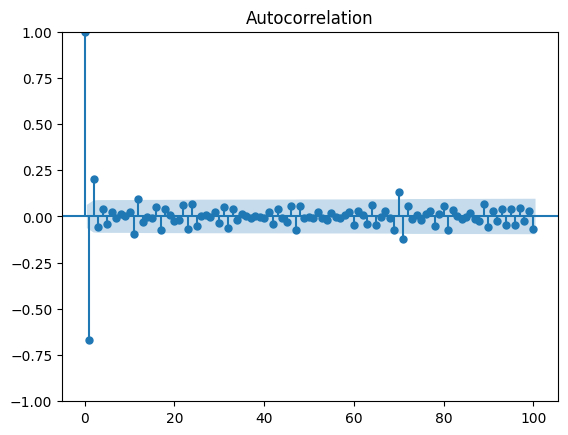

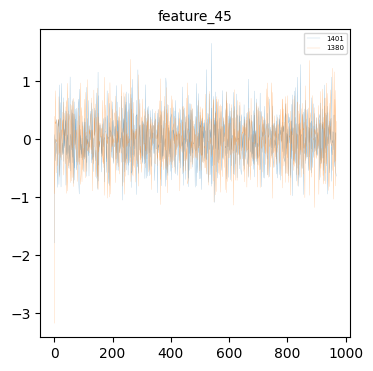

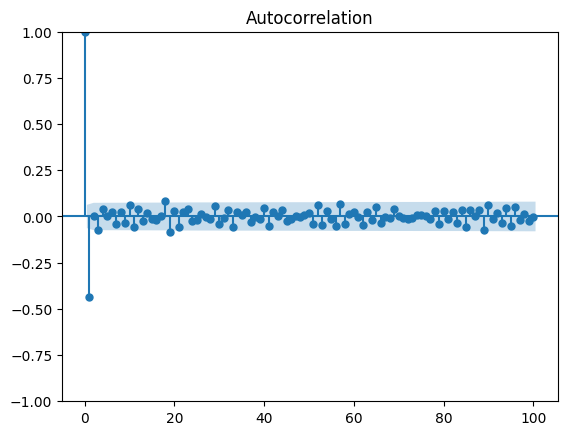

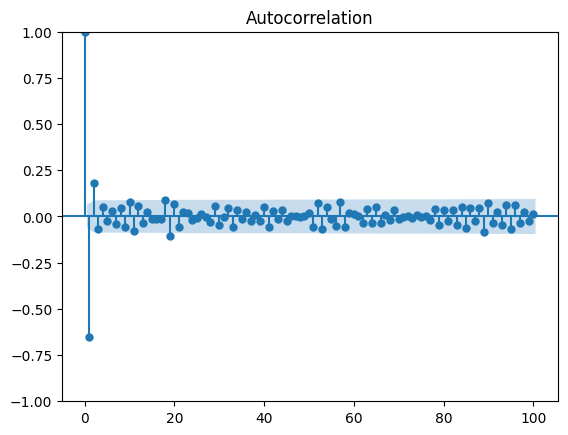

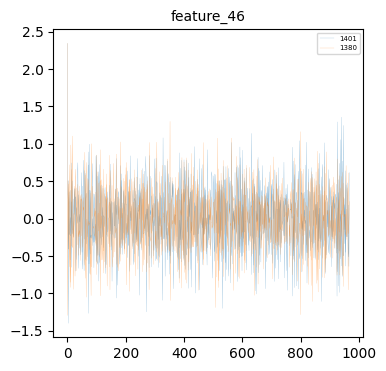

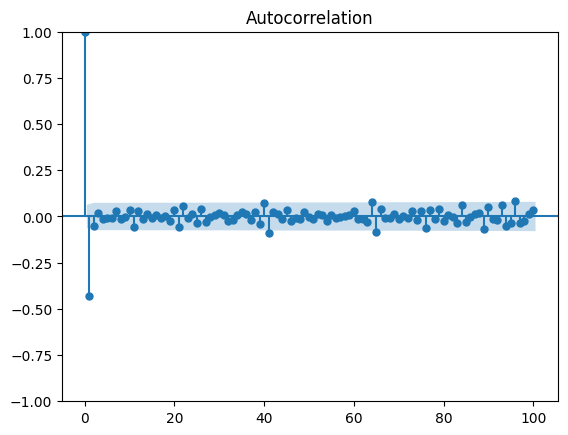

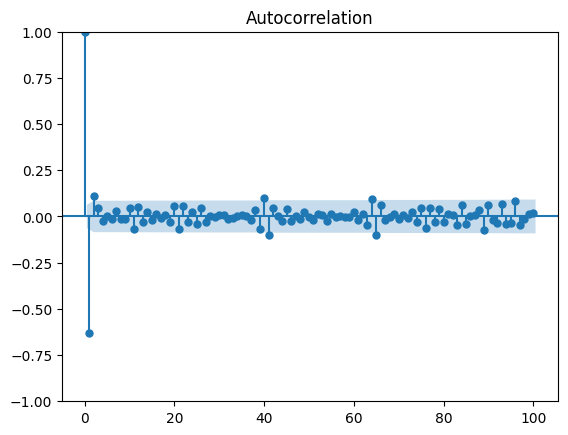

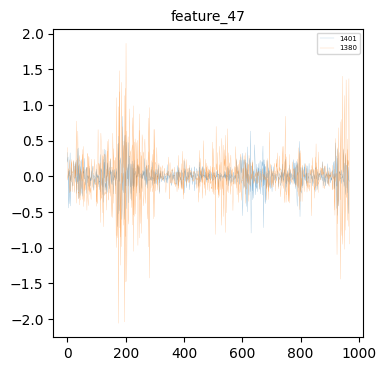

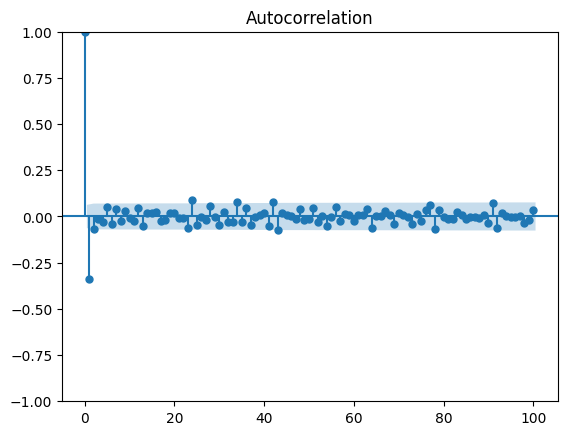

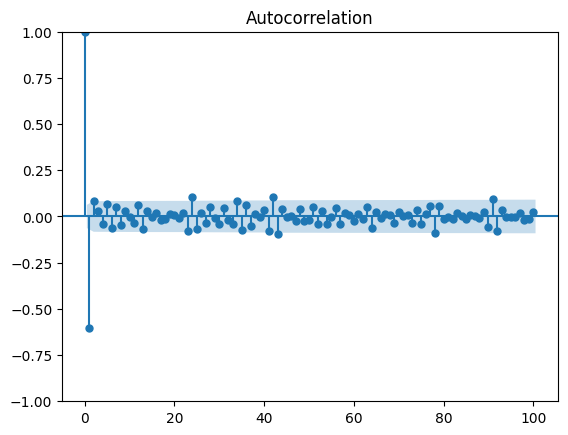

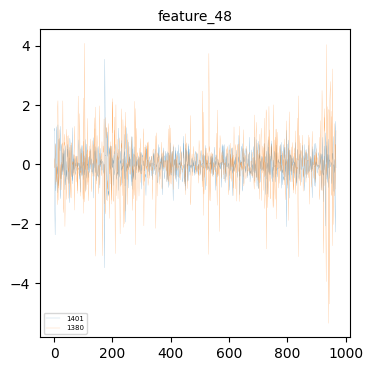

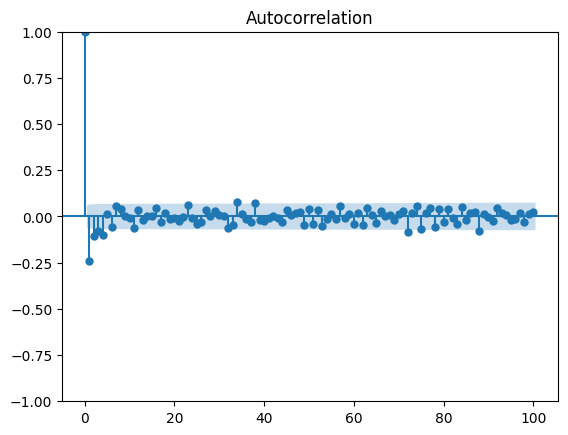

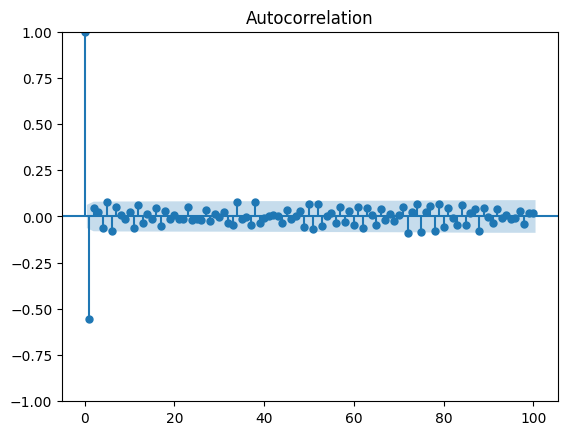

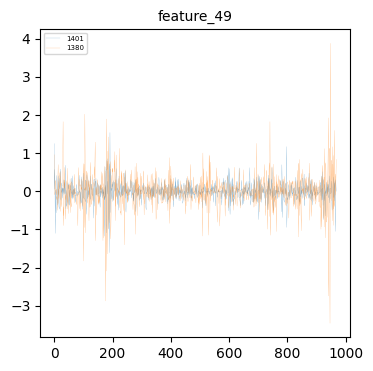

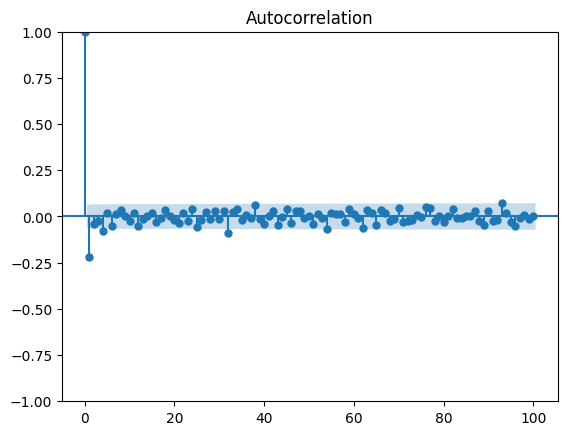

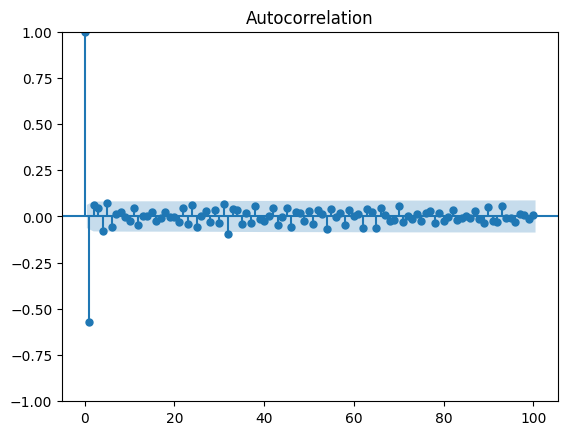

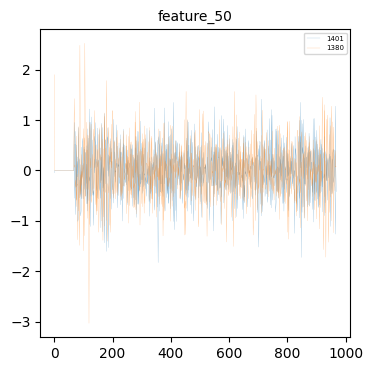

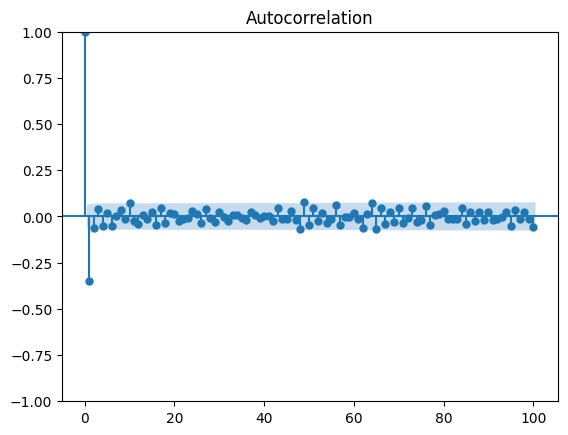

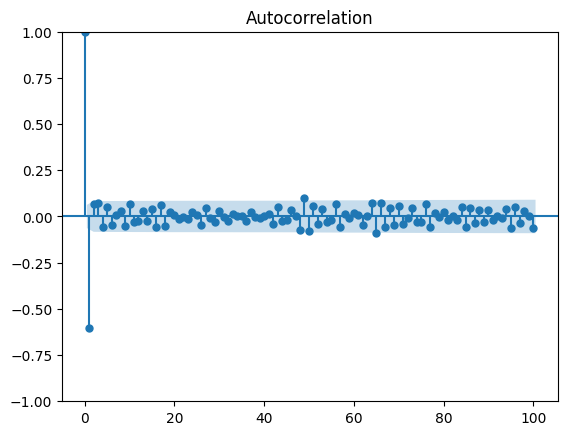

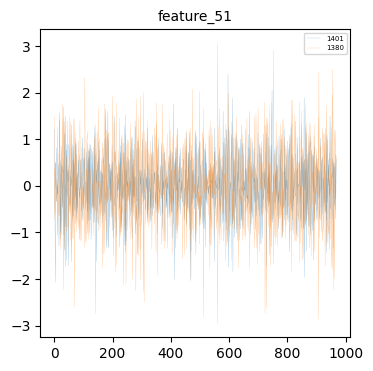

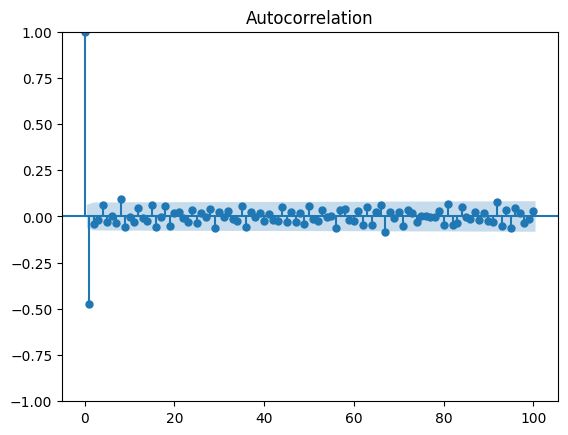

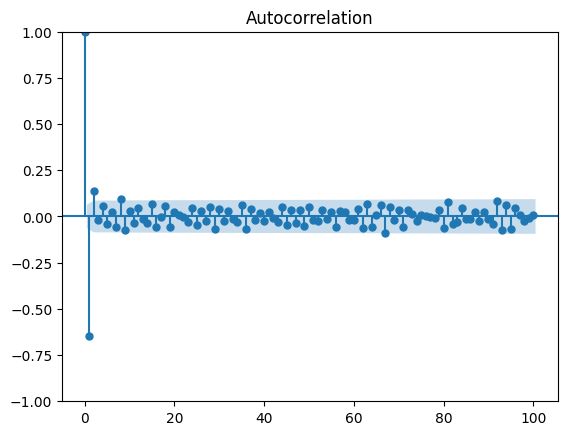

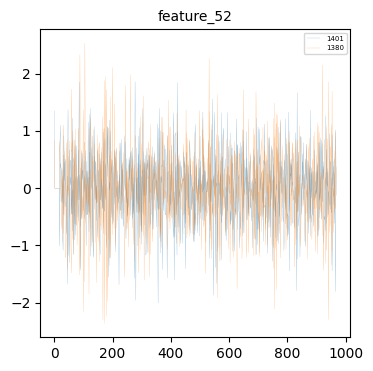

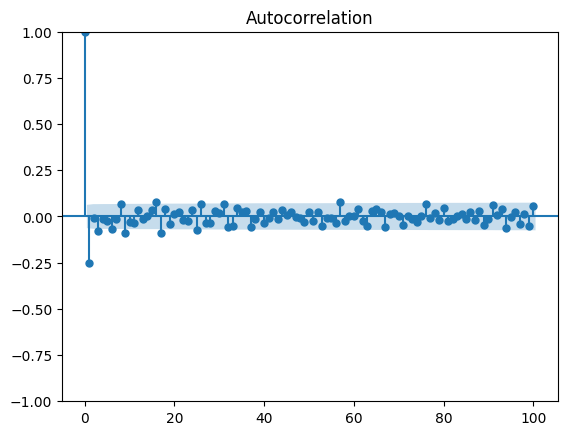

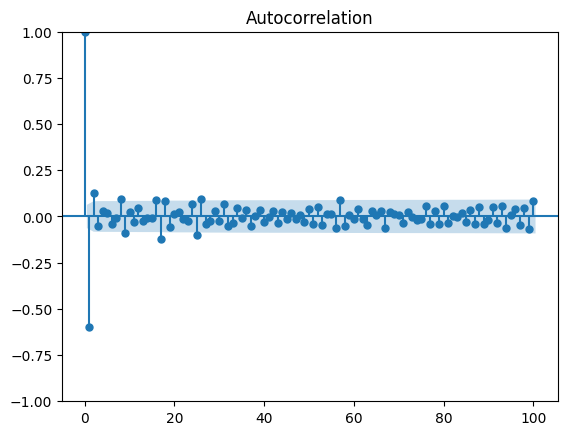

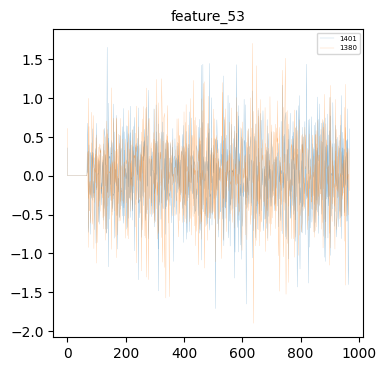

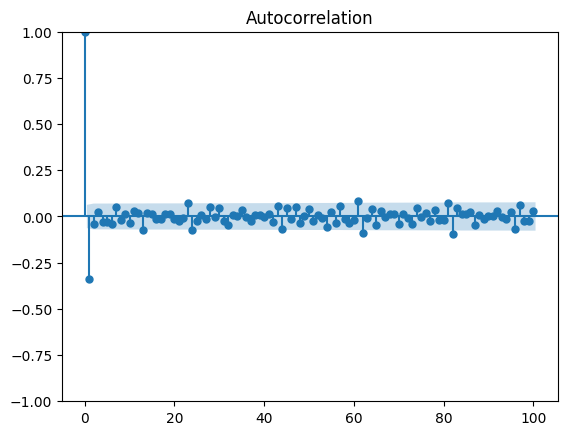

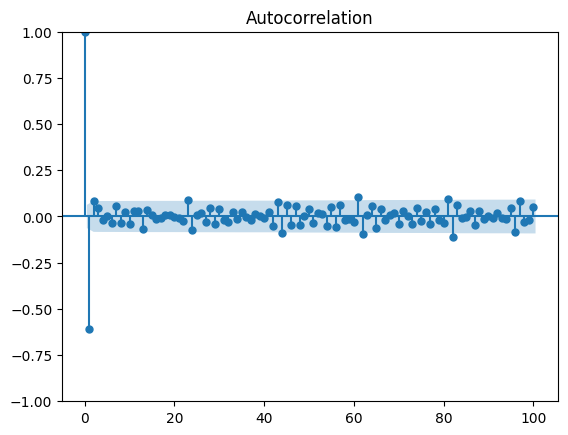

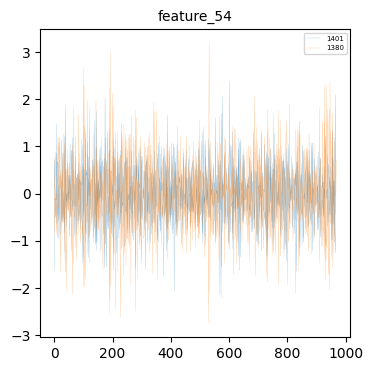

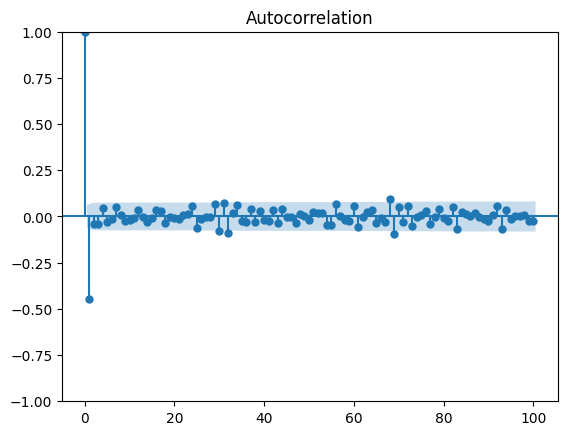

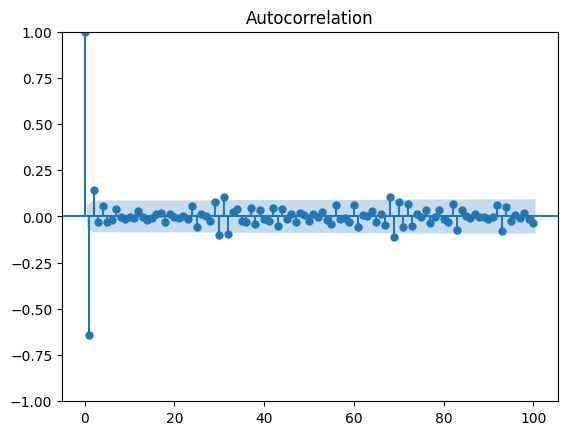

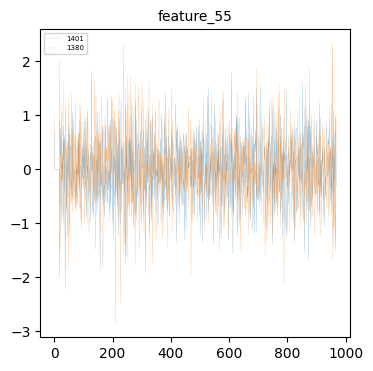

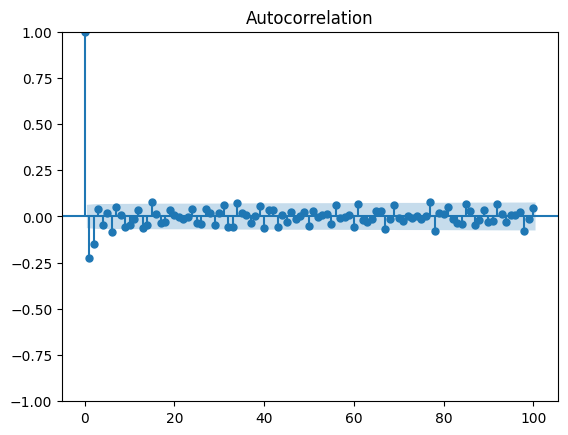

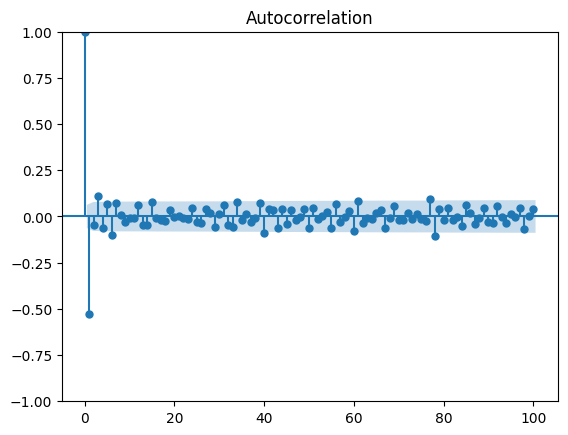

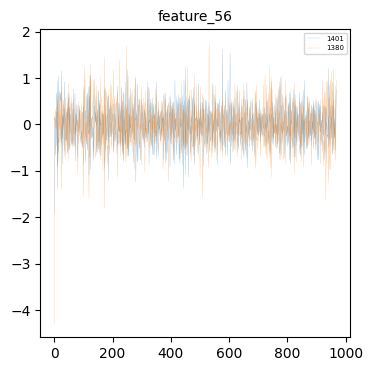

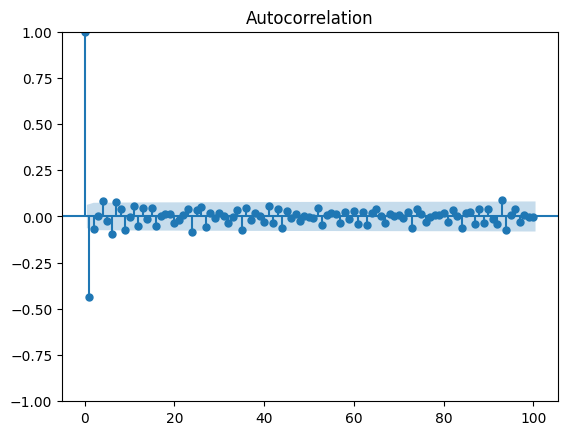

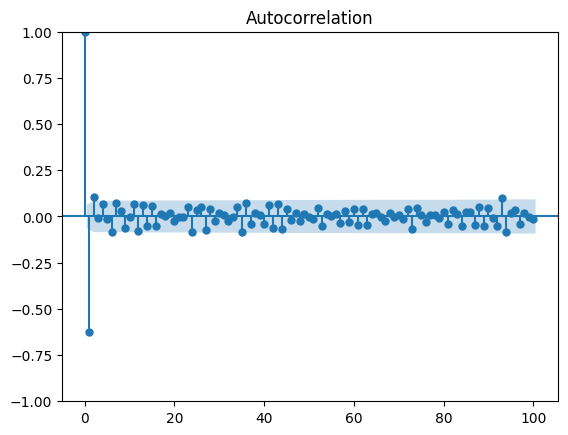

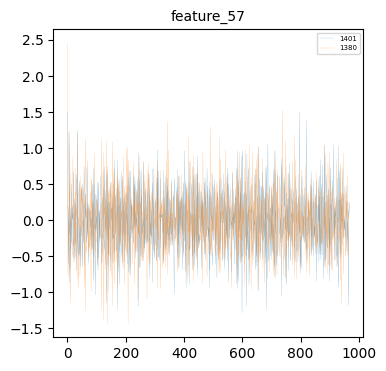

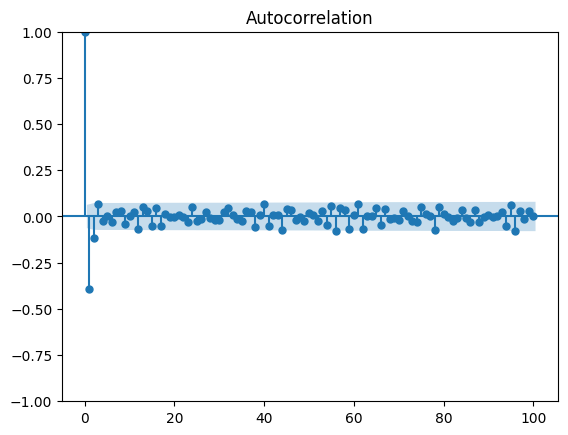

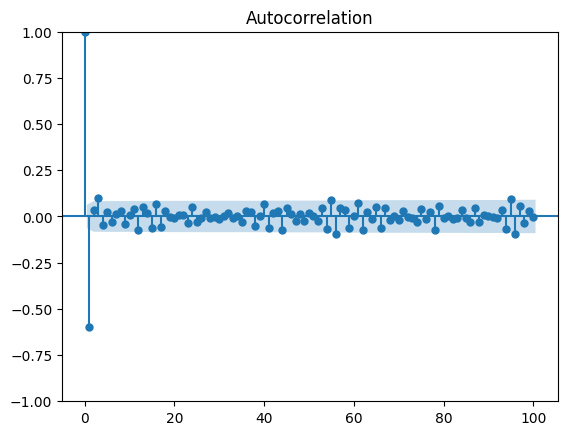

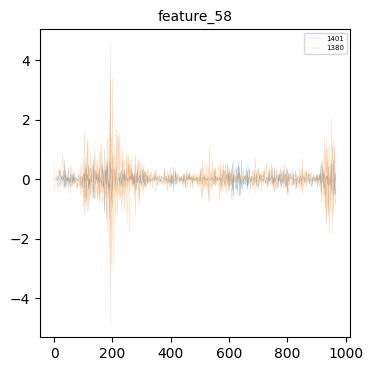

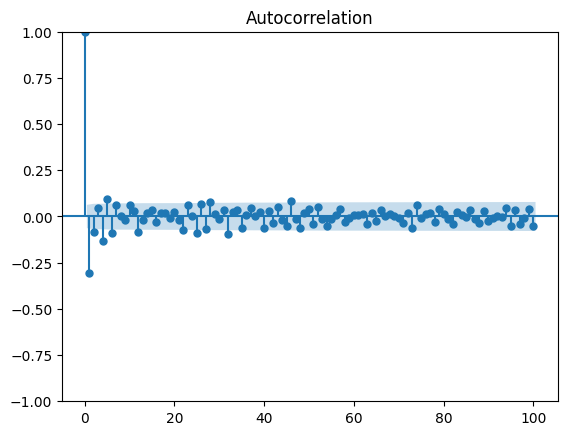

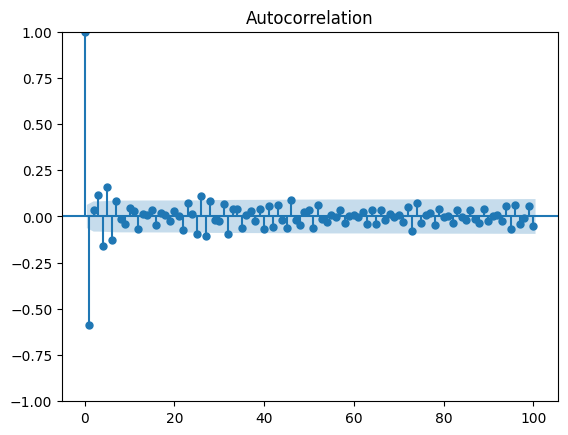

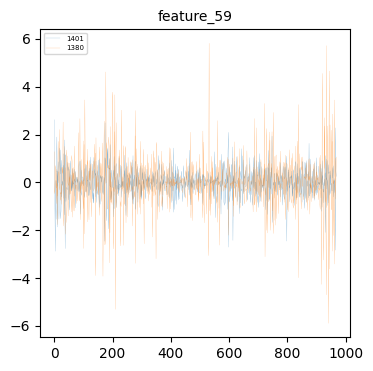

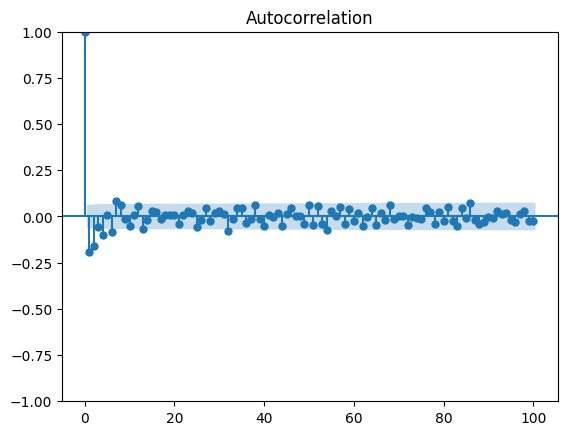

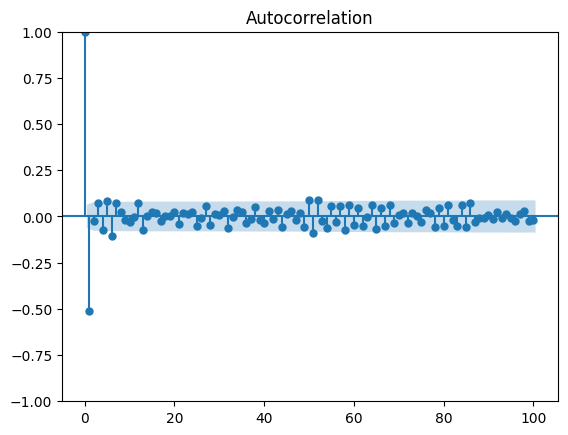

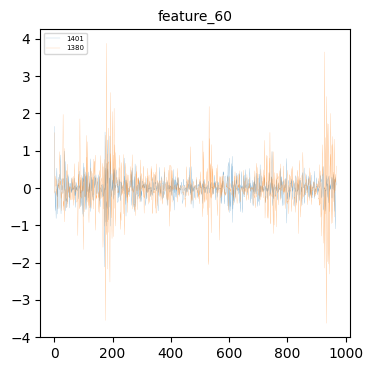

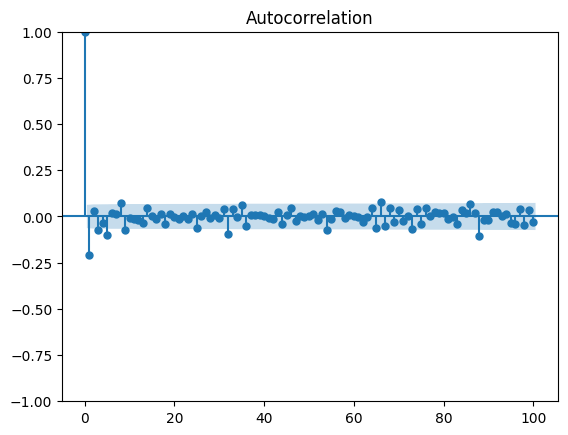

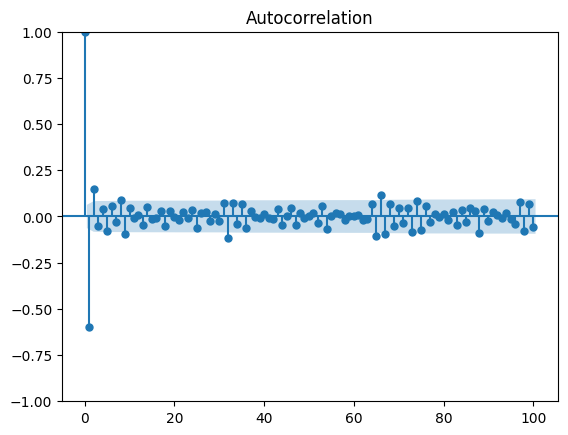

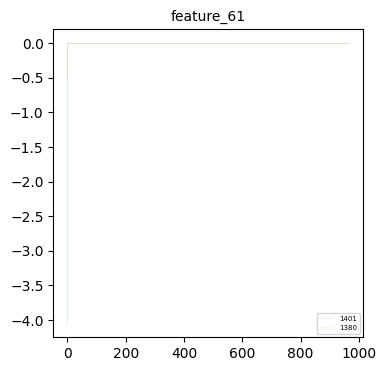

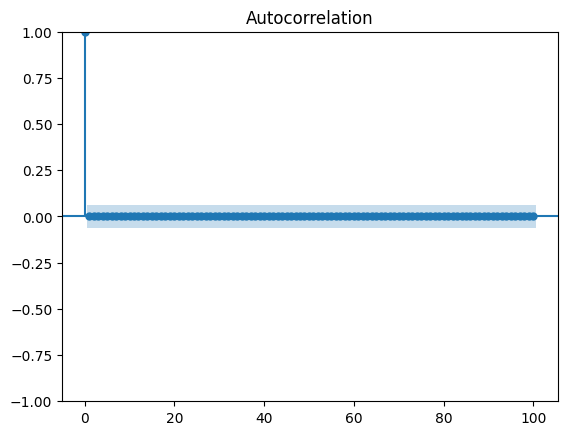

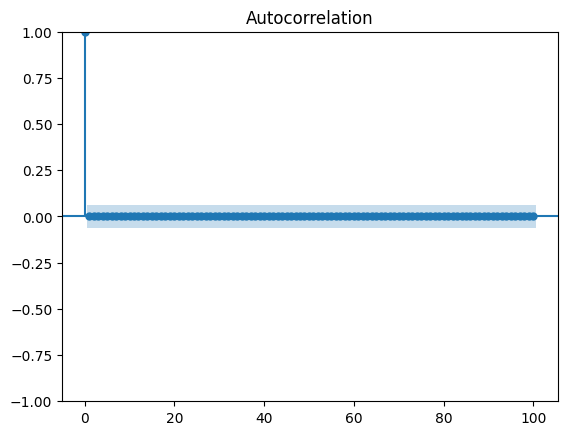

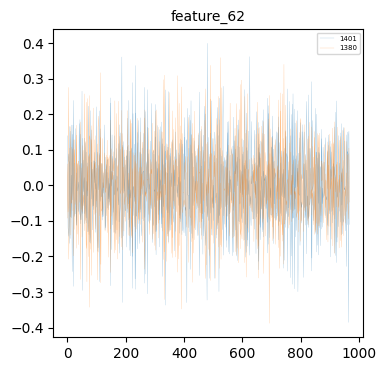

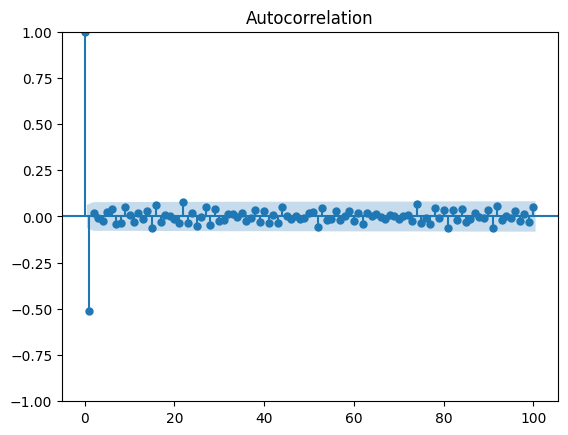

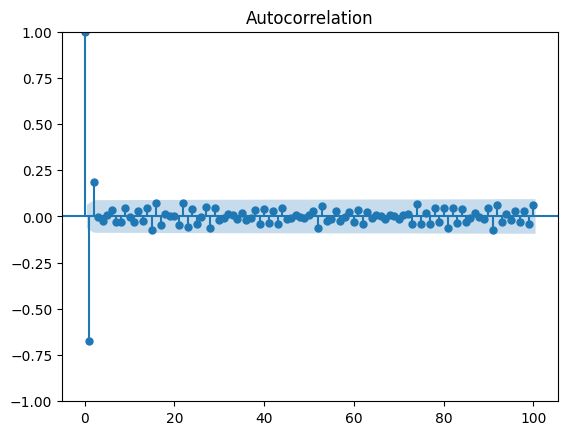

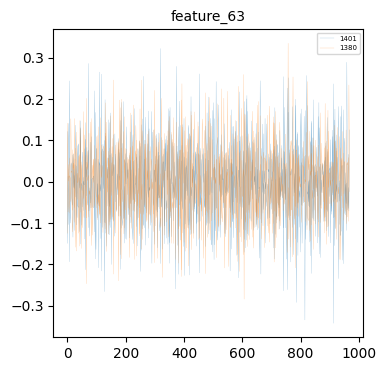

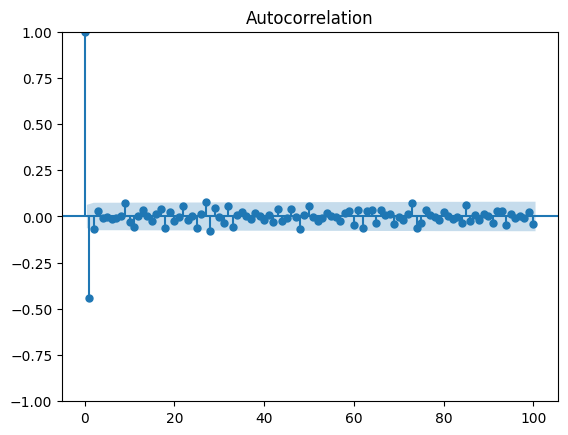

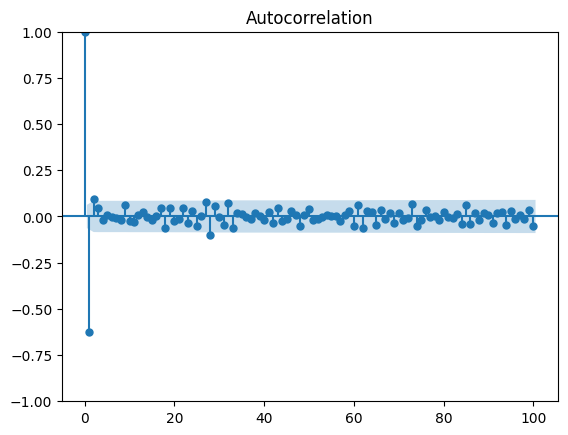

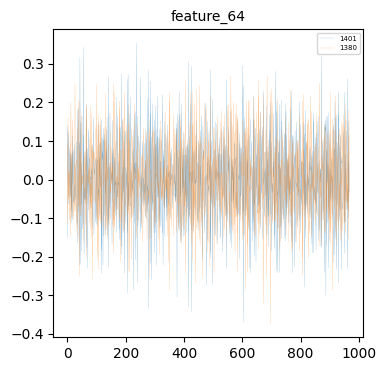

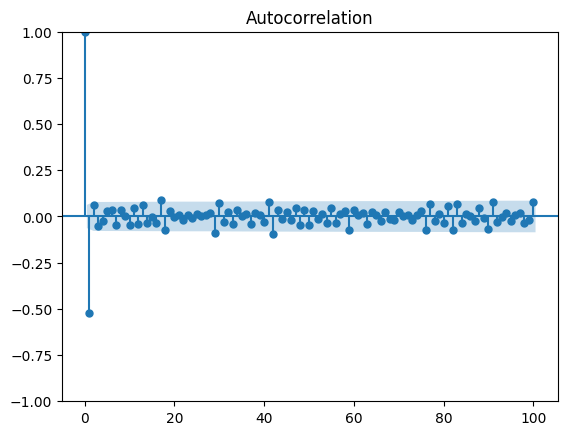

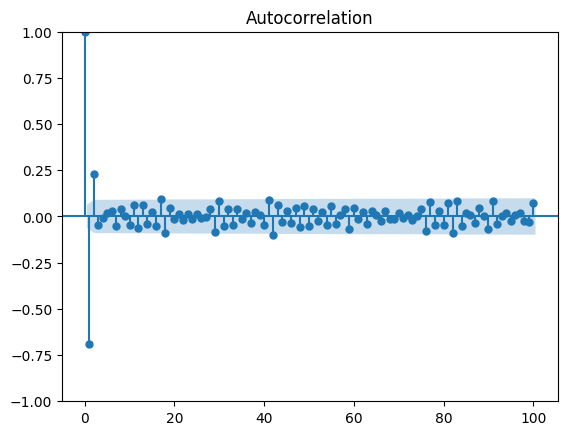

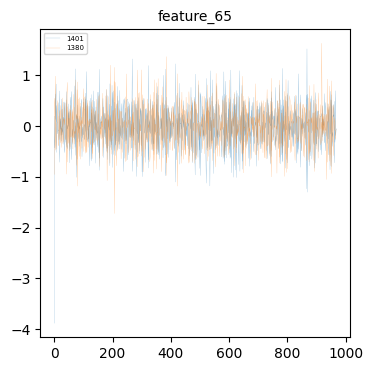

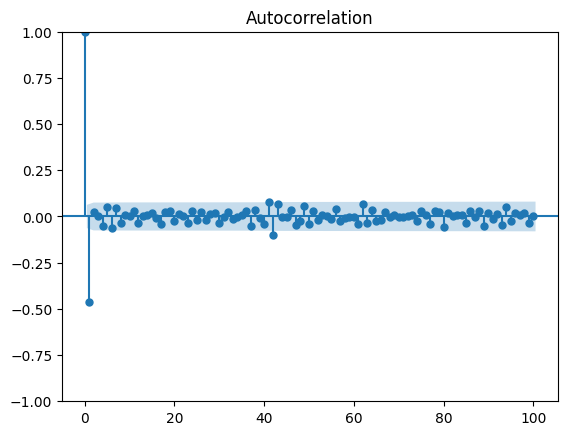

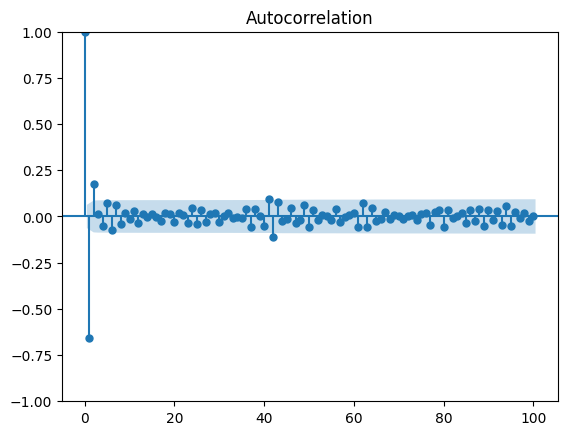

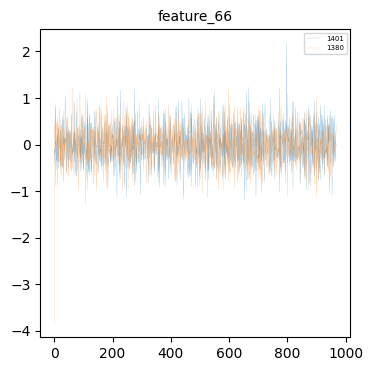

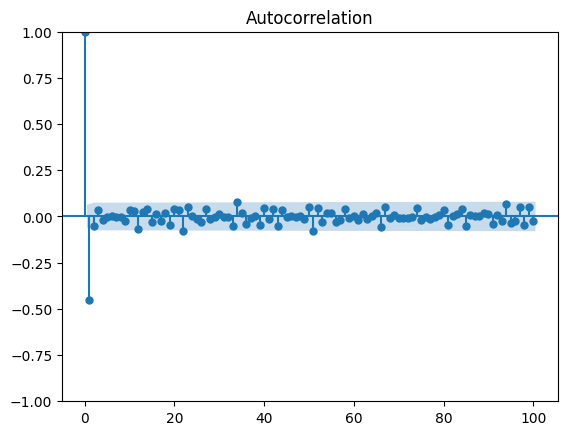

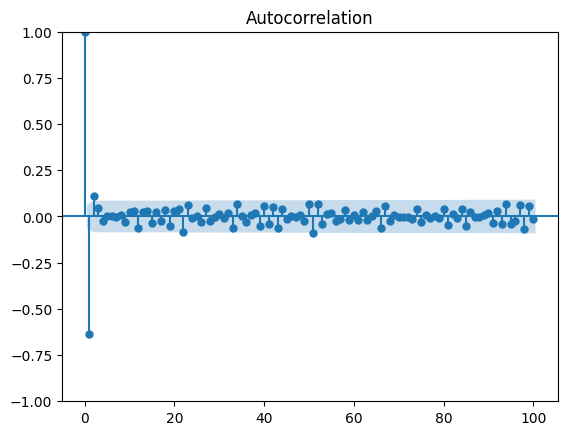

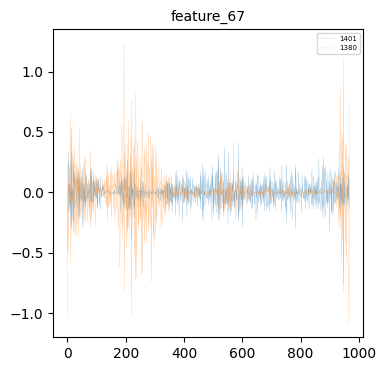

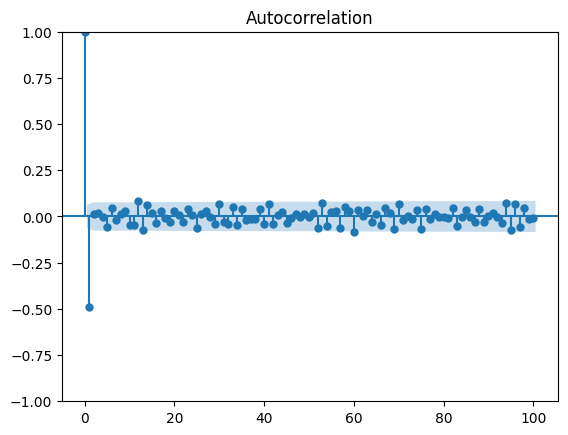

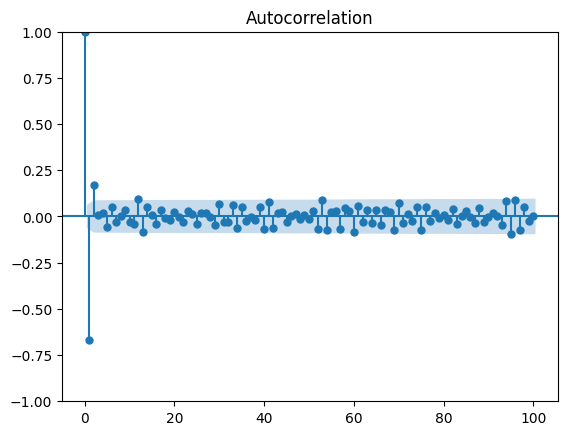

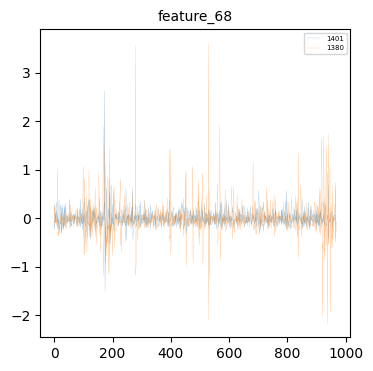

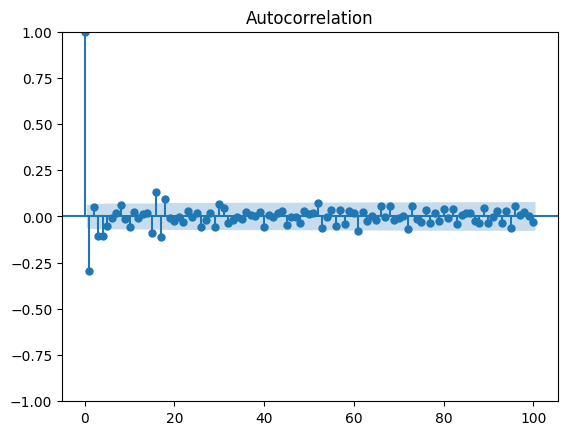

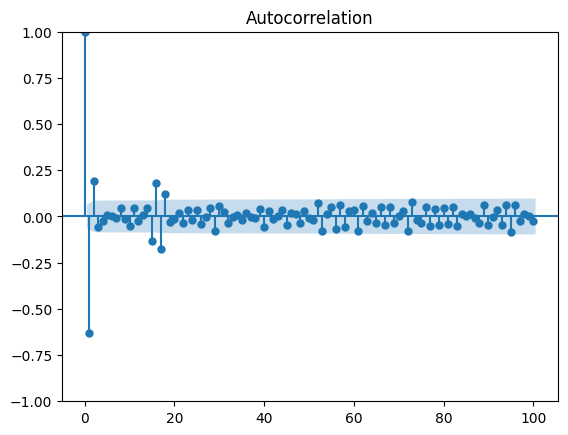

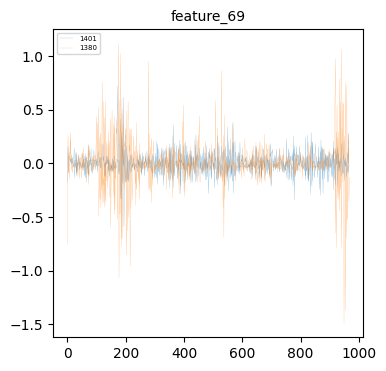

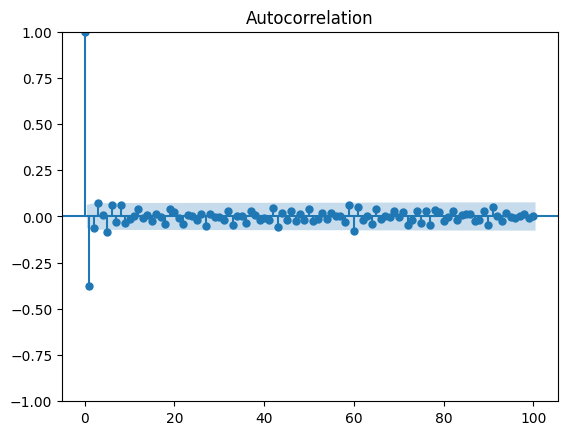

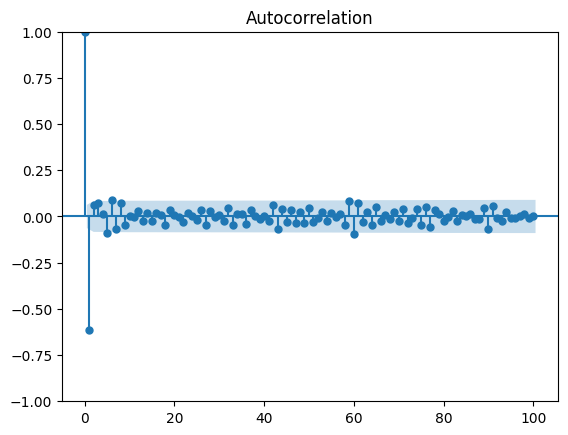

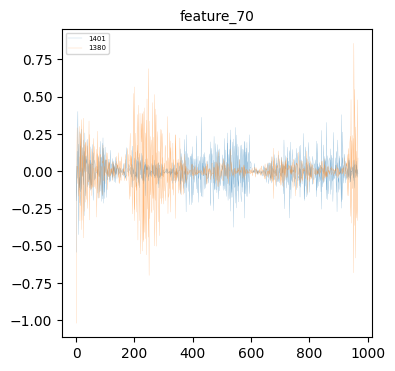

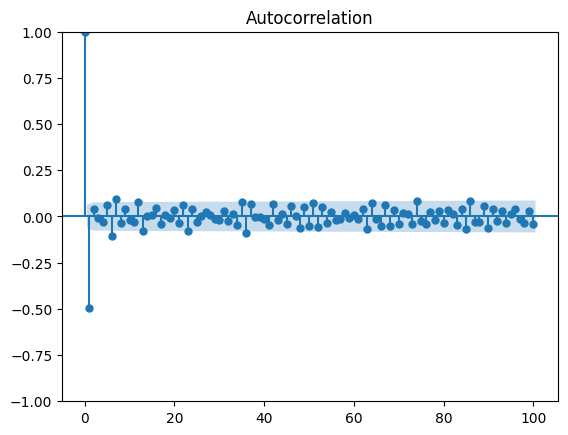

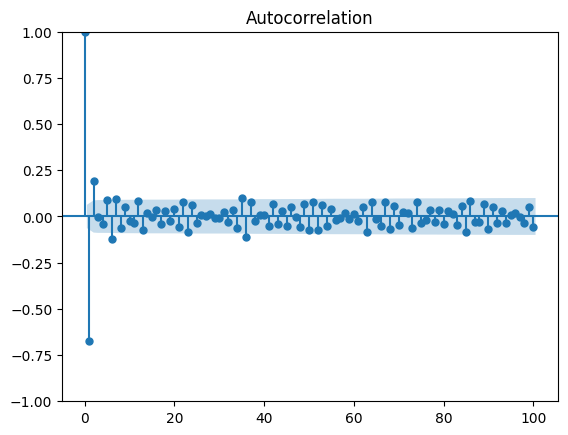

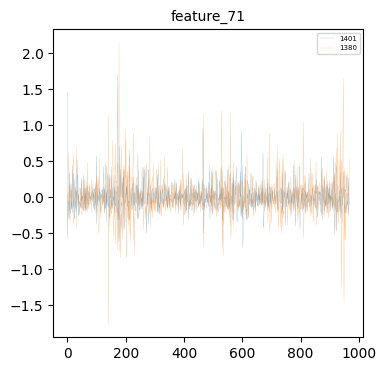

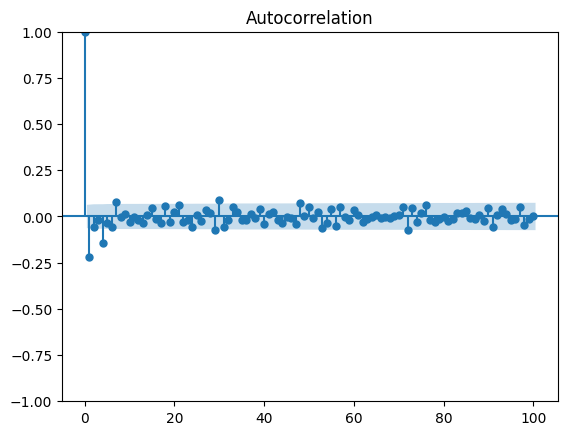

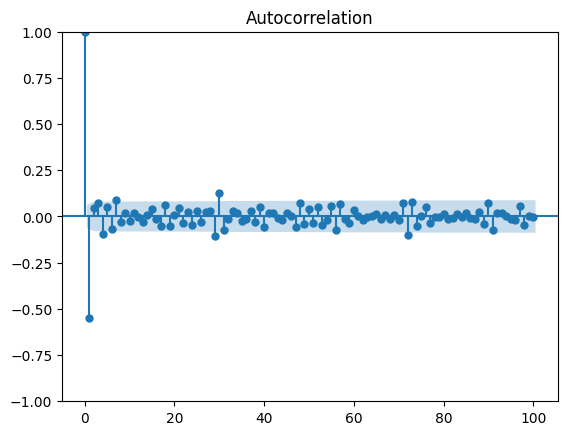

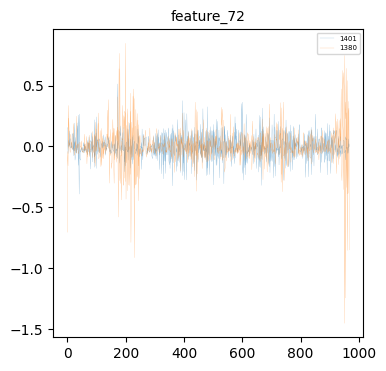

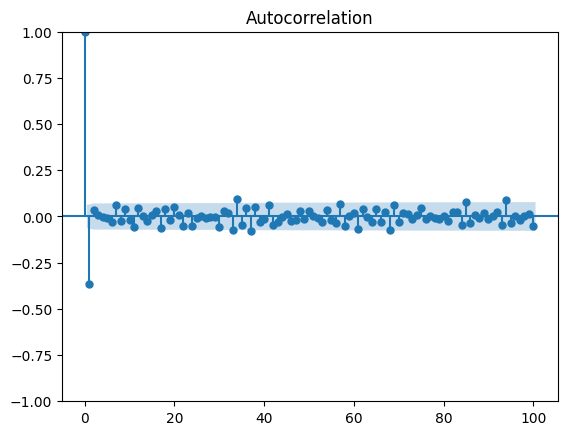

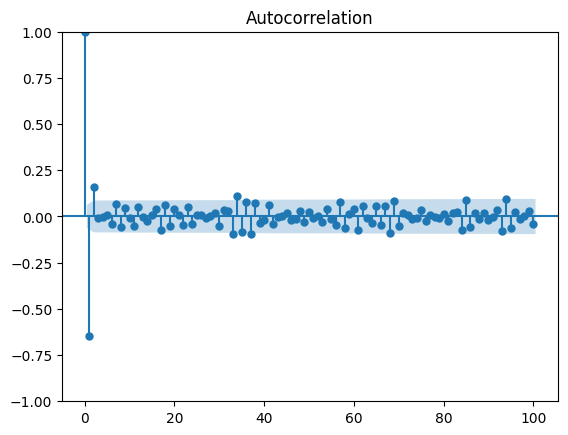

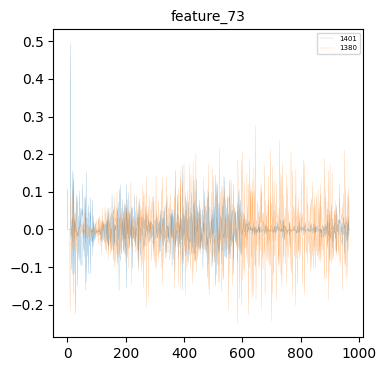

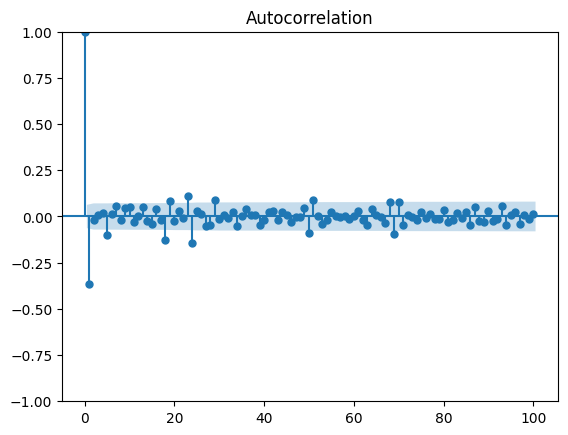

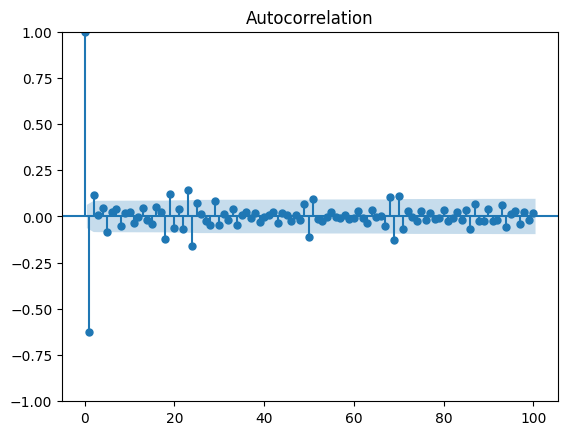

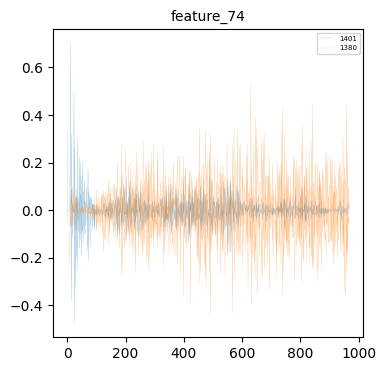

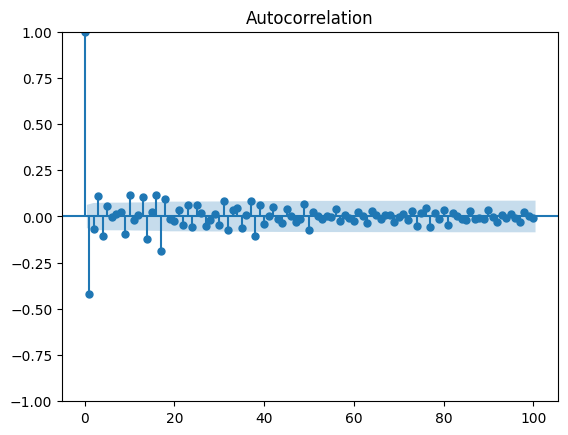

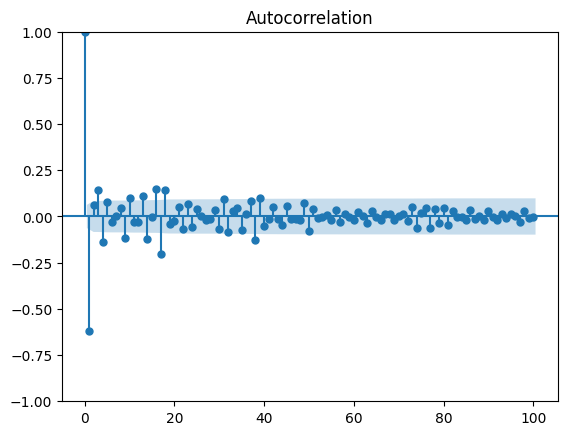

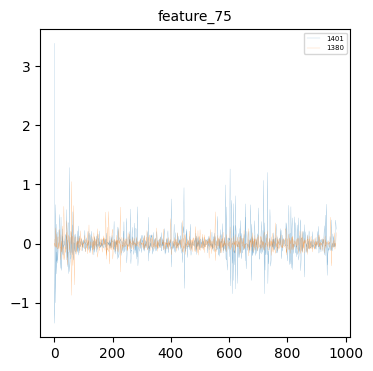

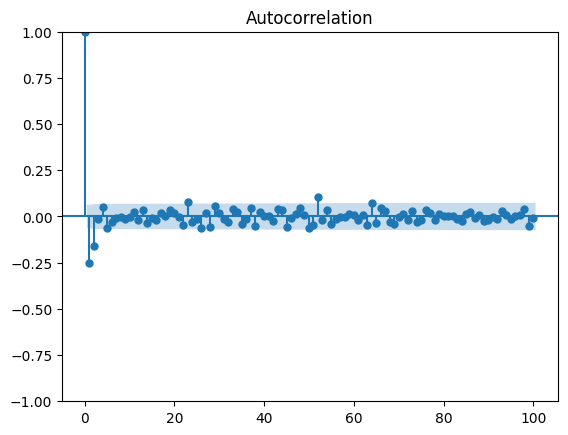

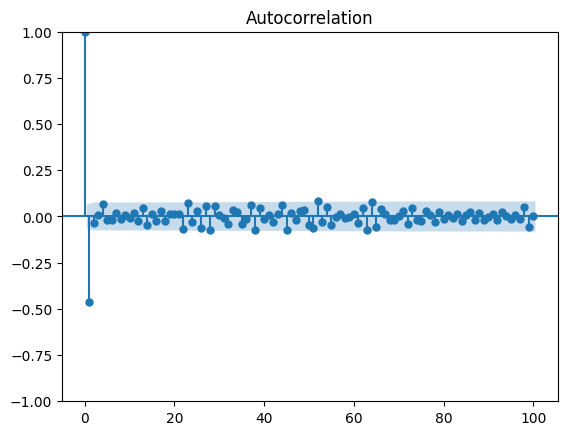

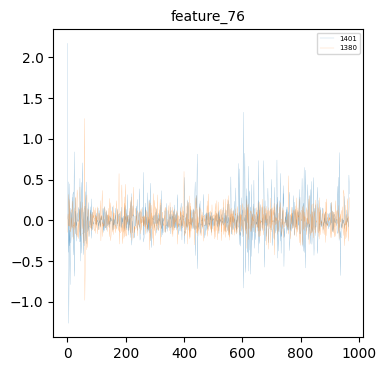

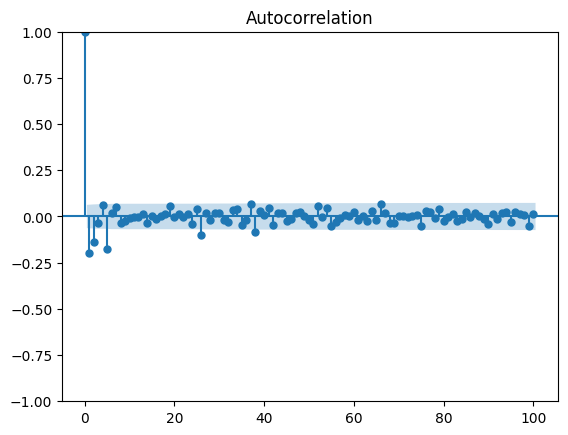

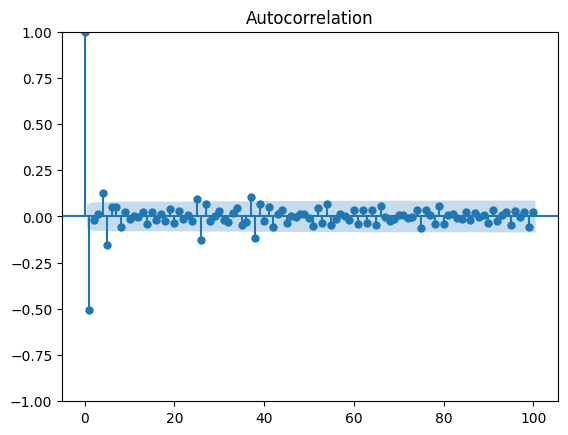

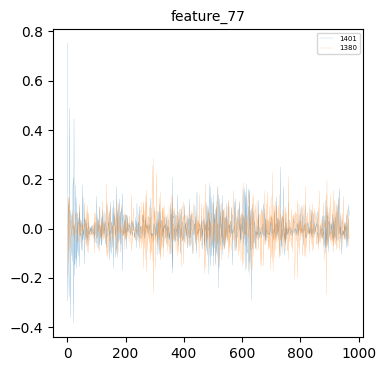

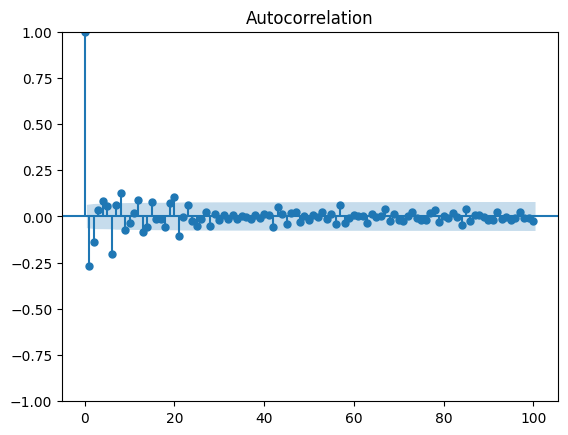

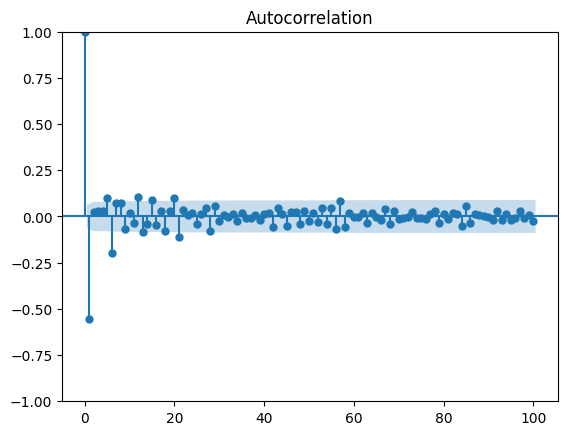

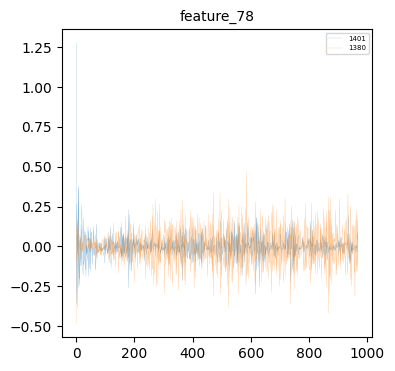

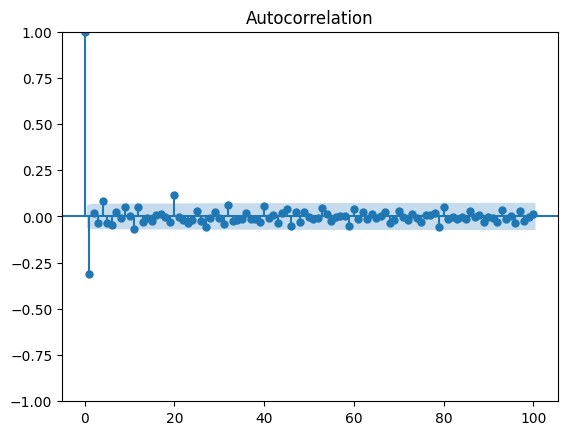

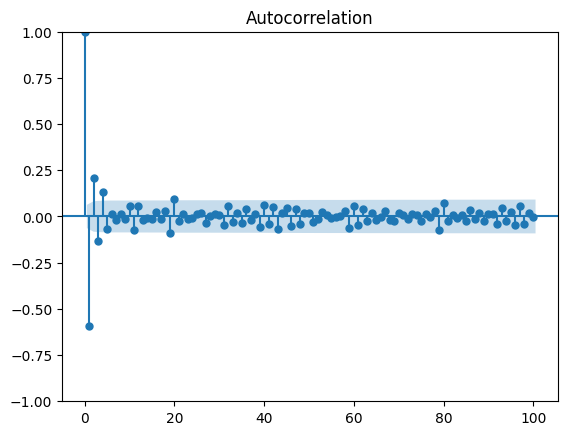

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
for c in input_df['Data'].columns:
    plt.figure(figsize=(4,4))
    plt.plot(df_1401[df_1401[('Key','symbol_id')]==0][('Data',c)].values,label='1401',linewidth=0.1)
    plt.plot(df_1380[df_1380[('Key','symbol_id')]==0][('Data',c)].values,label='1380',linewidth=0.1)
    plt.title(c,fontsize=10)
    plt.legend(fontsize=5)
    plt.show()
    plot_acf(df_1401[('Data',c)].dropna(), lags=100)
    plt.show()
    plot_acf(df_1401[('Data',c)].dropna().diff().dropna(), lags=100)
    plt.show()

In [13]:
df_1401[('Data',c)].dropna().diff()

32912         NaN
32913   -1.140724
32914   -0.493090
32915    0.624965
32916   -0.312074
           ...   
33875   -0.026756
33876   -0.016621
33877    0.044479
33878    0.072875
33879   -0.040251
Name: (Data, feature_78), Length: 968, dtype: float64

In [14]:
display(input_df[input_df[('Key','date_id')]==1401].describe())

Category     Key                              Meta        Data              \
Column   date_id     time_id symbol_id      weight  feature_00  feature_01   
count      968.0  968.000000     968.0  968.000000  968.000000  968.000000   
mean      1401.0  483.500000       0.0    3.240983   -0.000323   -0.002194   
std          0.0  279.581831       0.0    0.000000    0.424273    0.416902   
min       1401.0    0.000000       0.0    3.240982   -1.327443   -1.407188   
25%       1401.0  241.750000       0.0    3.240982   -0.289732   -0.281335   
50%       1401.0  483.500000       0.0    3.240982   -0.011580   -0.018562   
75%       1401.0  725.250000       0.0    3.240982    0.288086    0.277410   
max       1401.0  967.000000       0.0    3.240982    1.283176    2.138829   

Category                                                  ...        Meta  \
Column    feature_02  feature_03  feature_04  feature_05  ... responder_1   
count     968.000000  968.000000  968.000000  968.000000  ...  968.000000   
mean       -0.000175   -0.000129    0.000432   -0.000543  ...    0.025214   
std         0.398966    0.422711    0.538942    0.216420  ...    0.375419   
min        -1.299680   -1.467352   -2.034324   -1.395363  ...   -1.055035   
25%        -0.264292   -0.290833   -0.347042   -0.098658  ...   -0.245712   
50%         0.008469    0.002553   -0.001500    0.003988  ...    0.042037   
75%         0.268032    0.266650    0.338286    0.091660  ...    0.270141   
max         1.622615    1.550529    1.796858    1.196457  ...    1.279673   

Category                                                       Label  \
Column   responder_2 responder_3 responder_4 responder_5 responder_6   
count     968.000000  968.000000  968.000000  968.000000  968.000000   
mean        0.011414   -3.401104   -1.845281   -4.760018   -0.000066   
std         0.534773    0.776932    0.591239    0.477304    0.253994   
min        -1.778346   -5.000000   -4.053341   -5.000000   -1.545389   
25%        -0.308917   -3.920893   -2.200172   -5.000000   -0.129783   
50%         0.004096   -3.396426   -1.802200   -5.000000   -0.001270   
75%         0.334111   -2.886230   -1.497133   -4.752552    0.137845   
max         2.239411   -1.427019   -0.306493   -2.072191    1.503541   

Category        Meta                    Predictions  
Column   responder_7 responder_8   Fold  Prediction  
count     968.000000  968.000000  968.0  968.000000  
mean       -0.019214   -0.009145    1.0    0.000304  
std         0.526728    0.462807    0.0    0.116753  
min        -1.315164   -2.072106    1.0   -0.755063  
25%        -0.281153   -0.248868    1.0   -0.062125  
50%        -0.034673   -0.004406    1.0    0.001711  
75%         0.176376    0.215909    1.0    0.062273  
max         2.310370    3.045836    1.0    0.572404  

[8 rows x 94 columns]

In [15]:
plt.figure(figsize=(6,6))
diff = input_df[('Label','responder_6')] - input_df[('Data','responder_6_lag_1')]
display(diff.describe())
plt.hist(diff,bins=2000)
plt.xlim([-2,2])
plt.show()

KeyError: ('Data', 'responder_6_lag_1')

<Figure size 600x600 with 0 Axes>

In [ ]:
display(input_df[('Key','date_id')].value_counts())

In [ ]:
display(input_df[(input_df[('Predictions','Prediction')]<-2) & (input_df[('Label','responder_6')]>-1)][('Key','symbol_id')].value_counts())

In [ ]:
display(input_df[(input_df[('Predictions','Prediction')]<-2) & (input_df[('Label','responder_6')]>-1)][('Key','date_id')].value_counts())

In [ ]:
all_ends = []
for symbol_id in sorted(list(set(input_df[('Key','symbol_id')]))):
    ends = input_df[(input_df[('Key','symbol_id')]==symbol_id) & (input_df[('Key','time_id')].isin([0,967]))][['Key','Label']]
    ends = ends.pivot(columns=[('Key','time_id')],index=[('Key','date_id')],values=[('Label','responder_6')])
    ends['symbol_id'] = symbol_id
    all_ends.append(ends)
all_ends = pd.concat(all_ends,axis=0)
display(all_ends)

In [ ]:
plt.figure(figsize=(6,6))
diff = all_ends.iloc[1:,0].reset_index(drop=True) - all_ends.iloc[:-1,1].reset_index(drop=True)
display(diff.describe())
plt.hist(diff,bins=50,label='Day-Day Diff',alpha=0.5,density=True)
diff = input_df[('Label','responder_6')] - input_df[('Data','responder_6_lag_1')]
display(diff.describe())
plt.hist(diff,bins=2000,label='Intraday Diff',alpha=0.5,density=True)
plt.legend(fontsize=10)
# plt.xlim([-2,2])
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(input_df[input_df[('Key','symbol_id')]==0][('Label','responder_6')].iloc[30000:40000],linewidth=0.1)
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
for symbol_id in sorted(list(set(input_df[('Key','symbol_id')]))):
    plt.hist(input_df[input_df[('Key','symbol_id')]==symbol_id][('Label','responder_6')],bins=200,density=True,label=symbol_id,alpha=0.2)
plt.legend(fontsize=8)
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
for symbol_id in sorted(list(set(input_df[('Key','symbol_id')]))):
    plt.hist(input_df[input_df[('Key','symbol_id')]==symbol_id][('Predictions','Prediction')],bins=200,density=True,label=symbol_id,alpha=0.2)
plt.legend(fontsize=8)
plt.show()